Preparation

In [ ]:
# Install package(s)
!pip install yfinance

[*********************100%%**********************]  1 of 1 completed
INFO:prophet:n_changepoints greater than number of observations. Using 0.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ezg4uyb/o6ll26vk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ezg4uyb/ew6zkpst.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75091', 'data', 'file=/tmp/tmp7ezg4uyb/o6ll26vk.json', 'init=/tmp/tmp7ezg4uyb/ew6zkpst.json', 'output', 'file=/tmp/tmp7ezg4uyb/prophet_model53mi3g4d/prophet_model-20240205143301.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:33:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:33:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


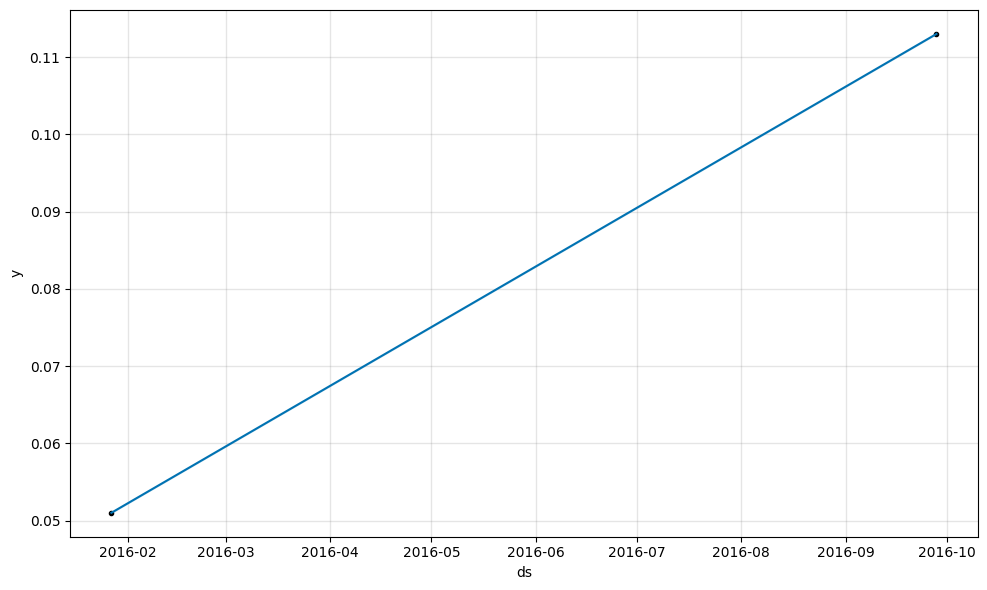

In [ ]:
import yfinance as yf
from prophet import Prophet
import pandas as pd

# Specify the stock symbol and the period for which you want the historical data
stock_symbol = 'XAM'  # Example: Apple Inc.
period = '10y'  # 5 years of historical data

# Fetch historical stock prices
stock_data = yf.download(stock_symbol, period=period)

# Reset the index to make Date a column
stock_data.reset_index(inplace=True) # Same as stock_data = stock_data.reset_index()

stock_data = stock_data[-250:]
prophet_data = stock_data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Initialize a Prophet model
model = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)

# Fit the model with your data
model.fit(prophet_data)

# Create a dataframe for future dates to predict (for example, next 0 days)
future = model.make_future_dataframe(periods=0)

# Use the model to make predictions
forecast = model.predict(future)
# Plot the forecast
fig = model.plot(forecast)
fig.show()

Back testing

In [ ]:
import yfinance as yf
from prophet import Prophet
import pandas as pd

# Specify the stock symbol and the period for which you want the historical data
stock_symbol = 'TQQQ'  # Example: Apple Inc.
period = '10y'  # 5 years of historical data

# Fetch historical stock prices
stock_data = yf.download(stock_symbol, period=period)

# Reset the index to make Date a column
stock_data.reset_index(inplace=True) # Same as stock_data = stock_data.reset_index()

asset = 10000
portfolio = 'No'
date_list = list(stock_data[stock_data['Date'] >= '2019-01-01']['Date'])
for today_date in date_list:
  stock_data1 = stock_data[stock_data['Date'] <= today_date]
  stock_data1 = stock_data1[-250:]
  prophet_data = stock_data1[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

  # Initialize a Prophet model
  model = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)

  # Fit the model with your data
  model.fit(prophet_data)

  # Create a dataframe for future dates to predict (for example, next 0 days)
  future = model.make_future_dataframe(periods=0)

  # Use the model to make predictions
  forecast = model.predict(future)
  # Plot the forecast
  # fig = model.plot(forecast)
  # fig.show()

  # Get prices
  current_price = float(stock_data1[stock_data1['Date'] == max(stock_data1['Date'])]['Close'])
  yhat_upper = float(forecast[forecast['ds'] == max(forecast['ds'])]['yhat_upper'])
  yhat_lower = float(forecast[forecast['ds'] == max(forecast['ds'])]['yhat_lower'])

  if (portfolio == 'No') & (yhat_lower*0.9 > current_price) :
    bought_price = current_price
    portfolio = 'Yes'
    print('buy')
  elif (portfolio == 'Yes') & (yhat_upper*1.1 < current_price) :
    sold_price = current_price
    portfolio = 'No'
    asset = asset * sold_price/bought_price
    print('sell')
  else:
    print('hold')

  print(today_date)
  print(portfolio)
  print(asset)



[*********************100%%**********************]  1 of 1 completed
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rxwisel0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dyahavzp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65103', 'data', 'file=/tmp/tmpurb4or9_/rxwisel0.json', 'init=/tmp/tmpurb4or9_/dyahavzp.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modell1lz9ats/prophet_model-20240123081447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zg617yzx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qv6j0gcv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running C

hold
2019-01-02 00:00:00
No
10000
hold
2019-01-03 00:00:00
No
10000


08:14:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ei1kv02l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2l3q_m2b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63742', 'data', 'file=/tmp/tmpurb4or9_/ei1kv02l.json', 'init=/tmp/tmpurb4or9_/2l3q_m2b.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelpu9u6t7_/prophet_model-20240123081447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5dg1fgrr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/81qeo20f.json
DEBUG:cmdstanpy:idx

hold
2019-01-04 00:00:00
No
10000
hold
2019-01-07 00:00:00
No
10000


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50823', 'data', 'file=/tmp/tmpurb4or9_/5dg1fgrr.json', 'init=/tmp/tmpurb4or9_/81qeo20f.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model1dszgymz/prophet_model-20240123081448.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/uiwu3yy5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5ou9b3g6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76450', 'data', 'file=/tmp/tmpurb4or9_/uiwu3yy5.json', 'init=/tmp/tmpurb4or9_/5ou9b3g6.json', 'output', 'file=/tmp/

hold
2019-01-08 00:00:00
No
10000
hold
2019-01-09 00:00:00
No
10000


08:14:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dgnbxenp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7t9o7s0w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22480', 'data', 'file=/tmp/tmpurb4or9_/dgnbxenp.json', 'init=/tmp/tmpurb4or9_/7t9o7s0w.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model_pxpajvt/prophet_model-20240123081448.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5kktav61.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/a7igs33a.json
DEBUG:cmdstanpy:idx

hold
2019-01-10 00:00:00
No
10000
hold
2019-01-11 00:00:00
No
10000


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50107', 'data', 'file=/tmp/tmpurb4or9_/5kktav61.json', 'init=/tmp/tmpurb4or9_/a7igs33a.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelskma7sx5/prophet_model-20240123081448.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/e_esqvxj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/w5jx5prg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58956', 'data', 'file=/tmp/tmpurb4or9_/e_esqvxj.json', 'init=/tmp/tmpurb4or9_/w5jx5prg.json', 'output', 'file=/tmp/

hold
2019-01-14 00:00:00
No
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/da7lhtgk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ra2spyyq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80321', 'data', 'file=/tmp/tmpurb4or9_/da7lhtgk.json', 'init=/tmp/tmpurb4or9_/ra2spyyq.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modely4qzoj5k/prophet_model-20240123081449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-01-15 00:00:00
No
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/aprm1wd_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pg_2bocq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33723', 'data', 'file=/tmp/tmpurb4or9_/aprm1wd_.json', 'init=/tmp/tmpurb4or9_/pg_2bocq.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelv5dhzpzs/prophet_model-20240123081449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-01-16 00:00:00
No
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/iert8_av.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/s4f3aahe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11343', 'data', 'file=/tmp/tmpurb4or9_/iert8_av.json', 'init=/tmp/tmpurb4or9_/s4f3aahe.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelf7bag3sb/prophet_model-20240123081449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-01-17 00:00:00
No
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/iwjz_ddb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0yhy7xn9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41960', 'data', 'file=/tmp/tmpurb4or9_/iwjz_ddb.json', 'init=/tmp/tmpurb4or9_/0yhy7xn9.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model55kyrcag/prophet_model-20240123081449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-01-18 00:00:00
No
10000
hold
2019-01-22 00:00:00
No
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rd7kpp1e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/f674azvu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3764', 'data', 'file=/tmp/tmpurb4or9_/rd7kpp1e.json', 'init=/tmp/tmpurb4or9_/f674azvu.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeloc2pye8x/prophet_model-20240123081449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lgmq_8np.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/w647jnip.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

hold
2019-01-23 00:00:00
No
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kqyqq_sh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dm92u2q1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52709', 'data', 'file=/tmp/tmpurb4or9_/kqyqq_sh.json', 'init=/tmp/tmpurb4or9_/dm92u2q1.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model4xba5rvr/prophet_model-20240123081450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-01-24 00:00:00
No
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ssw9hqoh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qm258ob3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35846', 'data', 'file=/tmp/tmpurb4or9_/ssw9hqoh.json', 'init=/tmp/tmpurb4or9_/qm258ob3.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelhcp9pq6q/prophet_model-20240123081450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-01-25 00:00:00
No
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/scc9im6t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/q95yzkya.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16476', 'data', 'file=/tmp/tmpurb4or9_/scc9im6t.json', 'init=/tmp/tmpurb4or9_/q95yzkya.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model087vs57v/prophet_model-20240123081450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-01-28 00:00:00
No
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/66408fcp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vi2mi1v7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44477', 'data', 'file=/tmp/tmpurb4or9_/66408fcp.json', 'init=/tmp/tmpurb4or9_/vi2mi1v7.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model0vcxcpg2/prophet_model-20240123081451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-01-29 00:00:00
No
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/i17hgumw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/y0x1b1js.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63454', 'data', 'file=/tmp/tmpurb4or9_/i17hgumw.json', 'init=/tmp/tmpurb4or9_/y0x1b1js.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelz8pjko2z/prophet_model-20240123081451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-01-30 00:00:00
No
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_dyjvc70.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/n3lh1td5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31858', 'data', 'file=/tmp/tmpurb4or9_/_dyjvc70.json', 'init=/tmp/tmpurb4or9_/n3lh1td5.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model8j4udepi/prophet_model-20240123081451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-01-31 00:00:00
No
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fz1imn1_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8vqf51fr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57931', 'data', 'file=/tmp/tmpurb4or9_/fz1imn1_.json', 'init=/tmp/tmpurb4or9_/8vqf51fr.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelktsgnccf/prophet_model-20240123081451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-02-01 00:00:00
No
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/a_dc0yeo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hh59hy68.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46158', 'data', 'file=/tmp/tmpurb4or9_/a_dc0yeo.json', 'init=/tmp/tmpurb4or9_/hh59hy68.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeltjhh3h5f/prophet_model-20240123081451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-02-04 00:00:00
No
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/n__obuu4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/idwzhw0c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37463', 'data', 'file=/tmp/tmpurb4or9_/n__obuu4.json', 'init=/tmp/tmpurb4or9_/idwzhw0c.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelwqqz19uy/prophet_model-20240123081452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-02-05 00:00:00
No
10000
hold
2019-02-06 00:00:00
No
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/o117hsol.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mttushrd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45444', 'data', 'file=/tmp/tmpurb4or9_/o117hsol.json', 'init=/tmp/tmpurb4or9_/mttushrd.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelc581errb/prophet_model-20240123081452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rj14d5y7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1gdh509t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2019-02-07 00:00:00
No
10000
hold
2019-02-08 00:00:00
No
10000


08:14:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xvv8e9fn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7no9afhz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2356', 'data', 'file=/tmp/tmpurb4or9_/xvv8e9fn.json', 'init=/tmp/tmpurb4or9_/7no9afhz.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelrtag9iis/prophet_model-20240123081452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/oown4t30.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/safrmyyt.json
DEBUG:cmdstanpy:idx 

hold
2019-02-11 00:00:00
No
10000
hold
2019-02-12 00:00:00
No
10000


08:14:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4jqcpg25.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/q0az2i_e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21772', 'data', 'file=/tmp/tmpurb4or9_/4jqcpg25.json', 'init=/tmp/tmpurb4or9_/q0az2i_e.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelhn3pctos/prophet_model-20240123081453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wv7byys4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ouftteyd.json
DEBUG:cmdstanpy:idx

hold
2019-02-13 00:00:00
No
10000
hold
2019-02-14 00:00:00
No
10000


08:14:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ckcyltwr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zk7ee2c8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99767', 'data', 'file=/tmp/tmpurb4or9_/ckcyltwr.json', 'init=/tmp/tmpurb4or9_/zk7ee2c8.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelbwa_0pe_/prophet_model-20240123081453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/g00ltrko.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cubk3qux.json
DEBUG:cmdstanpy:idx

hold
2019-02-15 00:00:00
No
10000
hold
2019-02-19 00:00:00
No
10000


08:14:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9tad0ax_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z8e_649s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97965', 'data', 'file=/tmp/tmpurb4or9_/9tad0ax_.json', 'init=/tmp/tmpurb4or9_/z8e_649s.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelawf2apan/prophet_model-20240123081453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yq9z560_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/it2viwv_.json
DEBUG:cmdstanpy:idx

hold
2019-02-20 00:00:00
No
10000
hold
2019-02-21 00:00:00
No
10000


08:14:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0hv3xh3b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4x_qy4_4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98490', 'data', 'file=/tmp/tmpurb4or9_/0hv3xh3b.json', 'init=/tmp/tmpurb4or9_/4x_qy4_4.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelnnpf1_2n/prophet_model-20240123081454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/g_fmqeb4.json


hold
2019-02-22 00:00:00
No
10000
hold
2019-02-25 00:00:00
No
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gsgfxcgv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68206', 'data', 'file=/tmp/tmpurb4or9_/g_fmqeb4.json', 'init=/tmp/tmpurb4or9_/gsgfxcgv.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelqiengxva/prophet_model-20240123081454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fqsek850.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yziyz35c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2019-02-26 00:00:00
No
10000
hold
2019-02-27 00:00:00
No
10000


08:14:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/x_ppc6v3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wmq5wrjl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53466', 'data', 'file=/tmp/tmpurb4or9_/x_ppc6v3.json', 'init=/tmp/tmpurb4or9_/wmq5wrjl.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model3ds9v9af/prophet_model-20240123081454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/e583t_ca.json


hold
2019-02-28 00:00:00
No
10000
hold
2019-03-01 00:00:00
No
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tokzcnye.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30892', 'data', 'file=/tmp/tmpurb4or9_/e583t_ca.json', 'init=/tmp/tmpurb4or9_/tokzcnye.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model6sanuf0_/prophet_model-20240123081454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hpfe45dm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cr5gtbke.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2019-03-04 00:00:00
No
10000
hold
2019-03-05 00:00:00
No
10000


08:14:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pou2gr9h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_elngven.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18685', 'data', 'file=/tmp/tmpurb4or9_/pou2gr9h.json', 'init=/tmp/tmpurb4or9_/_elngven.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model_nbz67vk/prophet_model-20240123081455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yju7vsdq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/w_njy0jo.json
DEBUG:cmdstanpy:idx

hold
2019-03-06 00:00:00
No
10000
hold
2019-03-07 00:00:00
No
10000


08:14:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3txplfz_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fmkd6reb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51945', 'data', 'file=/tmp/tmpurb4or9_/3txplfz_.json', 'init=/tmp/tmpurb4or9_/fmkd6reb.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelcb6l8_nc/prophet_model-20240123081455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wopvx5ni.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vgjd7rvw.json
DEBUG:cmdstanpy:idx

hold
2019-03-08 00:00:00
No
10000
hold
2019-03-11 00:00:00
No
10000


08:14:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4jqro1ne.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z9k15hjj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70133', 'data', 'file=/tmp/tmpurb4or9_/4jqro1ne.json', 'init=/tmp/tmpurb4or9_/z9k15hjj.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelbdks4pyo/prophet_model-20240123081455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zj9r8v35.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/muvoup5p.json
DEBUG:cmdstanpy:idx

hold
2019-03-12 00:00:00
No
10000
hold
2019-03-13 00:00:00
No
10000


08:14:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pqas_0k8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tq3vxn09.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61043', 'data', 'file=/tmp/tmpurb4or9_/pqas_0k8.json', 'init=/tmp/tmpurb4or9_/tq3vxn09.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelaagvb03u/prophet_model-20240123081456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ozcx340h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/98hdnh_9.json
DEBUG:cmdstanpy:idx

hold
2019-03-14 00:00:00
No
10000
hold
2019-03-15 00:00:00
No
10000


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18465', 'data', 'file=/tmp/tmpurb4or9_/ozcx340h.json', 'init=/tmp/tmpurb4or9_/98hdnh_9.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model4fvj8pd6/prophet_model-20240123081456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mgsz6hw9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nhzexazf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75269', 'data', 'file=/tmp/tmpurb4or9_/mgsz6hw9.json', 'init=/tmp/tmpurb4or9_/nhzexazf.json', 'output', 'file=/tmp/

hold
2019-03-18 00:00:00
No
10000
hold
2019-03-19 00:00:00
No
10000


INFO:cmdstanpy:Chain [1] start processing
08:14:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lteco6_j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qxcdnr85.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77935', 'data', 'file=/tmp/tmpurb4or9_/lteco6_j.json', 'init=/tmp/tmpurb4or9_/qxcdnr85.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model_84s26o3/prophet_model-20240123081456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mwyvtch4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp

hold
2019-03-20 00:00:00
No
10000
hold
2019-03-21 00:00:00
No
10000


08:14:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lhgi42lv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/t074g3o3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30287', 'data', 'file=/tmp/tmpurb4or9_/lhgi42lv.json', 'init=/tmp/tmpurb4or9_/t074g3o3.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelfahzjlrg/prophet_model-20240123081457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0fdfjla6.json


hold
2019-03-22 00:00:00
No
10000
hold
2019-03-25 00:00:00
No
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/euvghwpt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45190', 'data', 'file=/tmp/tmpurb4or9_/0fdfjla6.json', 'init=/tmp/tmpurb4or9_/euvghwpt.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelswt2789h/prophet_model-20240123081457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/usm7hocr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pp646zcv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2019-03-26 00:00:00
No
10000
hold
2019-03-27 00:00:00
No
10000


08:14:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/spwnuc0i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5ey8gnk7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51755', 'data', 'file=/tmp/tmpurb4or9_/spwnuc0i.json', 'init=/tmp/tmpurb4or9_/5ey8gnk7.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeljee8gral/prophet_model-20240123081457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/m1z0syi6.json


hold
2019-03-28 00:00:00
No
10000
hold
2019-03-29 00:00:00
No
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/y2fy0esy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77897', 'data', 'file=/tmp/tmpurb4or9_/m1z0syi6.json', 'init=/tmp/tmpurb4or9_/y2fy0esy.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelz0loejx6/prophet_model-20240123081458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dbeoajrv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/h9ed80yv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2019-04-01 00:00:00
No
10000
hold
2019-04-02 00:00:00
No
10000


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96841', 'data', 'file=/tmp/tmpurb4or9_/gtqc00uv.json', 'init=/tmp/tmpurb4or9_/cspvqlt1.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelqhmbewq2/prophet_model-20240123081458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/imhg_ri1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9i38la8k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14222', 'data', 'file=/tmp/tmpurb4or9_/imh

hold
2019-04-03 00:00:00
No
10000
hold
2019-04-04 00:00:00
No
10000


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21193', 'data', 'file=/tmp/tmpurb4or9_/2j4xw7kr.json', 'init=/tmp/tmpurb4or9_/xfujbfwi.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modela_bpvp4b/prophet_model-20240123081458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/p7mr9jiu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/43kkuowv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30671', 'data', 'file=/tmp/tmpurb4or9_/p7mr9jiu.json', 'init=/tmp/tmpurb4or9_/43kkuowv.json', 'output', 'file=/tmp/

hold
2019-04-05 00:00:00
No
10000
hold
2019-04-08 00:00:00
No
10000


08:14:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tvs74ey0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ok_i9mvq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54840', 'data', 'file=/tmp/tmpurb4or9_/tvs74ey0.json', 'init=/tmp/tmpurb4or9_/ok_i9mvq.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelmlbgi0uj/prophet_model-20240123081459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1fur6y29.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wkpng64u.json
DEBUG:cmdstanpy:idx

hold
2019-04-09 00:00:00
No
10000
hold
2019-04-10 00:00:00
No
10000


08:14:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/a8z8kh5v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4r_ivbdf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70349', 'data', 'file=/tmp/tmpurb4or9_/a8z8kh5v.json', 'init=/tmp/tmpurb4or9_/4r_ivbdf.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model7j3pst3z/prophet_model-20240123081459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_ltzha7x.json


hold
2019-04-11 00:00:00
No
10000
hold
2019-04-12 00:00:00
No
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/x1dqiic7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85103', 'data', 'file=/tmp/tmpurb4or9_/_ltzha7x.json', 'init=/tmp/tmpurb4or9_/x1dqiic7.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelsn3cofey/prophet_model-20240123081459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yaykw513.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/j0z5vvup.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2019-04-15 00:00:00
No
10000
hold
2019-04-16 00:00:00
No
10000


08:15:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ofx6_syt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xiri8b5v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40107', 'data', 'file=/tmp/tmpurb4or9_/ofx6_syt.json', 'init=/tmp/tmpurb4or9_/xiri8b5v.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelyghcq9ik/prophet_model-20240123081500.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zo_81u3_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/h17mfa63.json
DEBUG:cmdstanpy:idx

hold
2019-04-17 00:00:00
No
10000
hold
2019-04-18 00:00:00
No
10000


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50861', 'data', 'file=/tmp/tmpurb4or9_/zo_81u3_.json', 'init=/tmp/tmpurb4or9_/h17mfa63.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelhb3assnh/prophet_model-20240123081500.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hb43ih4h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hd79ysww.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86034', 'data', 'file=/tmp/tmpurb4or9_/hb43ih4h.json', 'init=/tm

hold
2019-04-22 00:00:00
No
10000
hold
2019-04-23 00:00:00
No
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yhbqlusv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28178', 'data', 'file=/tmp/tmpurb4or9_/cyh12p2c.json', 'init=/tmp/tmpurb4or9_/yhbqlusv.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelvq1j2awl/prophet_model-20240123081500.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ucvim3r0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xkxvucb1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2019-04-24 00:00:00
No
10000
hold
2019-04-25 00:00:00
No
10000


08:15:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9taq4lbt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/uptf2ym9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55231', 'data', 'file=/tmp/tmpurb4or9_/9taq4lbt.json', 'init=/tmp/tmpurb4or9_/uptf2ym9.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelkrjq55uz/prophet_model-20240123081501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jo54evqr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0c16ci6k.json
DEBUG:cmdstanpy:idx

hold
2019-04-26 00:00:00
No
10000
hold
2019-04-29 00:00:00
No
10000


08:15:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ooanqs0i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/chmyff5c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41401', 'data', 'file=/tmp/tmpurb4or9_/ooanqs0i.json', 'init=/tmp/tmpurb4or9_/chmyff5c.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modely0_h5ot3/prophet_model-20240123081501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-04-30 00:00:00
No
10000
hold
2019-05-01 00:00:00
No
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fmu1zrub.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/y3bft1is.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2399', 'data', 'file=/tmp/tmpurb4or9_/fmu1zrub.json', 'init=/tmp/tmpurb4or9_/y3bft1is.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelwv3ee0rp/prophet_model-20240123081501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9pkxt0er.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/sc_y2ipi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

hold
2019-05-02 00:00:00
No
10000
hold
2019-05-03 00:00:00
No
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/i4toaa9t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pn0gn6mg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83354', 'data', 'file=/tmp/tmpurb4or9_/i4toaa9t.json', 'init=/tmp/tmpurb4or9_/pn0gn6mg.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeljapn8zd8/prophet_model-20240123081502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dj8w89hd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/sjifmwnc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2019-05-06 00:00:00
No
10000
hold
2019-05-07 00:00:00
No
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/krk3bnul.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3tkoxgob.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54004', 'data', 'file=/tmp/tmpurb4or9_/krk3bnul.json', 'init=/tmp/tmpurb4or9_/3tkoxgob.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelfe4i5_le/prophet_model-20240123081502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/75xfpzih.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yplrhgxq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2019-05-08 00:00:00
No
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vkugg0x3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qk01gegi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90893', 'data', 'file=/tmp/tmpurb4or9_/vkugg0x3.json', 'init=/tmp/tmpurb4or9_/qk01gegi.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelxae_jpo9/prophet_model-20240123081503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-05-09 00:00:00
No
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ljh63iou.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gofvl4p_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82270', 'data', 'file=/tmp/tmpurb4or9_/ljh63iou.json', 'init=/tmp/tmpurb4or9_/gofvl4p_.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model9h_iyzo_/prophet_model-20240123081503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-05-10 00:00:00
No
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/m41om1o5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cin2xrpe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96198', 'data', 'file=/tmp/tmpurb4or9_/m41om1o5.json', 'init=/tmp/tmpurb4or9_/cin2xrpe.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model9zqt9k5b/prophet_model-20240123081503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


buy
2019-05-13 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ifclb30b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5vna1phl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3121', 'data', 'file=/tmp/tmpurb4or9_/ifclb30b.json', 'init=/tmp/tmpurb4or9_/5vna1phl.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelx4230wff/prophet_model-20240123081503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-05-14 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/520v4l8t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3qlosrw1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57345', 'data', 'file=/tmp/tmpurb4or9_/520v4l8t.json', 'init=/tmp/tmpurb4or9_/3qlosrw1.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model6voqekng/prophet_model-20240123081503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-05-15 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kcgvo5bk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/d4jcfyyn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95164', 'data', 'file=/tmp/tmpurb4or9_/kcgvo5bk.json', 'init=/tmp/tmpurb4or9_/d4jcfyyn.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model9mclqrc3/prophet_model-20240123081504.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-05-16 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rmpr8nwa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/j56tfd9j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59625', 'data', 'file=/tmp/tmpurb4or9_/rmpr8nwa.json', 'init=/tmp/tmpurb4or9_/j56tfd9j.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_models9etmskt/prophet_model-20240123081504.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-05-17 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dltqcdz2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xi3rfcz0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96582', 'data', 'file=/tmp/tmpurb4or9_/dltqcdz2.json', 'init=/tmp/tmpurb4or9_/xi3rfcz0.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelc7d_p90b/prophet_model-20240123081504.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-05-20 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/iovjhxx5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5if4f54p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32980', 'data', 'file=/tmp/tmpurb4or9_/iovjhxx5.json', 'init=/tmp/tmpurb4or9_/5if4f54p.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model03nwem84/prophet_model-20240123081504.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-05-21 00:00:00
Yes
10000
hold
2019-05-22 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7t28ddk2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zbqyde78.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47292', 'data', 'file=/tmp/tmpurb4or9_/7t28ddk2.json', 'init=/tmp/tmpurb4or9_/zbqyde78.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelu1z_gaxa/prophet_model-20240123081505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/q568jtdj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5zkzm6f7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2019-05-23 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nmwo3hc3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vh3qsj_z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33077', 'data', 'file=/tmp/tmpurb4or9_/nmwo3hc3.json', 'init=/tmp/tmpurb4or9_/vh3qsj_z.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modele9bzenu5/prophet_model-20240123081505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-05-24 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/liiyfqts.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ve9fk3b5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36346', 'data', 'file=/tmp/tmpurb4or9_/liiyfqts.json', 'init=/tmp/tmpurb4or9_/ve9fk3b5.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelpknp78xb/prophet_model-20240123081505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-05-28 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dvptcn3a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gp60gpjw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5802', 'data', 'file=/tmp/tmpurb4or9_/dvptcn3a.json', 'init=/tmp/tmpurb4or9_/gp60gpjw.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelsmtel_i8/prophet_model-20240123081505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-05-29 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/krms98p0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/byq8or8s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78945', 'data', 'file=/tmp/tmpurb4or9_/krms98p0.json', 'init=/tmp/tmpurb4or9_/byq8or8s.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelsxpmos1q/prophet_model-20240123081506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-05-30 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0ap2rpr6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/c5v4rj4b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84027', 'data', 'file=/tmp/tmpurb4or9_/0ap2rpr6.json', 'init=/tmp/tmpurb4or9_/c5v4rj4b.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeluppv0t5j/prophet_model-20240123081506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8dyw5jld.json


hold
2019-05-31 00:00:00
Yes
10000
hold
2019-06-03 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/c88kty6t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67263', 'data', 'file=/tmp/tmpurb4or9_/8dyw5jld.json', 'init=/tmp/tmpurb4or9_/c88kty6t.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeliye0o06h/prophet_model-20240123081506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/p4idmpp4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1z2zgwkw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2019-06-04 00:00:00
Yes
10000
hold
2019-06-05 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wq1qkeys.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29543', 'data', 'file=/tmp/tmpurb4or9_/p8s9g1zm.json', 'init=/tmp/tmpurb4or9_/wq1qkeys.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelvafenjj7/prophet_model-20240123081506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lh2so0pu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9evy1j5q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2019-06-06 00:00:00
Yes
10000
hold
2019-06-07 00:00:00
Yes
10000


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75177', 'data', 'file=/tmp/tmpurb4or9_/4l20op1l.json', 'init=/tmp/tmpurb4or9_/ccvns1w0.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelbzw73uz2/prophet_model-20240123081507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1sp6e66k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wxuuq3cz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31286', 'data', 'file=/tmp/tmpurb4or9_/1sp

hold
2019-06-10 00:00:00
Yes
10000
hold
2019-06-11 00:00:00
Yes
10000


08:15:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/anylm0ay.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/n6uxcll5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77350', 'data', 'file=/tmp/tmpurb4or9_/anylm0ay.json', 'init=/tmp/tmpurb4or9_/n6uxcll5.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelt7yytv4l/prophet_model-20240123081507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/l679fmso.json


hold
2019-06-12 00:00:00
Yes
10000
hold
2019-06-13 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cwde5oxq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17836', 'data', 'file=/tmp/tmpurb4or9_/l679fmso.json', 'init=/tmp/tmpurb4or9_/cwde5oxq.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeluxm7cv3z/prophet_model-20240123081507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/an2s2yfn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/f9isjnm6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2019-06-14 00:00:00
Yes
10000
hold
2019-06-17 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/m9wiiw_w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cgz310j1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80660', 'data', 'file=/tmp/tmpurb4or9_/m9wiiw_w.json', 'init=/tmp/tmpurb4or9_/cgz310j1.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model5eeb5bhu/prophet_model-20240123081508.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/oi6b8gn4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mzepugna.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2019-06-18 00:00:00
Yes
10000
hold
2019-06-19 00:00:00
Yes
10000


08:15:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rwgx46vq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4yybiif8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97515', 'data', 'file=/tmp/tmpurb4or9_/rwgx46vq.json', 'init=/tmp/tmpurb4or9_/4yybiif8.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelcg05q97g/prophet_model-20240123081508.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-06-20 00:00:00
Yes
10000
hold
2019-06-21 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xe6k4sxn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/b7d09q_a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29568', 'data', 'file=/tmp/tmpurb4or9_/xe6k4sxn.json', 'init=/tmp/tmpurb4or9_/b7d09q_a.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelz7ch3v2r/prophet_model-20240123081508.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lmetea8o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ozy995hp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2019-06-24 00:00:00
Yes
10000
hold
2019-06-25 00:00:00
Yes
10000


08:15:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8afqflyt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z21vrm4t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17015', 'data', 'file=/tmp/tmpurb4or9_/8afqflyt.json', 'init=/tmp/tmpurb4or9_/z21vrm4t.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model7yr4kgtc/prophet_model-20240123081509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or

hold
2019-06-26 00:00:00
Yes
10000
hold
2019-06-27 00:00:00
Yes
10000


INFO:cmdstanpy:Chain [1] start processing
08:15:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7cjjs0t8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3m_ioxhf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43040', 'data', 'file=/tmp/tmpurb4or9_/7cjjs0t8.json', 'init=/tmp/tmpurb4or9_/3m_ioxhf.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelb38gri95/prophet_model-20240123081509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-06-28 00:00:00
Yes
10000
hold
2019-07-01 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yudd54ug.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7snhdugm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38229', 'data', 'file=/tmp/tmpurb4or9_/yudd54ug.json', 'init=/tmp/tmpurb4or9_/7snhdugm.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeltu3qjhc2/prophet_model-20240123081509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_bqmuvn2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ng78ro08.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2019-07-02 00:00:00
Yes
10000
hold
2019-07-03 00:00:00
Yes
10000


08:15:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/n1evxm1q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/u3btwskr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10185', 'data', 'file=/tmp/tmpurb4or9_/n1evxm1q.json', 'init=/tmp/tmpurb4or9_/u3btwskr.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelxqu721oc/prophet_model-20240123081510.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/l_akry6y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_ksu7s1r.json
DEBUG:cmdstanpy:idx

hold
2019-07-05 00:00:00
Yes
10000
hold
2019-07-08 00:00:00
Yes
10000


08:15:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7wr2jfmd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/g4ybyl9y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57571', 'data', 'file=/tmp/tmpurb4or9_/7wr2jfmd.json', 'init=/tmp/tmpurb4or9_/g4ybyl9y.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelack6b73d/prophet_model-20240123081510.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jk6c8q7g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/sp2u52eu.json
DEBUG:cmdstanpy:idx

hold
2019-07-09 00:00:00
Yes
10000
hold
2019-07-10 00:00:00
Yes
10000


08:15:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/06layjm1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/q80twe5z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41555', 'data', 'file=/tmp/tmpurb4or9_/06layjm1.json', 'init=/tmp/tmpurb4or9_/q80twe5z.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model0a4q7h2r/prophet_model-20240123081510.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or

hold
2019-07-11 00:00:00
Yes
10000
hold
2019-07-12 00:00:00
Yes
10000


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26321', 'data', 'file=/tmp/tmpurb4or9_/pie9uftk.json', 'init=/tmp/tmpurb4or9_/evt60y8x.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelwyf5eauq/prophet_model-20240123081511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2gkk9a_g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fyayw7a6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33026', 'data', 'file=/tmp/tmpurb4or9_/2gkk9a_g.json', 'init=/tm

hold
2019-07-15 00:00:00
Yes
10000
hold
2019-07-16 00:00:00
Yes
10000


08:15:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/247be0vf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jjj502ls.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12199', 'data', 'file=/tmp/tmpurb4or9_/247be0vf.json', 'init=/tmp/tmpurb4or9_/jjj502ls.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model0340snjq/prophet_model-20240123081511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/p0p21k0w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kaghmglf.json
DEBUG:cmdstanpy:idx

hold
2019-07-17 00:00:00
Yes
10000
hold
2019-07-18 00:00:00
Yes
10000


08:15:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/l_jl8rsl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/asmcwhz4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99983', 'data', 'file=/tmp/tmpurb4or9_/l_jl8rsl.json', 'init=/tmp/tmpurb4or9_/asmcwhz4.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modely12ohagi/prophet_model-20240123081511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/aezyhnly.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/f6b77n7a.json
DEBUG:cmdstanpy:idx

hold
2019-07-19 00:00:00
Yes
10000
hold
2019-07-22 00:00:00
Yes
10000


08:15:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/l07qesqx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vuth6v8j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9467', 'data', 'file=/tmp/tmpurb4or9_/l07qesqx.json', 'init=/tmp/tmpurb4or9_/vuth6v8j.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelczbryusg/prophet_model-20240123081512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_lhilzq3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rvq6yjxh.json
DEBUG:cmdstanpy:idx 

hold
2019-07-23 00:00:00
Yes
10000
hold
2019-07-24 00:00:00
Yes
10000


08:15:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z1oeshdi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tk666a5n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71321', 'data', 'file=/tmp/tmpurb4or9_/z1oeshdi.json', 'init=/tmp/tmpurb4or9_/tk666a5n.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelwa0bhln6/prophet_model-20240123081512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7wwyf77s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/laumdl6x.json
DEBUG:cmdstanpy:idx

hold
2019-07-25 00:00:00
Yes
10000
hold
2019-07-26 00:00:00
Yes
10000


08:15:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/b8cvxp2n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cekgcknc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45923', 'data', 'file=/tmp/tmpurb4or9_/b8cvxp2n.json', 'init=/tmp/tmpurb4or9_/cekgcknc.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model8kcclexn/prophet_model-20240123081512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fh_l1h9l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/96sh2mbu.json
DEBUG:cmdstanpy:idx

hold
2019-07-29 00:00:00
Yes
10000
hold
2019-07-30 00:00:00
Yes
10000


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7911', 'data', 'file=/tmp/tmpurb4or9_/fh_l1h9l.json', 'init=/tmp/tmpurb4or9_/96sh2mbu.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelqo1pdhmf/prophet_model-20240123081513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/q8ziehcn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wvvui_w2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2150', 'data', 'file=/tmp/tmpurb4or9_/q8ziehcn.json', 'init=/tmp/

hold
2019-07-31 00:00:00
Yes
10000
hold
2019-08-01 00:00:00
Yes
10000


INFO:cmdstanpy:Chain [1] start processing
08:15:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0s2_cncm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6t6km9yo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62078', 'data', 'file=/tmp/tmpurb4or9_/0s2_cncm.json', 'init=/tmp/tmpurb4or9_/6t6km9yo.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model6ws25ywd/prophet_model-20240123081513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0ve4s3_4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp

hold
2019-08-02 00:00:00
Yes
10000
hold
2019-08-05 00:00:00
Yes
10000


08:15:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mw_6kutf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fpqhb55d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34572', 'data', 'file=/tmp/tmpurb4or9_/mw_6kutf.json', 'init=/tmp/tmpurb4or9_/fpqhb55d.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeleghwjtfl/prophet_model-20240123081513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/comwyr35.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/25o4yie9.json


hold
2019-08-06 00:00:00
Yes
10000
hold
2019-08-07 00:00:00
Yes
10000


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48997', 'data', 'file=/tmp/tmpurb4or9_/comwyr35.json', 'init=/tmp/tmpurb4or9_/25o4yie9.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model39_07qga/prophet_model-20240123081514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/efs9c4b_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/x5max9lh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30475', 'data', 'file=/tmp/tmpurb4or9_/efs

hold
2019-08-08 00:00:00
Yes
10000
hold
2019-08-09 00:00:00
Yes
10000


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33241', 'data', 'file=/tmp/tmpurb4or9_/dblxrdjd.json', 'init=/tmp/tmpurb4or9_/z5bs2i46.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeloefcg5rs/prophet_model-20240123081514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nv8ujv0s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9htvt7a4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70302', 'data', 'file=/tmp/tmpurb4or9_/nv8

hold
2019-08-12 00:00:00
Yes
10000
hold
2019-08-13 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4uv8mb0v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73228', 'data', 'file=/tmp/tmpurb4or9_/zjucfdk9.json', 'init=/tmp/tmpurb4or9_/4uv8mb0v.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelsymmhczz/prophet_model-20240123081514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hyyaxgg0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7lgwjv51.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2019-08-14 00:00:00
Yes
10000
hold
2019-08-15 00:00:00
Yes
10000


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31009', 'data', 'file=/tmp/tmpurb4or9_/4ejggbfk.json', 'init=/tmp/tmpurb4or9_/zt9aj2ym.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeljhowh98y/prophet_model-20240123081515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8xo4us42.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xbpiw3fv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26687', 'data', 'file=/tmp/tmpurb4or9_/8xo4us42.json', 'init=/tmp/tmpurb4or9_/xbpiw3fv.json', 'output', 'file=/tmp/

hold
2019-08-16 00:00:00
Yes
10000
hold
2019-08-19 00:00:00
Yes
10000


08:15:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/94ngx8mz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/uqwadyj1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97735', 'data', 'file=/tmp/tmpurb4or9_/94ngx8mz.json', 'init=/tmp/tmpurb4or9_/uqwadyj1.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelh20pr41e/prophet_model-20240123081515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/c65_nd22.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ycmypgx6.json
DEBUG:cmdstanpy:idx

hold
2019-08-20 00:00:00
Yes
10000
hold
2019-08-21 00:00:00
Yes
10000


08:15:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/t3vf1t86.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/98n611wd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22120', 'data', 'file=/tmp/tmpurb4or9_/t3vf1t86.json', 'init=/tmp/tmpurb4or9_/98n611wd.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelolxknjjq/prophet_model-20240123081515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ccul_810.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4chtpli2.json
DEBUG:cmdstanpy:idx

hold
2019-08-22 00:00:00
Yes
10000
hold
2019-08-23 00:00:00
Yes
10000


INFO:cmdstanpy:Chain [1] start processing
08:15:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/63k5xfqq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jp660jq6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29456', 'data', 'file=/tmp/tmpurb4or9_/63k5xfqq.json', 'init=/tmp/tmpurb4or9_/jp660jq6.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeljwhgqf73/prophet_model-20240123081516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/sdv53lw3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp

hold
2019-08-26 00:00:00
Yes
10000
hold
2019-08-27 00:00:00
Yes
10000


08:15:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7qh4gz8e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/logqrxi8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72785', 'data', 'file=/tmp/tmpurb4or9_/7qh4gz8e.json', 'init=/tmp/tmpurb4or9_/logqrxi8.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model4_n5iyyq/prophet_model-20240123081516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-08-28 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bmhbeu8t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1g_ewfre.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41085', 'data', 'file=/tmp/tmpurb4or9_/bmhbeu8t.json', 'init=/tmp/tmpurb4or9_/1g_ewfre.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model_uq_oacf/prophet_model-20240123081516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-08-29 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ocho7mcd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_jr6fa4g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46560', 'data', 'file=/tmp/tmpurb4or9_/ocho7mcd.json', 'init=/tmp/tmpurb4or9_/_jr6fa4g.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelrp71ioqs/prophet_model-20240123081516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-08-30 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3n38khod.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6fkln4cl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62304', 'data', 'file=/tmp/tmpurb4or9_/3n38khod.json', 'init=/tmp/tmpurb4or9_/6fkln4cl.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelefk2v6s6/prophet_model-20240123081517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-09-03 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/plq1bsf0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3xrvwguz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77565', 'data', 'file=/tmp/tmpurb4or9_/plq1bsf0.json', 'init=/tmp/tmpurb4or9_/3xrvwguz.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelomkkpwhl/prophet_model-20240123081517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-09-04 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/a059_xw7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/eu9as8g3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82442', 'data', 'file=/tmp/tmpurb4or9_/a059_xw7.json', 'init=/tmp/tmpurb4or9_/eu9as8g3.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model7c20rgeu/prophet_model-20240123081517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-09-05 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/41g968nm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_5e1g028.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75668', 'data', 'file=/tmp/tmpurb4or9_/41g968nm.json', 'init=/tmp/tmpurb4or9_/_5e1g028.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelewsstays/prophet_model-20240123081517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-09-06 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qe2zrhuw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/w5ajdtpy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24265', 'data', 'file=/tmp/tmpurb4or9_/qe2zrhuw.json', 'init=/tmp/tmpurb4or9_/w5ajdtpy.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model4zk1khab/prophet_model-20240123081517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-09-09 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/61i8h1zy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ckpzqp97.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96168', 'data', 'file=/tmp/tmpurb4or9_/61i8h1zy.json', 'init=/tmp/tmpurb4or9_/ckpzqp97.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelnu_aadbo/prophet_model-20240123081518.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-09-10 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ozc53u7s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yhlhzylr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76788', 'data', 'file=/tmp/tmpurb4or9_/ozc53u7s.json', 'init=/tmp/tmpurb4or9_/yhlhzylr.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelpucrudz2/prophet_model-20240123081518.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-09-11 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lax_dqlt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7j0cl0gj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82707', 'data', 'file=/tmp/tmpurb4or9_/lax_dqlt.json', 'init=/tmp/tmpurb4or9_/7j0cl0gj.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeluzkhcqko/prophet_model-20240123081518.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-09-12 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xd0f3dpq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4gn7dk20.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17146', 'data', 'file=/tmp/tmpurb4or9_/xd0f3dpq.json', 'init=/tmp/tmpurb4or9_/4gn7dk20.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model4u5dfdep/prophet_model-20240123081518.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-09-13 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nsg_z1m0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/c4ckqaa2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47215', 'data', 'file=/tmp/tmpurb4or9_/nsg_z1m0.json', 'init=/tmp/tmpurb4or9_/c4ckqaa2.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeljpv4ckma/prophet_model-20240123081519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-09-16 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/l6lu5hrj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xu581lyu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79183', 'data', 'file=/tmp/tmpurb4or9_/l6lu5hrj.json', 'init=/tmp/tmpurb4or9_/xu581lyu.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelcdz4o2d2/prophet_model-20240123081519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-09-17 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7is3k238.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5bch8qc8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38472', 'data', 'file=/tmp/tmpurb4or9_/7is3k238.json', 'init=/tmp/tmpurb4or9_/5bch8qc8.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelgnqk1u06/prophet_model-20240123081519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-09-18 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6os4kyq0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7epmf0dx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24282', 'data', 'file=/tmp/tmpurb4or9_/6os4kyq0.json', 'init=/tmp/tmpurb4or9_/7epmf0dx.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelsayg_toj/prophet_model-20240123081519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-09-19 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/990x0f0w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/733kimkj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34544', 'data', 'file=/tmp/tmpurb4or9_/990x0f0w.json', 'init=/tmp/tmpurb4or9_/733kimkj.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelv0mqys05/prophet_model-20240123081520.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-09-20 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4uyd9140.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8yaik1gn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45116', 'data', 'file=/tmp/tmpurb4or9_/4uyd9140.json', 'init=/tmp/tmpurb4or9_/8yaik1gn.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelss62pdrg/prophet_model-20240123081520.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-09-23 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/twemeovv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bfeaa_qt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27994', 'data', 'file=/tmp/tmpurb4or9_/twemeovv.json', 'init=/tmp/tmpurb4or9_/bfeaa_qt.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelkxedt3oq/prophet_model-20240123081520.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5i_54zkd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3i7ayv2i.json


hold
2019-09-24 00:00:00
Yes
10000
hold
2019-09-25 00:00:00
Yes
10000


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59282', 'data', 'file=/tmp/tmpurb4or9_/5i_54zkd.json', 'init=/tmp/tmpurb4or9_/3i7ayv2i.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model5ths6stp/prophet_model-20240123081520.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3a1rz9r7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9k71rk8t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83078', 'data', 'file=/tmp/tmpurb4or9_/3a1

hold
2019-09-26 00:00:00
Yes
10000
hold
2019-09-27 00:00:00
Yes
10000


08:15:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7kuqpnzz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/243_eeex.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60798', 'data', 'file=/tmp/tmpurb4or9_/7kuqpnzz.json', 'init=/tmp/tmpurb4or9_/243_eeex.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model3fmf5vw8/prophet_model-20240123081521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-09-30 00:00:00
Yes
10000
hold
2019-10-01 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/p2j7bz13.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/riq72fos.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42896', 'data', 'file=/tmp/tmpurb4or9_/p2j7bz13.json', 'init=/tmp/tmpurb4or9_/riq72fos.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model84wa6ab2/prophet_model-20240123081521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dfhllfby.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lnphrt5p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2019-10-02 00:00:00
Yes
10000
hold
2019-10-03 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/e5tqrpvt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68786', 'data', 'file=/tmp/tmpurb4or9_/csdl5uh6.json', 'init=/tmp/tmpurb4or9_/e5tqrpvt.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelvsjh1bf5/prophet_model-20240123081521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3ill26c5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zg2zpigm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2019-10-04 00:00:00
Yes
10000
hold
2019-10-07 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/h3bl0d2_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84869', 'data', 'file=/tmp/tmpurb4or9_/31rmt2cn.json', 'init=/tmp/tmpurb4or9_/h3bl0d2_.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelpurxn0n4/prophet_model-20240123081522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1mx78_dr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ypb05t3w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2019-10-08 00:00:00
Yes
10000
hold
2019-10-09 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zxszy811.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56937', 'data', 'file=/tmp/tmpurb4or9_/7mkvssap.json', 'init=/tmp/tmpurb4or9_/zxszy811.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model1h5qbm8d/prophet_model-20240123081522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/su3hznfy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/e1hke_8p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2019-10-10 00:00:00
Yes
10000
hold
2019-10-11 00:00:00
Yes
10000


08:15:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/egoyarr3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/c0bmn0en.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15196', 'data', 'file=/tmp/tmpurb4or9_/egoyarr3.json', 'init=/tmp/tmpurb4or9_/c0bmn0en.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelk9t87fpy/prophet_model-20240123081522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mogr_2z8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rce902ud.json
DEBUG:cmdstanpy:idx

hold
2019-10-14 00:00:00
Yes
10000
hold
2019-10-15 00:00:00
Yes
10000


08:15:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vaege3ty.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_nm686qk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51661', 'data', 'file=/tmp/tmpurb4or9_/vaege3ty.json', 'init=/tmp/tmpurb4or9_/_nm686qk.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_models9mflm2p/prophet_model-20240123081523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or

hold
2019-10-16 00:00:00
Yes
10000
hold
2019-10-17 00:00:00
Yes
10000


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92538', 'data', 'file=/tmp/tmpurb4or9_/5mi0y5ol.json', 'init=/tmp/tmpurb4or9_/d7ct8ev4.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model1pz8cqfw/prophet_model-20240123081523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pe9ei23t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3mimf2z_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48579', 'data', 'file=/tmp/tmpurb4or9_/pe9

hold
2019-10-18 00:00:00
Yes
10000
hold
2019-10-21 00:00:00
Yes
10000


08:15:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/afaz5dyv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/y_klnqnn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57430', 'data', 'file=/tmp/tmpurb4or9_/afaz5dyv.json', 'init=/tmp/tmpurb4or9_/y_klnqnn.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model3na510g4/prophet_model-20240123081523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mma3y13f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/53t0qbma.json
DEBUG:cmdstanpy:idx

hold
2019-10-22 00:00:00
Yes
10000
hold
2019-10-23 00:00:00
Yes
10000


08:15:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/49s6y2fw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/62msjfmr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32796', 'data', 'file=/tmp/tmpurb4or9_/49s6y2fw.json', 'init=/tmp/tmpurb4or9_/62msjfmr.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelt0427zj7/prophet_model-20240123081524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or

hold
2019-10-24 00:00:00
Yes
10000
hold
2019-10-25 00:00:00
Yes
10000


INFO:cmdstanpy:Chain [1] start processing
08:15:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1ayj7izf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jhc6avo_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7271', 'data', 'file=/tmp/tmpurb4or9_/1ayj7izf.json', 'init=/tmp/tmpurb4or9_/jhc6avo_.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model22bcmzri/prophet_model-20240123081524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/owi3t4qj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu

hold
2019-10-28 00:00:00
Yes
10000
hold
2019-10-29 00:00:00
Yes
10000


INFO:cmdstanpy:Chain [1] start processing
08:15:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fk0tufjm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/skxf96th.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1542', 'data', 'file=/tmp/tmpurb4or9_/fk0tufjm.json', 'init=/tmp/tmpurb4or9_/skxf96th.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model4qk53xsz/prophet_model-20240123081524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hgwv8e2m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu

hold
2019-10-30 00:00:00
Yes
10000
hold
2019-10-31 00:00:00
Yes
10000


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84713', 'data', 'file=/tmp/tmpurb4or9_/hgwv8e2m.json', 'init=/tmp/tmpurb4or9_/sy5ehfmn.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model7fw93xbu/prophet_model-20240123081525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/j9e3zc33.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dk9j0h_u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76103', 'data', 'file=/tmp/tmpurb4or9_/j9e3zc33.json', 'init=/tmp/tmpurb4or9_/dk9j0h_u.json', 'output', 'file=/tmp/

hold
2019-11-01 00:00:00
Yes
10000
hold
2019-11-04 00:00:00
Yes
10000


08:15:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rbf2bg5n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/t868u5ck.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87868', 'data', 'file=/tmp/tmpurb4or9_/rbf2bg5n.json', 'init=/tmp/tmpurb4or9_/t868u5ck.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeld_b1gmyh/prophet_model-20240123081525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gxz0rwzj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/m5q3oizg.json
DEBUG:cmdstanpy:idx

hold
2019-11-05 00:00:00
Yes
10000
hold
2019-11-06 00:00:00
Yes
10000


08:15:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mzbbx6vy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rj8y5abg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34563', 'data', 'file=/tmp/tmpurb4or9_/mzbbx6vy.json', 'init=/tmp/tmpurb4or9_/rj8y5abg.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelb3_07mi3/prophet_model-20240123081525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pxavg9ed.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5hp23o9g.json
DEBUG:cmdstanpy:idx

hold
2019-11-07 00:00:00
Yes
10000
hold
2019-11-08 00:00:00
Yes
10000


INFO:cmdstanpy:Chain [1] start processing
08:15:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/q0bijnrf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vlhmugma.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29658', 'data', 'file=/tmp/tmpurb4or9_/q0bijnrf.json', 'init=/tmp/tmpurb4or9_/vlhmugma.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model8dhjka6e/prophet_model-20240123081526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/aamgd58e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp

hold
2019-11-11 00:00:00
Yes
10000
hold
2019-11-12 00:00:00
Yes
10000


08:15:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qmylaypn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/23ufdaji.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31556', 'data', 'file=/tmp/tmpurb4or9_/qmylaypn.json', 'init=/tmp/tmpurb4or9_/23ufdaji.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model14blr7rm/prophet_model-20240123081526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hevhy17t.json


hold
2019-11-13 00:00:00
Yes
10000
hold
2019-11-14 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tdryz7wf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96843', 'data', 'file=/tmp/tmpurb4or9_/hevhy17t.json', 'init=/tmp/tmpurb4or9_/tdryz7wf.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelpri967oa/prophet_model-20240123081526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vge0u7pe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/v9v80omp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2019-11-15 00:00:00
Yes
10000
hold
2019-11-18 00:00:00
Yes
10000


08:15:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yls7ose2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rfp86ifn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77631', 'data', 'file=/tmp/tmpurb4or9_/yls7ose2.json', 'init=/tmp/tmpurb4or9_/rfp86ifn.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelfloaj0ar/prophet_model-20240123081527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/agl5l622.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9wglp_0v.json
DEBUG:cmdstanpy:idx

hold
2019-11-19 00:00:00
Yes
10000
hold
2019-11-20 00:00:00
Yes
10000


08:15:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xn_re72c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/d0m8_9nm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34873', 'data', 'file=/tmp/tmpurb4or9_/xn_re72c.json', 'init=/tmp/tmpurb4or9_/d0m8_9nm.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelxy_xgt9t/prophet_model-20240123081527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pdxhwv2d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/62oebmlg.json
DEBUG:cmdstanpy:idx

hold
2019-11-21 00:00:00
Yes
10000
hold
2019-11-22 00:00:00
Yes
10000


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73950', 'data', 'file=/tmp/tmpurb4or9_/pdxhwv2d.json', 'init=/tmp/tmpurb4or9_/62oebmlg.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model4_pf5zhl/prophet_model-20240123081527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/08v084f1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rh2sgrj4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5361', 'data', 'file=/tmp/tmpurb4or9_/08v084f1.json', 'init=/tmp

hold
2019-11-25 00:00:00
Yes
10000
hold
2019-11-26 00:00:00
Yes
10000


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13215', 'data', 'file=/tmp/tmpurb4or9_/tlmopx4i.json', 'init=/tmp/tmpurb4or9_/syp65ry7.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelzhx5q641/prophet_model-20240123081527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/o2msm9i5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0oufkhpt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74556', 'data', 'file=/tmp/tmpurb4or9_/o2msm9i5.json', 'init=/tmp/tmpurb4or9_/0oufkhpt.json', 'output', 'file=/tmp/

hold
2019-11-27 00:00:00
Yes
10000
hold
2019-11-29 00:00:00
Yes
10000


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63990', 'data', 'file=/tmp/tmpurb4or9_/bshm_x4z.json', 'init=/tmp/tmpurb4or9_/yno0lbbj.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelg2o55vps/prophet_model-20240123081528.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zmarouxh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3hmb6_cf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12049', 'data', 'file=/tmp/tmpurb4or9_/zma

hold
2019-12-02 00:00:00
Yes
10000
hold
2019-12-03 00:00:00
Yes
10000


08:15:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/in6uccx3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bw78gmw7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86043', 'data', 'file=/tmp/tmpurb4or9_/in6uccx3.json', 'init=/tmp/tmpurb4or9_/bw78gmw7.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modele8d5rebp/prophet_model-20240123081528.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nr4v0hxc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/59swxjp_.json
DEBUG:cmdstanpy:idx

hold
2019-12-04 00:00:00
Yes
10000
hold
2019-12-05 00:00:00
Yes
10000


08:15:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tbcyram6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/y0ox_ex7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31125', 'data', 'file=/tmp/tmpurb4or9_/tbcyram6.json', 'init=/tmp/tmpurb4or9_/y0ox_ex7.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model3tdc289d/prophet_model-20240123081529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9ec21j3i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/sr09dlur.json
DEBUG:cmdstanpy:idx

hold
2019-12-06 00:00:00
Yes
10000
hold
2019-12-09 00:00:00
Yes
10000


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88413', 'data', 'file=/tmp/tmpurb4or9_/9ec21j3i.json', 'init=/tmp/tmpurb4or9_/sr09dlur.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelyo_ynnn7/prophet_model-20240123081529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yf0rbeh5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/g4b2n3ga.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82592', 'data', 'file=/tmp/tmpurb4or9_/yf0rbeh5.json', 'init=/tmp/tmpurb4or9_/g4b2n3ga.json', 'output', 'file=/tmp/

hold
2019-12-10 00:00:00
Yes
10000
hold
2019-12-11 00:00:00
Yes
10000


08:15:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nr4kp8y3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/um5h254j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59203', 'data', 'file=/tmp/tmpurb4or9_/nr4kp8y3.json', 'init=/tmp/tmpurb4or9_/um5h254j.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelvh8y6twm/prophet_model-20240123081529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or

hold
2019-12-12 00:00:00
Yes
10000
hold
2019-12-13 00:00:00
Yes
10000


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52896', 'data', 'file=/tmp/tmpurb4or9_/xewsdr83.json', 'init=/tmp/tmpurb4or9_/jet8v6o6.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelvl2wnvdw/prophet_model-20240123081529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vc3qrzh4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/u383driv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4783', 'data', 'file=/tmp/tmpurb4or9_/vc3q

hold
2019-12-16 00:00:00
Yes
10000
hold
2019-12-17 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/el189a7u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3979', 'data', 'file=/tmp/tmpurb4or9_/m72l3ge2.json', 'init=/tmp/tmpurb4or9_/el189a7u.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeluuy3_yw8/prophet_model-20240123081530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rr5n9xiw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/h9_0c4es.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bi

hold
2019-12-18 00:00:00
Yes
10000
hold
2019-12-19 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6k0ruxul.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/s3wcw7fa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85750', 'data', 'file=/tmp/tmpurb4or9_/6k0ruxul.json', 'init=/tmp/tmpurb4or9_/s3wcw7fa.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelbwium9ys/prophet_model-20240123081530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/y42k0skl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/h_xkh8y6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2019-12-20 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3vi3ptpf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/47n3qc2z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90442', 'data', 'file=/tmp/tmpurb4or9_/3vi3ptpf.json', 'init=/tmp/tmpurb4or9_/47n3qc2z.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model5o48l1r7/prophet_model-20240123081531.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-12-23 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1i2lhj_8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vaueizqi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8691', 'data', 'file=/tmp/tmpurb4or9_/1i2lhj_8.json', 'init=/tmp/tmpurb4or9_/vaueizqi.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model796rb7sh/prophet_model-20240123081531.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-12-24 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/c3dsrvb4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/q927wq_v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1828', 'data', 'file=/tmp/tmpurb4or9_/c3dsrvb4.json', 'init=/tmp/tmpurb4or9_/q927wq_v.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model3kc4v7vo/prophet_model-20240123081531.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-12-26 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/s0w713b4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/e6ctsbsg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75085', 'data', 'file=/tmp/tmpurb4or9_/s0w713b4.json', 'init=/tmp/tmpurb4or9_/e6ctsbsg.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model5uow371z/prophet_model-20240123081531.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-12-27 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/85z5my63.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/po31dw2w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51871', 'data', 'file=/tmp/tmpurb4or9_/85z5my63.json', 'init=/tmp/tmpurb4or9_/po31dw2w.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeli6img2_e/prophet_model-20240123081531.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-12-30 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/24mnim6l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rnwoloxc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8691', 'data', 'file=/tmp/tmpurb4or9_/24mnim6l.json', 'init=/tmp/tmpurb4or9_/rnwoloxc.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modell_g1r8kc/prophet_model-20240123081532.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2019-12-31 00:00:00
Yes
10000
hold
2020-01-02 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/c06z1r7q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xbtyknvh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12179', 'data', 'file=/tmp/tmpurb4or9_/c06z1r7q.json', 'init=/tmp/tmpurb4or9_/xbtyknvh.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model8g5bzrwx/prophet_model-20240123081532.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dfuyy9vr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ek4ahs72.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-01-03 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/g7of73e_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/uvxy_rys.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13302', 'data', 'file=/tmp/tmpurb4or9_/g7of73e_.json', 'init=/tmp/tmpurb4or9_/uvxy_rys.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeln6a4_ntp/prophet_model-20240123081532.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-01-06 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mz0ozzc6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/a5a1quy7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38077', 'data', 'file=/tmp/tmpurb4or9_/mz0ozzc6.json', 'init=/tmp/tmpurb4or9_/a5a1quy7.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model1d1n665g/prophet_model-20240123081532.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-01-07 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9vlx65yj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vs6qrjjg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14834', 'data', 'file=/tmp/tmpurb4or9_/9vlx65yj.json', 'init=/tmp/tmpurb4or9_/vs6qrjjg.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modely4zy9bob/prophet_model-20240123081533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-01-08 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dexc1dzl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zeqo6uv_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92355', 'data', 'file=/tmp/tmpurb4or9_/dexc1dzl.json', 'init=/tmp/tmpurb4or9_/zeqo6uv_.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model3u7gspk1/prophet_model-20240123081533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-01-09 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qffv6x81.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9nqxgz9u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35676', 'data', 'file=/tmp/tmpurb4or9_/qffv6x81.json', 'init=/tmp/tmpurb4or9_/9nqxgz9u.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelvkpk7cif/prophet_model-20240123081533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-01-10 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4zwl7iu6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hqoe47my.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30647', 'data', 'file=/tmp/tmpurb4or9_/4zwl7iu6.json', 'init=/tmp/tmpurb4or9_/hqoe47my.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelt30uzpxr/prophet_model-20240123081533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-01-13 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/iq6u5kiw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zvqvs4p4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42095', 'data', 'file=/tmp/tmpurb4or9_/iq6u5kiw.json', 'init=/tmp/tmpurb4or9_/zvqvs4p4.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model4tepxmpr/prophet_model-20240123081534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-01-14 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xvn2d67d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0177y8jm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68608', 'data', 'file=/tmp/tmpurb4or9_/xvn2d67d.json', 'init=/tmp/tmpurb4or9_/0177y8jm.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model5qrv3su3/prophet_model-20240123081534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-01-15 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/61w6v_gd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pp53up0i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70445', 'data', 'file=/tmp/tmpurb4or9_/61w6v_gd.json', 'init=/tmp/tmpurb4or9_/pp53up0i.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelba32oznc/prophet_model-20240123081534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-01-16 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qeiu0ddv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z9dptejs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73468', 'data', 'file=/tmp/tmpurb4or9_/qeiu0ddv.json', 'init=/tmp/tmpurb4or9_/z9dptejs.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelq1cf0x7g/prophet_model-20240123081534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-01-17 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8vyhntio.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/os8yfjkn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30131', 'data', 'file=/tmp/tmpurb4or9_/8vyhntio.json', 'init=/tmp/tmpurb4or9_/os8yfjkn.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelwpjeb1zp/prophet_model-20240123081535.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-01-21 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zv_vq7jf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/oitg3ixl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39500', 'data', 'file=/tmp/tmpurb4or9_/zv_vq7jf.json', 'init=/tmp/tmpurb4or9_/oitg3ixl.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modell01xdk7v/prophet_model-20240123081535.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-01-22 00:00:00
Yes
10000
hold

DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/p0w8uy4l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xzvhns7e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27141', 'data', 'file=/tmp/tmpurb4or9_/p0w8uy4l.json', 'init=/tmp/tmpurb4or9_/xzvhns7e.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelsiwrk2ga/prophet_model-20240123081535.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/du24cizw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kkig6jl6.json
DEBUG:cmdstanpy:idx 0



2020-01-23 00:00:00
Yes
10000
hold
2020-01-24 00:00:00
Yes
10000


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79313', 'data', 'file=/tmp/tmpurb4or9_/du24cizw.json', 'init=/tmp/tmpurb4or9_/kkig6jl6.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelqr4v0yqr/prophet_model-20240123081535.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gp1d408j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yxm8uoaw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80255', 'data', 'file=/tmp/tmpurb4or9_/gp1d408j.json', 'init=/tm

hold
2020-01-27 00:00:00
Yes
10000
hold
2020-01-28 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jg9a_guh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91064', 'data', 'file=/tmp/tmpurb4or9_/patef80c.json', 'init=/tmp/tmpurb4or9_/jg9a_guh.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeln_vjltrs/prophet_model-20240123081536.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3enflb4s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5b_i0g13.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2020-01-29 00:00:00
Yes
10000
hold
2020-01-30 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ag64fr7w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26684', 'data', 'file=/tmp/tmpurb4or9_/zou9yepa.json', 'init=/tmp/tmpurb4or9_/ag64fr7w.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelq2gnnqip/prophet_model-20240123081536.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pcp77dc8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4t0y2dmd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2020-01-31 00:00:00
Yes
10000
hold
2020-02-03 00:00:00
Yes
10000


08:15:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/30txf3ns.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/r3jb2cmm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80798', 'data', 'file=/tmp/tmpurb4or9_/30txf3ns.json', 'init=/tmp/tmpurb4or9_/r3jb2cmm.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model8ag1hmec/prophet_model-20240123081536.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/emoowm0n.json


hold
2020-02-04 00:00:00
Yes
10000
hold
2020-02-05 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3twrrdqq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7600', 'data', 'file=/tmp/tmpurb4or9_/emoowm0n.json', 'init=/tmp/tmpurb4or9_/3twrrdqq.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeliq91cwwu/prophet_model-20240123081537.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/prgbme4w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/289naxc0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bi

hold
2020-02-06 00:00:00
Yes
10000
hold
2020-02-07 00:00:00
Yes
10000


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68377', 'data', 'file=/tmp/tmpurb4or9_/b5jeuemp.json', 'init=/tmp/tmpurb4or9_/w2k458w3.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelewpgiu17/prophet_model-20240123081537.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vn0jnxd9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ct9inuzo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52657', 'data', 'file=/tmp/tmpurb4or9_/vn0jnxd9.json', 'init=/tmp/tmpurb4or9_/ct9inuzo.json', 'output', 'file=/tmp/

hold
2020-02-10 00:00:00
Yes
10000
hold
2020-02-11 00:00:00
Yes
10000


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90723', 'data', 'file=/tmp/tmpurb4or9_/_xgwdjsb.json', 'init=/tmp/tmpurb4or9_/s0il8hzm.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelv2r2j6yp/prophet_model-20240123081537.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3mbxr7g1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2d9o1nqo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56321', 'data', 'file=/tmp/tmpurb4or9_/3mbxr7g1.json', 'init=/tmp/tmpurb4or9_/2d9o1nqo.json', 'output', 'file=/tmp/

hold
2020-02-12 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tmzhxu1z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gj0ge52g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61889', 'data', 'file=/tmp/tmpurb4or9_/tmzhxu1z.json', 'init=/tmp/tmpurb4or9_/gj0ge52g.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelevqg7h3w/prophet_model-20240123081538.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-02-13 00:00:00
Yes
10000
hold
2020-02-14 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1q7yx3xu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1jymqpe3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42842', 'data', 'file=/tmp/tmpurb4or9_/1q7yx3xu.json', 'init=/tmp/tmpurb4or9_/1jymqpe3.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelvsdwr5yp/prophet_model-20240123081538.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6yiim2l_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/w2ux3srl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-02-18 00:00:00
Yes
10000
hold
2020-02-19 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pyzf8rbd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45666', 'data', 'file=/tmp/tmpurb4or9_/1lk8qylu.json', 'init=/tmp/tmpurb4or9_/pyzf8rbd.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelfascbmcj/prophet_model-20240123081538.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kaco7dkb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pqvq1bnd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2020-02-20 00:00:00
Yes
10000
hold
2020-02-21 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/b7hwqh9g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/g338uovk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48560', 'data', 'file=/tmp/tmpurb4or9_/b7hwqh9g.json', 'init=/tmp/tmpurb4or9_/g338uovk.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model9hsyf0vm/prophet_model-20240123081539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/u_d5c9o9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qf985zva.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-02-24 00:00:00
Yes
10000
hold
2020-02-25 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_ew92d6f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85556', 'data', 'file=/tmp/tmpurb4or9_/3hdn6cto.json', 'init=/tmp/tmpurb4or9_/_ew92d6f.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model3lpbb8nx/prophet_model-20240123081539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zmtsgolc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/re9t0sze.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2020-02-26 00:00:00
Yes
10000
hold
2020-02-27 00:00:00
Yes
10000


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88663', 'data', 'file=/tmp/tmpurb4or9_/4vaiy728.json', 'init=/tmp/tmpurb4or9_/6kb_zwb8.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model_td2uw8g/prophet_model-20240123081539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6cy7jf3e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7myz6vyb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74322', 'data', 'file=/tmp/tmpurb4or9_/6cy

hold
2020-02-28 00:00:00
Yes
10000
hold
2020-03-02 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gmwy63t9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/75fo4tz5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69512', 'data', 'file=/tmp/tmpurb4or9_/gmwy63t9.json', 'init=/tmp/tmpurb4or9_/75fo4tz5.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelbjyj4jxx/prophet_model-20240123081540.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/o1_7t_qq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1stfa5cy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-03-03 00:00:00
Yes
10000
hold
2020-03-04 00:00:00
Yes
10000


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=481', 'data', 'file=/tmp/tmpurb4or9_/5usa949p.json', 'init=/tmp/tmpurb4or9_/sgvsw6hq.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelp492zpir/prophet_model-20240123081540.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wei6t_4e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zzurh3ql.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33258', 'data', 'file=/tmp/tmpurb4or9_/wei6t_4e.json', 'init=/tmp/

hold
2020-03-05 00:00:00
Yes
10000
hold
2020-03-06 00:00:00
Yes
10000


08:15:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rm7xk_93.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wem8yc7b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60201', 'data', 'file=/tmp/tmpurb4or9_/rm7xk_93.json', 'init=/tmp/tmpurb4or9_/wem8yc7b.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelllf9run_/prophet_model-20240123081540.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tc2jl16o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jni01wzy.json
DEBUG:cmdstanpy:idx

hold
2020-03-09 00:00:00
Yes
10000
hold
2020-03-10 00:00:00
Yes
10000


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81744', 'data', 'file=/tmp/tmpurb4or9_/tc2jl16o.json', 'init=/tmp/tmpurb4or9_/jni01wzy.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelan5vy40o/prophet_model-20240123081541.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zgnk8w34.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0b918x8j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5323', 'data', 'file=/tmp/tmpurb4or9_/zgnk8w34.json', 'init=/tmp/tmpurb4or9_/0b918x8j.json', 'output', 'file=/tmp/t

hold
2020-03-11 00:00:00
Yes
10000
hold
2020-03-12 00:00:00
Yes
10000


08:15:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/j1wa98i_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vnj95m0r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7938', 'data', 'file=/tmp/tmpurb4or9_/j1wa98i_.json', 'init=/tmp/tmpurb4or9_/vnj95m0r.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeldvrtt0hi/prophet_model-20240123081541.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/iv3dsd7m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tvv0cnsj.json
DEBUG:cmdstanpy:idx 

hold
2020-03-13 00:00:00
Yes
10000
hold
2020-03-16 00:00:00
Yes
10000


08:15:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3_cd_yl0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zczuz1xb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82384', 'data', 'file=/tmp/tmpurb4or9_/3_cd_yl0.json', 'init=/tmp/tmpurb4or9_/zczuz1xb.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelgfahaktt/prophet_model-20240123081541.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9p90v865.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7w8ekq43.json
DEBUG:cmdstanpy:idx

hold
2020-03-17 00:00:00
Yes
10000
hold
2020-03-18 00:00:00
Yes
10000


08:15:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bt3hnqe1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ry4dm4v7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53263', 'data', 'file=/tmp/tmpurb4or9_/bt3hnqe1.json', 'init=/tmp/tmpurb4or9_/ry4dm4v7.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelhzwybjnu/prophet_model-20240123081542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-03-19 00:00:00
Yes
10000
hold
2020-03-20 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/khg23dgs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/v32ahnf3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36717', 'data', 'file=/tmp/tmpurb4or9_/khg23dgs.json', 'init=/tmp/tmpurb4or9_/v32ahnf3.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model9fyyme0w/prophet_model-20240123081542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pf5y9k61.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0w1_1jqu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-03-23 00:00:00
Yes
10000
hold
2020-03-24 00:00:00
Yes
10000


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21731', 'data', 'file=/tmp/tmpurb4or9_/v7gnxanw.json', 'init=/tmp/tmpurb4or9_/p7mk9uf2.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeltpaqurz4/prophet_model-20240123081542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nwqwyczv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rith6pw4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75072', 'data', 'file=/tmp/tmpurb4or9_/nwqwyczv.json', 'init=/tmp/tmpurb4or9_/rith6pw4.json', 'output', 'file=/tmp/

hold
2020-03-25 00:00:00
Yes
10000
hold
2020-03-26 00:00:00
Yes
10000


08:15:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2963myvw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gv47wt_m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84509', 'data', 'file=/tmp/tmpurb4or9_/2963myvw.json', 'init=/tmp/tmpurb4or9_/gv47wt_m.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model28zub7sy/prophet_model-20240123081543.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-03-27 00:00:00
Yes
10000
hold
2020-03-30 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ft8bcali.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/puclpc9f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66608', 'data', 'file=/tmp/tmpurb4or9_/ft8bcali.json', 'init=/tmp/tmpurb4or9_/puclpc9f.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model96vkr8hy/prophet_model-20240123081543.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qzsd5658.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7txv8n27.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-03-31 00:00:00
Yes
10000
hold
2020-04-01 00:00:00
Yes
10000


INFO:cmdstanpy:Chain [1] start processing
08:15:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/uix3sw34.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/maz3775v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57067', 'data', 'file=/tmp/tmpurb4or9_/uix3sw34.json', 'init=/tmp/tmpurb4or9_/maz3775v.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelnso25r9j/prophet_model-20240123081543.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/05wznamv.json


hold
2020-04-02 00:00:00
Yes
10000
hold
2020-04-03 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5kfo4x1q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63609', 'data', 'file=/tmp/tmpurb4or9_/05wznamv.json', 'init=/tmp/tmpurb4or9_/5kfo4x1q.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeluvdqk1sv/prophet_model-20240123081544.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/oz5jxvdm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gq05m2gx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2020-04-06 00:00:00
Yes
10000
hold
2020-04-07 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/o4bbuj8s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/i4as3h_n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36563', 'data', 'file=/tmp/tmpurb4or9_/o4bbuj8s.json', 'init=/tmp/tmpurb4or9_/i4as3h_n.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelm96wo9xz/prophet_model-20240123081544.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/v1hhozhk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mg2yhqda.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-04-08 00:00:00
Yes
10000
hold
2020-04-09 00:00:00
Yes
10000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/095hi427.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19457', 'data', 'file=/tmp/tmpurb4or9_/5rhjbsp7.json', 'init=/tmp/tmpurb4or9_/095hi427.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model84wdtt09/prophet_model-20240123081544.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9o1ons1n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/v7yph52x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2020-04-13 00:00:00
Yes
10000
sell
2020-04-14 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40116', 'data', 'file=/tmp/tmpurb4or9_/84s20zlf.json', 'init=/tmp/tmpurb4or9_/6urebgp9.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelbbippucm/prophet_model-20240123081545.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/d48itz_r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ihf82vxf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36896', 'data', 'file=/tmp/tmpurb4or9_/d48itz_r.json', 'init=/tm

hold
2020-04-15 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nzw7o71o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7zitho6o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42045', 'data', 'file=/tmp/tmpurb4or9_/nzw7o71o.json', 'init=/tmp/tmpurb4or9_/7zitho6o.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model7o4uagu4/prophet_model-20240123081545.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-04-16 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6naui6tr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8wbibe1f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64675', 'data', 'file=/tmp/tmpurb4or9_/6naui6tr.json', 'init=/tmp/tmpurb4or9_/8wbibe1f.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeltwb0m99a/prophet_model-20240123081545.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-04-17 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8mctr_yu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xwwiawql.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1259', 'data', 'file=/tmp/tmpurb4or9_/8mctr_yu.json', 'init=/tmp/tmpurb4or9_/xwwiawql.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelik21b_t0/prophet_model-20240123081546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-04-20 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/c7j5ir0k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5j9wqr5y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67608', 'data', 'file=/tmp/tmpurb4or9_/c7j5ir0k.json', 'init=/tmp/tmpurb4or9_/5j9wqr5y.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelbdmrufta/prophet_model-20240123081546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-04-21 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ou5hym8t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_vowcwqx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61238', 'data', 'file=/tmp/tmpurb4or9_/ou5hym8t.json', 'init=/tmp/tmpurb4or9_/_vowcwqx.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelp02rz38g/prophet_model-20240123081546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-04-22 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9oqnwo0_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ks_gfuci.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1323', 'data', 'file=/tmp/tmpurb4or9_/9oqnwo0_.json', 'init=/tmp/tmpurb4or9_/ks_gfuci.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modela62av379/prophet_model-20240123081546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-04-23 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bqzbj2ni.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/e3ihi7nr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2871', 'data', 'file=/tmp/tmpurb4or9_/bqzbj2ni.json', 'init=/tmp/tmpurb4or9_/e3ihi7nr.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modellr8wstdl/prophet_model-20240123081546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-04-24 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z3e6dzd0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/01rjfu1p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10521', 'data', 'file=/tmp/tmpurb4or9_/z3e6dzd0.json', 'init=/tmp/tmpurb4or9_/01rjfu1p.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model3e7qk2_n/prophet_model-20240123081547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-04-27 00:00:00
No
11658.153995474413
hold
2020-04-28 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bjmkyv9i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/udq1ka6v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81458', 'data', 'file=/tmp/tmpurb4or9_/bjmkyv9i.json', 'init=/tmp/tmpurb4or9_/udq1ka6v.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelixkfzvdk/prophet_model-20240123081547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7npeyrau.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/64x1d_wm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-04-29 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3vonb76_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4pidg6te.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19172', 'data', 'file=/tmp/tmpurb4or9_/3vonb76_.json', 'init=/tmp/tmpurb4or9_/4pidg6te.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelzp0v30m1/prophet_model-20240123081547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-04-30 00:00:00
No
11658.153995474413
hold
2020-05-01 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z7bdq0na.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9vl1d9fg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24618', 'data', 'file=/tmp/tmpurb4or9_/z7bdq0na.json', 'init=/tmp/tmpurb4or9_/9vl1d9fg.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelvpa9vpks/prophet_model-20240123081548.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/l5ukg072.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7jpo1qqx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-05-04 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2pbu5g00.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yr__pyhq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79358', 'data', 'file=/tmp/tmpurb4or9_/2pbu5g00.json', 'init=/tmp/tmpurb4or9_/yr__pyhq.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelxhvsxa1i/prophet_model-20240123081548.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-05-05 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4jyuvno7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8m58hzcq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38651', 'data', 'file=/tmp/tmpurb4or9_/4jyuvno7.json', 'init=/tmp/tmpurb4or9_/8m58hzcq.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelw6hx2uic/prophet_model-20240123081548.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-05-06 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/v9jq0btv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/f4vwfypf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28543', 'data', 'file=/tmp/tmpurb4or9_/v9jq0btv.json', 'init=/tmp/tmpurb4or9_/f4vwfypf.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelwtsaj6wo/prophet_model-20240123081548.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-05-07 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6hg3lv6u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bs5p77b3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57921', 'data', 'file=/tmp/tmpurb4or9_/6hg3lv6u.json', 'init=/tmp/tmpurb4or9_/bs5p77b3.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelyc30adfs/prophet_model-20240123081549.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-05-08 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ugypnb9t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qg7y_gwb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26344', 'data', 'file=/tmp/tmpurb4or9_/ugypnb9t.json', 'init=/tmp/tmpurb4or9_/qg7y_gwb.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelpzql9fzo/prophet_model-20240123081549.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-05-11 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_rfe28ld.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9r8om105.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52053', 'data', 'file=/tmp/tmpurb4or9_/_rfe28ld.json', 'init=/tmp/tmpurb4or9_/9r8om105.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeliud3sd2i/prophet_model-20240123081549.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-05-12 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/r5tr9y8p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5xy0t_ds.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61610', 'data', 'file=/tmp/tmpurb4or9_/r5tr9y8p.json', 'init=/tmp/tmpurb4or9_/5xy0t_ds.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelck82thxj/prophet_model-20240123081549.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-05-13 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/oj483jph.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1bme22wv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18042', 'data', 'file=/tmp/tmpurb4or9_/oj483jph.json', 'init=/tmp/tmpurb4or9_/1bme22wv.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelg03bz7p1/prophet_model-20240123081550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-05-14 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/f4q07eq6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bgq3wmzr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35840', 'data', 'file=/tmp/tmpurb4or9_/f4q07eq6.json', 'init=/tmp/tmpurb4or9_/bgq3wmzr.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model7g1_qlo2/prophet_model-20240123081550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-05-15 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kef05vnd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9ksc3yuo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29823', 'data', 'file=/tmp/tmpurb4or9_/kef05vnd.json', 'init=/tmp/tmpurb4or9_/9ksc3yuo.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model7p7yece5/prophet_model-20240123081550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-05-18 00:00:00
No
11658.153995474413
hold
2020-05-19 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/33dfs5d1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ubotsbdk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30630', 'data', 'file=/tmp/tmpurb4or9_/33dfs5d1.json', 'init=/tmp/tmpurb4or9_/ubotsbdk.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeltsx322lx/prophet_model-20240123081550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9t2dac50.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/707s0vyd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-05-20 00:00:00
No
11658.153995474413
hold
2020-05-21 00:00:00
No
11658.153995474413


INFO:cmdstanpy:Chain [1] start processing
08:15:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/heynxzn5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/p_1jql3f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50241', 'data', 'file=/tmp/tmpurb4or9_/heynxzn5.json', 'init=/tmp/tmpurb4or9_/p_1jql3f.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelm07hozr0/prophet_model-20240123081551.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6pvvauqz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp

hold
2020-05-22 00:00:00
No
11658.153995474413
hold
2020-05-26 00:00:00
No
11658.153995474413


INFO:cmdstanpy:Chain [1] start processing
08:15:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/q99i303m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/akrwbhzu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74661', 'data', 'file=/tmp/tmpurb4or9_/q99i303m.json', 'init=/tmp/tmpurb4or9_/akrwbhzu.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeluky3fy2f/prophet_model-20240123081551.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/q6hdizbe.json


hold
2020-05-27 00:00:00
No
11658.153995474413
hold
2020-05-28 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qblvalqv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99476', 'data', 'file=/tmp/tmpurb4or9_/q6hdizbe.json', 'init=/tmp/tmpurb4or9_/qblvalqv.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelkepidw6k/prophet_model-20240123081551.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/e9t21xbx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hsygre4c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2020-05-29 00:00:00
No
11658.153995474413
hold
2020-06-01 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48081', 'data', 'file=/tmp/tmpurb4or9_/cxd3ei2l.json', 'init=/tmp/tmpurb4or9_/dk8nc6gw.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelneenwjn1/prophet_model-20240123081552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9hjv8xhz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qqb_k5ru.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73613', 'data', 'file=/tmp/tmpurb4or9_/9hj

hold
2020-06-02 00:00:00
No
11658.153995474413
hold
2020-06-03 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27440', 'data', 'file=/tmp/tmpurb4or9_/l_v0mx0a.json', 'init=/tmp/tmpurb4or9_/c92r0g0o.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model488tb4j7/prophet_model-20240123081552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_20l3v8g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7fml3cd3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17249', 'data', 'file=/tmp/tmpurb4or9_/_20l3v8g.json', 'init=/tm

hold
2020-06-04 00:00:00
No
11658.153995474413
hold
2020-06-05 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59835', 'data', 'file=/tmp/tmpurb4or9_/3yiwdvua.json', 'init=/tmp/tmpurb4or9_/y5itr2dt.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelb9u6zu81/prophet_model-20240123081552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9s_h2aen.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4yf_y0vw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15563', 'data', 'file=/tmp/tmpurb4or9_/9s_

hold
2020-06-08 00:00:00
No
11658.153995474413
hold
2020-06-09 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45365', 'data', 'file=/tmp/tmpurb4or9_/2d4bklkx.json', 'init=/tmp/tmpurb4or9_/kp1ehfda.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model1_6h7i82/prophet_model-20240123081553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bcp5v15p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zeiaola6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69597', 'data', 'file=/tmp/tmpurb4or9_/bcp5v15p.json', 'init=/tm

hold
2020-06-10 00:00:00
No
11658.153995474413
hold
2020-06-11 00:00:00
No
11658.153995474413


08:15:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3uov0n3b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/g5eibrnh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7079', 'data', 'file=/tmp/tmpurb4or9_/3uov0n3b.json', 'init=/tmp/tmpurb4or9_/g5eibrnh.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelbdw6x7h_/prophet_model-20240123081553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-06-12 00:00:00
No
11658.153995474413
hold
2020-06-15 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ycytn7kh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mh9ybymf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55940', 'data', 'file=/tmp/tmpurb4or9_/ycytn7kh.json', 'init=/tmp/tmpurb4or9_/mh9ybymf.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model6ekth8ey/prophet_model-20240123081553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/12vm702r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/u7ch71j5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-06-16 00:00:00
No
11658.153995474413
hold
2020-06-17 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90809', 'data', 'file=/tmp/tmpurb4or9_/g_gigsl1.json', 'init=/tmp/tmpurb4or9_/32m503ue.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelep_xdtvj/prophet_model-20240123081554.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wka15ym8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/s03x2si2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58239', 'data', 'file=/tmp/tmpurb4or9_/wka15ym8.json', 'init=/tmp/tmpurb4or9_/s03x2si2.json', 'output', 'file=/tmp/

hold
2020-06-18 00:00:00
No
11658.153995474413
hold
2020-06-19 00:00:00
No
11658.153995474413


08:15:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/m5u38gx3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z56wosyy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14', 'data', 'file=/tmp/tmpurb4or9_/m5u38gx3.json', 'init=/tmp/tmpurb4or9_/z56wosyy.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelufkwdikd/prophet_model-20240123081554.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-06-22 00:00:00
No
11658.153995474413
hold
2020-06-23 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/l19fuk_g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/krcg7ngf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9911', 'data', 'file=/tmp/tmpurb4or9_/l19fuk_g.json', 'init=/tmp/tmpurb4or9_/krcg7ngf.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelkezmqquv/prophet_model-20240123081554.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lqv09vrk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_zoq3ugk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

hold
2020-06-24 00:00:00
No
11658.153995474413
hold
2020-06-25 00:00:00
No
11658.153995474413


08:15:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4whe2fpt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/llsyjt0y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46843', 'data', 'file=/tmp/tmpurb4or9_/4whe2fpt.json', 'init=/tmp/tmpurb4or9_/llsyjt0y.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelxqxx2ezk/prophet_model-20240123081555.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or

hold
2020-06-26 00:00:00
No
11658.153995474413
hold
2020-06-29 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7780', 'data', 'file=/tmp/tmpurb4or9_/0brela9n.json', 'init=/tmp/tmpurb4or9_/1mvr07ws.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelluks_kcv/prophet_model-20240123081555.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/snr2xd3f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3nw8m7c0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17976', 'data', 'file=/tmp/tmpurb4or9_/snr2xd3f.json', 'init=/tmp

hold
2020-06-30 00:00:00
No
11658.153995474413
hold
2020-07-01 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78282', 'data', 'file=/tmp/tmpurb4or9_/jv32i2pd.json', 'init=/tmp/tmpurb4or9_/jhstm926.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model7kgxdrgq/prophet_model-20240123081555.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dt7i17pv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/62bip3oo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24930', 'data', 'file=/tmp/tmpurb4or9_/dt7

hold
2020-07-02 00:00:00
No
11658.153995474413
hold
2020-07-06 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30810', 'data', 'file=/tmp/tmpurb4or9_/csnhij4m.json', 'init=/tmp/tmpurb4or9_/h0f2s2ne.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model8pmis53x/prophet_model-20240123081556.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ygk4o_q9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nd7l4qnu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26954', 'data', 'file=/tmp/tmpurb4or9_/ygk4o_q9.json', 'init=/tm

hold
2020-07-07 00:00:00
No
11658.153995474413
hold
2020-07-08 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3118', 'data', 'file=/tmp/tmpurb4or9_/a5zgntup.json', 'init=/tmp/tmpurb4or9_/l8k5cxny.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model_sewfh5q/prophet_model-20240123081556.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/aqbqzd_8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9gels0fm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13196', 'data', 'file=/tmp/tmpurb4or9_/aqbqzd_8.json', 'init=/tmp

hold
2020-07-09 00:00:00
No
11658.153995474413
hold
2020-07-10 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/y2c7dggv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17001', 'data', 'file=/tmp/tmpurb4or9_/yn7sdkst.json', 'init=/tmp/tmpurb4or9_/y2c7dggv.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelm2bdbgc3/prophet_model-20240123081556.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cbdt1xwi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6smtz69a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2020-07-13 00:00:00
No
11658.153995474413
hold
2020-07-14 00:00:00
No
11658.153995474413


08:15:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fn9s4sx5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7envom9j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28331', 'data', 'file=/tmp/tmpurb4or9_/fn9s4sx5.json', 'init=/tmp/tmpurb4or9_/7envom9j.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeltwoo4wq4/prophet_model-20240123081557.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-07-15 00:00:00
No
11658.153995474413
hold
2020-07-16 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3idp5hvr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/y4yomzzs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79511', 'data', 'file=/tmp/tmpurb4or9_/3idp5hvr.json', 'init=/tmp/tmpurb4or9_/y4yomzzs.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelqxhtnlg7/prophet_model-20240123081557.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z_l1pkg5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/es8zy1t8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-07-17 00:00:00
No
11658.153995474413
hold
2020-07-20 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6b8ohgik.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mgutac5e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26187', 'data', 'file=/tmp/tmpurb4or9_/6b8ohgik.json', 'init=/tmp/tmpurb4or9_/mgutac5e.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modellwbzw2h1/prophet_model-20240123081557.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vsca4k7f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jdpcod0l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-07-21 00:00:00
No
11658.153995474413
hold
2020-07-22 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89633', 'data', 'file=/tmp/tmpurb4or9_/gtz0bvj4.json', 'init=/tmp/tmpurb4or9_/b1b3jrbb.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model_h8tx39l/prophet_model-20240123081558.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pxs4bhf5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/irvf5bi9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60843', 'data', 'file=/tmp/tmpurb4or9_/pxs4bhf5.json', 'init=/tmp/tmpurb4or9_/irvf5bi9.json', 'output', 'file=/tmp/

hold
2020-07-23 00:00:00
No
11658.153995474413
hold
2020-07-24 00:00:00
No
11658.153995474413


08:15:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3uk6_c6g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/p7ch4919.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47930', 'data', 'file=/tmp/tmpurb4or9_/3uk6_c6g.json', 'init=/tmp/tmpurb4or9_/p7ch4919.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelqbgh8k1p/prophet_model-20240123081558.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-07-27 00:00:00
No
11658.153995474413
hold
2020-07-28 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/32nqok5f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/e8se_m9a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32465', 'data', 'file=/tmp/tmpurb4or9_/32nqok5f.json', 'init=/tmp/tmpurb4or9_/e8se_m9a.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeluy6p7yfw/prophet_model-20240123081558.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9xxi38ks.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/za79p8u4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-07-29 00:00:00
No
11658.153995474413
hold
2020-07-30 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/369fdlwc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82108', 'data', 'file=/tmp/tmpurb4or9_/f25_1j4v.json', 'init=/tmp/tmpurb4or9_/369fdlwc.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model1o5r6m7b/prophet_model-20240123081559.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/10gpn9vd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/18oyx4yb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2020-07-31 00:00:00
No
11658.153995474413
hold
2020-08-03 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mhm0b59y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z_nbqff7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16397', 'data', 'file=/tmp/tmpurb4or9_/mhm0b59y.json', 'init=/tmp/tmpurb4or9_/z_nbqff7.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelv7xxbhro/prophet_model-20240123081559.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zoj2tw1b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3wk8izk0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-08-04 00:00:00
No
11658.153995474413
hold
2020-08-05 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/61amsg_m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_7eygkn0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99165', 'data', 'file=/tmp/tmpurb4or9_/61amsg_m.json', 'init=/tmp/tmpurb4or9_/_7eygkn0.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelx0cz1p7u/prophet_model-20240123081600.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_9ejigvk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/p4f7oep6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-08-06 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/c_n5tbgp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/a8oex22v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87933', 'data', 'file=/tmp/tmpurb4or9_/c_n5tbgp.json', 'init=/tmp/tmpurb4or9_/a8oex22v.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelse_e7zuj/prophet_model-20240123081600.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7n97s4ut.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8pfe5xqz.json


hold
2020-08-07 00:00:00
No
11658.153995474413
hold
2020-08-10 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38093', 'data', 'file=/tmp/tmpurb4or9_/7n97s4ut.json', 'init=/tmp/tmpurb4or9_/8pfe5xqz.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelyc6hk42v/prophet_model-20240123081600.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jmg9nubz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/649ug6gs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99070', 'data', 'file=/tmp/tmpurb4or9_/jmg

hold
2020-08-11 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zu8naotf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/brf81k24.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99609', 'data', 'file=/tmp/tmpurb4or9_/zu8naotf.json', 'init=/tmp/tmpurb4or9_/brf81k24.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model4hob7zqc/prophet_model-20240123081601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


hold
2020-08-12 00:00:00
No
11658.153995474413


08:16:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/d351ds57.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/adwfx4xt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84189', 'data', 'file=/tmp/tmpurb4or9_/d351ds57.json', 'init=/tmp/tmpurb4or9_/adwfx4xt.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelscehi5fb/prophet_model-20240123081601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-08-13 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2hqwdf7f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/r4ihk2s0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20478', 'data', 'file=/tmp/tmpurb4or9_/2hqwdf7f.json', 'init=/tmp/tmpurb4or9_/r4ihk2s0.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeltei7txo9/prophet_model-20240123081601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-08-14 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xdsg2sro.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bxcftk73.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72244', 'data', 'file=/tmp/tmpurb4or9_/xdsg2sro.json', 'init=/tmp/tmpurb4or9_/bxcftk73.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model4tnt6epd/prophet_model-20240123081601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-08-17 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cheje2u7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tkk2si0h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6204', 'data', 'file=/tmp/tmpurb4or9_/cheje2u7.json', 'init=/tmp/tmpurb4or9_/tkk2si0h.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelf__qyj80/prophet_model-20240123081602.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-08-18 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/s3p9yttp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gwxe7rw1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7141', 'data', 'file=/tmp/tmpurb4or9_/s3p9yttp.json', 'init=/tmp/tmpurb4or9_/gwxe7rw1.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model6x151kw8/prophet_model-20240123081602.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-08-19 00:00:00
No
11658.153995474413
hold

DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/s2zjoffe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tv_3yjg3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27309', 'data', 'file=/tmp/tmpurb4or9_/s2zjoffe.json', 'init=/tmp/tmpurb4or9_/tv_3yjg3.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelfzvmy9mk/prophet_model-20240123081602.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



2020-08-20 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jfkw0jro.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gxr8_tvz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92566', 'data', 'file=/tmp/tmpurb4or9_/jfkw0jro.json', 'init=/tmp/tmpurb4or9_/gxr8_tvz.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelza4yg7pe/prophet_model-20240123081602.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-08-21 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ieysbuyh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rb2oiffi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46433', 'data', 'file=/tmp/tmpurb4or9_/ieysbuyh.json', 'init=/tmp/tmpurb4or9_/rb2oiffi.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelcgrzonoa/prophet_model-20240123081603.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-08-24 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/q0oqui5y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xhmo30hn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6012', 'data', 'file=/tmp/tmpurb4or9_/q0oqui5y.json', 'init=/tmp/tmpurb4or9_/xhmo30hn.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelttc0rnd2/prophet_model-20240123081603.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-08-25 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7wjtfk_6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/84a7mh5i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33327', 'data', 'file=/tmp/tmpurb4or9_/7wjtfk_6.json', 'init=/tmp/tmpurb4or9_/84a7mh5i.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelcrvtq9b1/prophet_model-20240123081603.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-08-26 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mgw9vbgo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/45gwowsu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76611', 'data', 'file=/tmp/tmpurb4or9_/mgw9vbgo.json', 'init=/tmp/tmpurb4or9_/45gwowsu.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model5a3rl8y4/prophet_model-20240123081603.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-08-27 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/n3fithpj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4x0wjylb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68257', 'data', 'file=/tmp/tmpurb4or9_/n3fithpj.json', 'init=/tmp/tmpurb4or9_/4x0wjylb.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelp6olaeg2/prophet_model-20240123081603.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-08-28 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/sq45vc1s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/t46_2den.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77904', 'data', 'file=/tmp/tmpurb4or9_/sq45vc1s.json', 'init=/tmp/tmpurb4or9_/t46_2den.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelh0f44etm/prophet_model-20240123081604.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-08-31 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zbk1f0bc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/sf8zq8wa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28148', 'data', 'file=/tmp/tmpurb4or9_/zbk1f0bc.json', 'init=/tmp/tmpurb4or9_/sf8zq8wa.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelsmj6e_1m/prophet_model-20240123081604.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-09-01 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/o1g4c1hg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/azzvshij.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17402', 'data', 'file=/tmp/tmpurb4or9_/o1g4c1hg.json', 'init=/tmp/tmpurb4or9_/azzvshij.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelglthbevy/prophet_model-20240123081604.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-09-02 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/t1smbkjg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/36gig8gn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58668', 'data', 'file=/tmp/tmpurb4or9_/t1smbkjg.json', 'init=/tmp/tmpurb4or9_/36gig8gn.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeldy4gpsum/prophet_model-20240123081604.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-09-03 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/01b8e_yt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/elg0t7oq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11723', 'data', 'file=/tmp/tmpurb4or9_/01b8e_yt.json', 'init=/tmp/tmpurb4or9_/elg0t7oq.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeldmvmvp52/prophet_model-20240123081605.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-09-04 00:00:00
No
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/w6me7eek.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/t0kos6eu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53814', 'data', 'file=/tmp/tmpurb4or9_/w6me7eek.json', 'init=/tmp/tmpurb4or9_/t0kos6eu.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelkg813bpv/prophet_model-20240123081605.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


buy
2020-09-08 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/orvh4kze.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/w0xcbwio.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69381', 'data', 'file=/tmp/tmpurb4or9_/orvh4kze.json', 'init=/tmp/tmpurb4or9_/w0xcbwio.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model7c9unfov/prophet_model-20240123081605.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-09-09 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_7y_a25u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jjux7j1u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98746', 'data', 'file=/tmp/tmpurb4or9_/_7y_a25u.json', 'init=/tmp/tmpurb4or9_/jjux7j1u.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelqwwiip8u/prophet_model-20240123081605.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-09-10 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/e8mjyj2z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6yrchofe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16169', 'data', 'file=/tmp/tmpurb4or9_/e8mjyj2z.json', 'init=/tmp/tmpurb4or9_/6yrchofe.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeltajr9s31/prophet_model-20240123081606.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-09-11 00:00:00
Yes
11658.153995474413
hold
2020-09-14 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/v3ahoz4a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xf1cs752.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5978', 'data', 'file=/tmp/tmpurb4or9_/v3ahoz4a.json', 'init=/tmp/tmpurb4or9_/xf1cs752.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model0ivzii_b/prophet_model-20240123081606.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zyodf3lb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dhgi_421.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

hold
2020-09-15 00:00:00
Yes
11658.153995474413
hold
2020-09-16 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9b7d_pga.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26196', 'data', 'file=/tmp/tmpurb4or9_/7s5aqz9l.json', 'init=/tmp/tmpurb4or9_/9b7d_pga.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model1fbsf78r/prophet_model-20240123081606.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/b3cypm95.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gdrgpey0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2020-09-17 00:00:00
Yes
11658.153995474413
hold
2020-09-18 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6llpjgv8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/imnh547o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9444', 'data', 'file=/tmp/tmpurb4or9_/6llpjgv8.json', 'init=/tmp/tmpurb4or9_/imnh547o.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelj56fzxr7/prophet_model-20240123081607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ziyuvqe2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_48pw9o3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

hold
2020-09-21 00:00:00
Yes
11658.153995474413
hold
2020-09-22 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rxmdstqj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hj0a0i_y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11767', 'data', 'file=/tmp/tmpurb4or9_/rxmdstqj.json', 'init=/tmp/tmpurb4or9_/hj0a0i_y.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelgwjttj5y/prophet_model-20240123081607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/msz32w1v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/u9g3s58w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-09-23 00:00:00
Yes
11658.153995474413
hold
2020-09-24 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32190', 'data', 'file=/tmp/tmpurb4or9_/m146w1le.json', 'init=/tmp/tmpurb4or9_/tr0cqcwa.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelvz_hj86h/prophet_model-20240123081607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/t2agolfv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ifjyw2ug.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17870', 'data', 'file=/tmp/tmpurb4or9_/t2a

hold
2020-09-25 00:00:00
Yes
11658.153995474413
hold
2020-09-28 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13972', 'data', 'file=/tmp/tmpurb4or9_/_u8py8j8.json', 'init=/tmp/tmpurb4or9_/76a73oky.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelx4bxxba3/prophet_model-20240123081608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/h9itwq3c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rk78f3hc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69056', 'data', 'file=/tmp/tmpurb4or9_/h9i

hold
2020-09-29 00:00:00
Yes
11658.153995474413
hold
2020-09-30 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/f56w7ho4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/suyzm7_z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99434', 'data', 'file=/tmp/tmpurb4or9_/f56w7ho4.json', 'init=/tmp/tmpurb4or9_/suyzm7_z.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelux5x37a7/prophet_model-20240123081608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/h4eo728m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fywsasae.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


hold
2020-10-01 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8946', 'data', 'file=/tmp/tmpurb4or9_/h4eo728m.json', 'init=/tmp/tmpurb4or9_/fywsasae.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelh5i85ygs/prophet_model-20240123081608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cyz9ym1r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ufmdjgvg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80955', 'data', 'file=/tmp/tmpurb4or9_/cyz9ym1r.json', 'init=/tmp/tmpurb4or9_/ufmdjgvg.json', 'output', 'file=/tmp/t

hold
2020-10-02 00:00:00
Yes
11658.153995474413
hold
2020-10-05 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z23cbhtp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/l85o27u3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9449', 'data', 'file=/tmp/tmpurb4or9_/z23cbhtp.json', 'init=/tmp/tmpurb4or9_/l85o27u3.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelzgo1ye0d/prophet_model-20240123081609.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rjur4mgb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/a5s8bqlb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

hold
2020-10-06 00:00:00
Yes
11658.153995474413
hold
2020-10-07 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/o9fllaqa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jr27n1b2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71223', 'data', 'file=/tmp/tmpurb4or9_/o9fllaqa.json', 'init=/tmp/tmpurb4or9_/jr27n1b2.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelvk5pw296/prophet_model-20240123081609.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/09t99peu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/p8pqbp02.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-10-08 00:00:00
Yes
11658.153995474413
hold
2020-10-09 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29112', 'data', 'file=/tmp/tmpurb4or9_/n8qv1bo3.json', 'init=/tmp/tmpurb4or9_/vm5ywvng.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model64h70_2a/prophet_model-20240123081609.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2szeqgjz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_a9w6dv_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40758', 'data', 'file=/tmp/tmpurb4or9_/2szeqgjz.json', 'init=/tm

hold
2020-10-12 00:00:00
Yes
11658.153995474413
hold
2020-10-13 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zc1620va.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0d8gxg43.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61589', 'data', 'file=/tmp/tmpurb4or9_/zc1620va.json', 'init=/tmp/tmpurb4or9_/0d8gxg43.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model6s98odbn/prophet_model-20240123081610.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/a8hph73k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zvqmgp0v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-10-14 00:00:00
Yes
11658.153995474413
hold
2020-10-15 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dpq87oyn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/y1o762gy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64529', 'data', 'file=/tmp/tmpurb4or9_/dpq87oyn.json', 'init=/tmp/tmpurb4or9_/y1o762gy.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model7_utke5a/prophet_model-20240123081610.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/i9ivmu9x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6lfzbcsj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-10-16 00:00:00
Yes
11658.153995474413
hold
2020-10-19 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/betant4p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6zh4099r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94183', 'data', 'file=/tmp/tmpurb4or9_/betant4p.json', 'init=/tmp/tmpurb4or9_/6zh4099r.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modela9k2cysv/prophet_model-20240123081610.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gg_6kkpf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/m63n8tvs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-10-20 00:00:00
Yes
11658.153995474413
hold
2020-10-21 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ko6sdzga.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ks7s6lax.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24719', 'data', 'file=/tmp/tmpurb4or9_/ko6sdzga.json', 'init=/tmp/tmpurb4or9_/ks7s6lax.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelzyfdyj3y/prophet_model-20240123081611.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xanfv52a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/beszc6xk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-10-22 00:00:00
Yes
11658.153995474413
hold
2020-10-23 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tnd18hea.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/znhhjfrp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73383', 'data', 'file=/tmp/tmpurb4or9_/tnd18hea.json', 'init=/tmp/tmpurb4or9_/znhhjfrp.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelwxyy8jro/prophet_model-20240123081611.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/f8hitj5j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3u2jjcob.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-10-26 00:00:00
Yes
11658.153995474413
hold
2020-10-27 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/47mbd1th.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15638', 'data', 'file=/tmp/tmpurb4or9_/c031qdpb.json', 'init=/tmp/tmpurb4or9_/47mbd1th.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelh8i60qsp/prophet_model-20240123081612.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/c94rauxn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_43g_q74.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2020-10-28 00:00:00
Yes
11658.153995474413
hold
2020-10-29 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/afy5aeki.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0_1sby36.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41329', 'data', 'file=/tmp/tmpurb4or9_/afy5aeki.json', 'init=/tmp/tmpurb4or9_/0_1sby36.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model14vhywlt/prophet_model-20240123081612.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4jhra6y2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8phroe5l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-10-30 00:00:00
Yes
11658.153995474413
hold
2020-11-02 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/txyamakp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/25h2i9m4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4119', 'data', 'file=/tmp/tmpurb4or9_/txyamakp.json', 'init=/tmp/tmpurb4or9_/25h2i9m4.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelo7q07uhz/prophet_model-20240123081612.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hi4r3yls.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jpxraf87.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

hold
2020-11-03 00:00:00
Yes
11658.153995474413
hold
2020-11-04 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pepwdm4x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/k1exfvxi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65401', 'data', 'file=/tmp/tmpurb4or9_/pepwdm4x.json', 'init=/tmp/tmpurb4or9_/k1exfvxi.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelaoh1bu71/prophet_model-20240123081613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/sc5bjmlo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wh6eypud.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-11-05 00:00:00
Yes
11658.153995474413
hold
2020-11-06 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/57qna4yr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/b8108t9e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84472', 'data', 'file=/tmp/tmpurb4or9_/57qna4yr.json', 'init=/tmp/tmpurb4or9_/b8108t9e.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeldcro6bq9/prophet_model-20240123081613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/i4ognhy9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5h_k74h8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-11-09 00:00:00
Yes
11658.153995474413
hold
2020-11-10 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0xy26uds.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57505', 'data', 'file=/tmp/tmpurb4or9_/a5x9cstd.json', 'init=/tmp/tmpurb4or9_/0xy26uds.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modell1glxa7k/prophet_model-20240123081613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/b6_8egii.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rl6d9h2g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2020-11-11 00:00:00
Yes
11658.153995474413
hold
2020-11-12 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4716wg22.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zrutxmlv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16216', 'data', 'file=/tmp/tmpurb4or9_/4716wg22.json', 'init=/tmp/tmpurb4or9_/zrutxmlv.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelboo2sg6f/prophet_model-20240123081614.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ewh5wvz1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9oheyem7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-11-13 00:00:00
Yes
11658.153995474413
hold
2020-11-16 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/11wb24jo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/h570uoji.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76394', 'data', 'file=/tmp/tmpurb4or9_/11wb24jo.json', 'init=/tmp/tmpurb4or9_/h570uoji.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelupwngusy/prophet_model-20240123081614.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/urhqnzda.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jooyyfpg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-11-17 00:00:00
Yes
11658.153995474413
hold
2020-11-18 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71405', 'data', 'file=/tmp/tmpurb4or9_/6cdju7y3.json', 'init=/tmp/tmpurb4or9_/zce4y1vy.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelnb75z4ue/prophet_model-20240123081615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z2ylj6p6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7zfknsce.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33793', 'data', 'file=/tmp/tmpurb4or9_/z2y

hold
2020-11-19 00:00:00
Yes
11658.153995474413
hold
2020-11-20 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/g7f6wopd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qv0h4029.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26957', 'data', 'file=/tmp/tmpurb4or9_/g7f6wopd.json', 'init=/tmp/tmpurb4or9_/qv0h4029.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeljlm5i7gg/prophet_model-20240123081615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nxer0gol.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6yz9komd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-11-23 00:00:00
Yes
11658.153995474413
hold
2020-11-24 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4i0shvpq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/af0nadi1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31616', 'data', 'file=/tmp/tmpurb4or9_/4i0shvpq.json', 'init=/tmp/tmpurb4or9_/af0nadi1.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelsw82f1yf/prophet_model-20240123081615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gjfkp154.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pl8yfh6j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-11-25 00:00:00
Yes
11658.153995474413
hold
2020-11-27 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48864', 'data', 'file=/tmp/tmpurb4or9_/hemw95qm.json', 'init=/tmp/tmpurb4or9_/qgiz1bk8.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelb4qwkc6d/prophet_model-20240123081616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3vudrqnv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qq74w77q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47944', 'data', 'file=/tmp/tmpurb4or9_/3vu

hold
2020-11-30 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ic9hkjsa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gwlzasp4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89645', 'data', 'file=/tmp/tmpurb4or9_/ic9hkjsa.json', 'init=/tmp/tmpurb4or9_/gwlzasp4.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelujyky29h/prophet_model-20240123081616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-12-01 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bdmv9oec.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/oge7fej5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88675', 'data', 'file=/tmp/tmpurb4or9_/bdmv9oec.json', 'init=/tmp/tmpurb4or9_/oge7fej5.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modely9h19gqa/prophet_model-20240123081616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-12-02 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9an4ghwa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/am0ruf5f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86933', 'data', 'file=/tmp/tmpurb4or9_/9an4ghwa.json', 'init=/tmp/tmpurb4or9_/am0ruf5f.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelesspx_qs/prophet_model-20240123081617.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-12-03 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wvcnfsal.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/a_zjfpyd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90830', 'data', 'file=/tmp/tmpurb4or9_/wvcnfsal.json', 'init=/tmp/tmpurb4or9_/a_zjfpyd.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeldi9osp5y/prophet_model-20240123081617.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-12-04 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nq8onw5q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/h1etxevz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21843', 'data', 'file=/tmp/tmpurb4or9_/nq8onw5q.json', 'init=/tmp/tmpurb4or9_/h1etxevz.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelbf8jmcle/prophet_model-20240123081617.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-12-07 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mpye21ez.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nv0dg2x5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49049', 'data', 'file=/tmp/tmpurb4or9_/mpye21ez.json', 'init=/tmp/tmpurb4or9_/nv0dg2x5.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelp578s5uw/prophet_model-20240123081617.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-12-08 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mt28lp8b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/y6l_ngtg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44892', 'data', 'file=/tmp/tmpurb4or9_/mt28lp8b.json', 'init=/tmp/tmpurb4or9_/y6l_ngtg.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model07ausdr3/prophet_model-20240123081617.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-12-09 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mslay_x8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ta1nkuyc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77296', 'data', 'file=/tmp/tmpurb4or9_/mslay_x8.json', 'init=/tmp/tmpurb4or9_/ta1nkuyc.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelhqs5mki2/prophet_model-20240123081618.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-12-10 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/poefkzgy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/29lznyra.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23527', 'data', 'file=/tmp/tmpurb4or9_/poefkzgy.json', 'init=/tmp/tmpurb4or9_/29lznyra.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelpmyqu03q/prophet_model-20240123081618.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-12-11 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/40l6ob2p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4ljxusgj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48066', 'data', 'file=/tmp/tmpurb4or9_/40l6ob2p.json', 'init=/tmp/tmpurb4or9_/4ljxusgj.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelv986ouci/prophet_model-20240123081618.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-12-14 00:00:00
Yes
11658.153995474413
hold


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vh4kphem.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1tfbzenk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7320', 'data', 'file=/tmp/tmpurb4or9_/vh4kphem.json', 'init=/tmp/tmpurb4or9_/1tfbzenk.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelu6ju5wyj/prophet_model-20240123081618.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


2020-12-15 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/22xe0yeo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fuwuqztu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99316', 'data', 'file=/tmp/tmpurb4or9_/22xe0yeo.json', 'init=/tmp/tmpurb4or9_/fuwuqztu.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeljjftzum2/prophet_model-20240123081619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-12-16 00:00:00
Yes
11658.153995474413
hold
2020-12-17 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pf12w4nj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/znpjlnz1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15060', 'data', 'file=/tmp/tmpurb4or9_/pf12w4nj.json', 'init=/tmp/tmpurb4or9_/znpjlnz1.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelg6l75m3x/prophet_model-20240123081619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/39uu0jhh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/siy0tbd5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2020-12-18 00:00:00
Yes
11658.153995474413
hold


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/d5t9uo_j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lwbc3apx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63117', 'data', 'file=/tmp/tmpurb4or9_/d5t9uo_j.json', 'init=/tmp/tmpurb4or9_/lwbc3apx.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelkhtrc3qa/prophet_model-20240123081619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


2020-12-21 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/d7vocgyb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_9nb3k_1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25253', 'data', 'file=/tmp/tmpurb4or9_/d7vocgyb.json', 'init=/tmp/tmpurb4or9_/_9nb3k_1.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelx3rzj4qj/prophet_model-20240123081619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-12-22 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qw08azwm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0qi6n0y5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75231', 'data', 'file=/tmp/tmpurb4or9_/qw08azwm.json', 'init=/tmp/tmpurb4or9_/0qi6n0y5.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model_l6dgpxw/prophet_model-20240123081620.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-12-23 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/e5xaxs8z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hq_duygj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23854', 'data', 'file=/tmp/tmpurb4or9_/e5xaxs8z.json', 'init=/tmp/tmpurb4or9_/hq_duygj.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelamtwa9f7/prophet_model-20240123081620.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-12-24 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/srpmdh7n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xdl2_94r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45662', 'data', 'file=/tmp/tmpurb4or9_/srpmdh7n.json', 'init=/tmp/tmpurb4or9_/xdl2_94r.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelk2pqk8z4/prophet_model-20240123081620.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-12-28 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/s4ws1226.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/i_ihq1sp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43325', 'data', 'file=/tmp/tmpurb4or9_/s4ws1226.json', 'init=/tmp/tmpurb4or9_/i_ihq1sp.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_models1ah4v24/prophet_model-20240123081620.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-12-29 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vudmlfe4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8t0uhasw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59850', 'data', 'file=/tmp/tmpurb4or9_/vudmlfe4.json', 'init=/tmp/tmpurb4or9_/8t0uhasw.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modellrh72jvj/prophet_model-20240123081621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-12-30 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/d_6wic52.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/s3ava36p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18185', 'data', 'file=/tmp/tmpurb4or9_/d_6wic52.json', 'init=/tmp/tmpurb4or9_/s3ava36p.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model7wuqb6qw/prophet_model-20240123081621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2020-12-31 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dho824bb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fbfnu9q9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80481', 'data', 'file=/tmp/tmpurb4or9_/dho824bb.json', 'init=/tmp/tmpurb4or9_/fbfnu9q9.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelrz9q8y_8/prophet_model-20240123081621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-01-04 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2ju01e7x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/njjjsr_i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78449', 'data', 'file=/tmp/tmpurb4or9_/2ju01e7x.json', 'init=/tmp/tmpurb4or9_/njjjsr_i.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelkx1f87ei/prophet_model-20240123081621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-01-05 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9bwjw1dc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rol4m98q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23102', 'data', 'file=/tmp/tmpurb4or9_/9bwjw1dc.json', 'init=/tmp/tmpurb4or9_/rol4m98q.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelkw3i4xvx/prophet_model-20240123081622.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-01-06 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/j4v3ywod.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cn_t0qlo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24444', 'data', 'file=/tmp/tmpurb4or9_/j4v3ywod.json', 'init=/tmp/tmpurb4or9_/cn_t0qlo.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelbgats93a/prophet_model-20240123081622.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-01-07 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gdue6erm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6nj3uo__.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85656', 'data', 'file=/tmp/tmpurb4or9_/gdue6erm.json', 'init=/tmp/tmpurb4or9_/6nj3uo__.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model1kmedf7x/prophet_model-20240123081622.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-01-08 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1yn2_e9c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cbi0gldj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67193', 'data', 'file=/tmp/tmpurb4or9_/1yn2_e9c.json', 'init=/tmp/tmpurb4or9_/cbi0gldj.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelbp02p7_m/prophet_model-20240123081622.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-01-11 00:00:00
Yes
11658.153995474413
hold
2021-01-12 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qye8dil_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jhe78_mr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89558', 'data', 'file=/tmp/tmpurb4or9_/qye8dil_.json', 'init=/tmp/tmpurb4or9_/jhe78_mr.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelgh0vvxp9/prophet_model-20240123081622.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/18q7pj2o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1108g45h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-01-13 00:00:00
Yes
11658.153995474413
hold
2021-01-14 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/uxko2ru0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/12561csl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37936', 'data', 'file=/tmp/tmpurb4or9_/uxko2ru0.json', 'init=/tmp/tmpurb4or9_/12561csl.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelifp6346u/prophet_model-20240123081623.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/obyo1isc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lortjmm1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-01-15 00:00:00
Yes
11658.153995474413
hold
2021-01-19 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/adx565s4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/drbxfu36.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59611', 'data', 'file=/tmp/tmpurb4or9_/adx565s4.json', 'init=/tmp/tmpurb4or9_/drbxfu36.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model293358bd/prophet_model-20240123081623.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z1ks84gx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lx85yasi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-01-20 00:00:00
Yes
11658.153995474413
hold
2021-01-21 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mpqec6ox.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/sdrojomt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83320', 'data', 'file=/tmp/tmpurb4or9_/mpqec6ox.json', 'init=/tmp/tmpurb4or9_/sdrojomt.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelwmflf5v7/prophet_model-20240123081624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fsh35fxo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cxavr45k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-01-22 00:00:00
Yes
11658.153995474413
hold
2021-01-25 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bglwq14j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8bv_zwj7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82936', 'data', 'file=/tmp/tmpurb4or9_/bglwq14j.json', 'init=/tmp/tmpurb4or9_/8bv_zwj7.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelhdkdn8gt/prophet_model-20240123081624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hg0six6j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vetghcga.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-01-26 00:00:00
Yes
11658.153995474413
hold
2021-01-27 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xw_fy3rb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qk2yy2cc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14946', 'data', 'file=/tmp/tmpurb4or9_/xw_fy3rb.json', 'init=/tmp/tmpurb4or9_/qk2yy2cc.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelyhhlglbm/prophet_model-20240123081624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8d8i3n93.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1m4zro28.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-01-28 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rq_ixcl3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/266g8885.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40514', 'data', 'file=/tmp/tmpurb4or9_/rq_ixcl3.json', 'init=/tmp/tmpurb4or9_/266g8885.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelq3bfx9d3/prophet_model-20240123081625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-01-29 00:00:00
Yes
11658.153995474413
hold

DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0qkox2s6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_trq7x_f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66285', 'data', 'file=/tmp/tmpurb4or9_/0qkox2s6.json', 'init=/tmp/tmpurb4or9_/_trq7x_f.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelleqbgaym/prophet_model-20240123081625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



2021-02-01 00:00:00
Yes
11658.153995474413
hold
2021-02-02 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/74dm7eyj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5d956h36.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88757', 'data', 'file=/tmp/tmpurb4or9_/74dm7eyj.json', 'init=/tmp/tmpurb4or9_/5d956h36.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model8h8_nt4_/prophet_model-20240123081625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/52lbpmsj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jqehyg_z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-02-03 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/b4u6mmhj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ua750mh1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67846', 'data', 'file=/tmp/tmpurb4or9_/b4u6mmhj.json', 'init=/tmp/tmpurb4or9_/ua750mh1.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelth5oep4c/prophet_model-20240123081626.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-02-04 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/o1azqhgz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0_e199ob.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32541', 'data', 'file=/tmp/tmpurb4or9_/o1azqhgz.json', 'init=/tmp/tmpurb4or9_/0_e199ob.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model4cw2uea5/prophet_model-20240123081626.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-02-05 00:00:00
Yes
11658.153995474413
hold
2021-02-08 00:00:00
Yes


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1l9bl6zz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hcupcxzg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99918', 'data', 'file=/tmp/tmpurb4or9_/1l9bl6zz.json', 'init=/tmp/tmpurb4or9_/hcupcxzg.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelsty8cmzp/prophet_model-20240123081626.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


11658.153995474413
hold
2021-02-09 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z4750av4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9t5uohqe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10660', 'data', 'file=/tmp/tmpurb4or9_/z4750av4.json', 'init=/tmp/tmpurb4or9_/9t5uohqe.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelvxozmjoi/prophet_model-20240123081626.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/i9sqao_3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bjcuubnt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-02-10 00:00:00
Yes
11658.153995474413
hold
2021-02-11 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7rqqlvq1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wc146w5i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38738', 'data', 'file=/tmp/tmpurb4or9_/7rqqlvq1.json', 'init=/tmp/tmpurb4or9_/wc146w5i.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelz3dzthxf/prophet_model-20240123081627.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wnb8ghql.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/u9kmqiyx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-02-12 00:00:00
Yes
11658.153995474413
hold
2021-02-16 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4fa87g09.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/a8h2q11v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76905', 'data', 'file=/tmp/tmpurb4or9_/4fa87g09.json', 'init=/tmp/tmpurb4or9_/a8h2q11v.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeldzy471tv/prophet_model-20240123081627.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/km_v518j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/sxt4_lyw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-02-17 00:00:00
Yes
11658.153995474413
hold
2021-02-18 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1y8pfqwt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hzfp861n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39024', 'data', 'file=/tmp/tmpurb4or9_/1y8pfqwt.json', 'init=/tmp/tmpurb4or9_/hzfp861n.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelbs30n28c/prophet_model-20240123081627.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rt_k3f30.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hpsj9kl2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-02-19 00:00:00
Yes
11658.153995474413
hold
2021-02-22 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/g1xho4dd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wy0wn05m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65301', 'data', 'file=/tmp/tmpurb4or9_/g1xho4dd.json', 'init=/tmp/tmpurb4or9_/wy0wn05m.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model4wljtt7n/prophet_model-20240123081628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/r621jmhw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ba6km1cf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-02-23 00:00:00
Yes
11658.153995474413
hold
2021-02-24 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/l_ynskem.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hgittu1h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84299', 'data', 'file=/tmp/tmpurb4or9_/l_ynskem.json', 'init=/tmp/tmpurb4or9_/hgittu1h.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_models18booy_/prophet_model-20240123081628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qvsw4dy8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9oielov3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-02-25 00:00:00
Yes
11658.153995474413
hold
2021-02-26 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/d6cgk7_4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/r29wtgno.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85021', 'data', 'file=/tmp/tmpurb4or9_/d6cgk7_4.json', 'init=/tmp/tmpurb4or9_/r29wtgno.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeluw2hqbge/prophet_model-20240123081629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/m0eijsv9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jflovj2h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-03-01 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/i28r4oe4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/idn25g60.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17959', 'data', 'file=/tmp/tmpurb4or9_/i28r4oe4.json', 'init=/tmp/tmpurb4or9_/idn25g60.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelc8f2_wqj/prophet_model-20240123081629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-03-02 00:00:00
Yes
11658.153995474413
hold
2021-03-03 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yrr2mi8t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2zdmqffy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44032', 'data', 'file=/tmp/tmpurb4or9_/yrr2mi8t.json', 'init=/tmp/tmpurb4or9_/2zdmqffy.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model4wn30n1i/prophet_model-20240123081629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8w9s69uq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/p25c9h1i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-03-04 00:00:00
Yes
11658.153995474413
hold
2021-03-05 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3338', 'data', 'file=/tmp/tmpurb4or9_/n9xs0w13.json', 'init=/tmp/tmpurb4or9_/0gcildh4.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelnj5qm0_6/prophet_model-20240123081630.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ii1xb6uz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jls_7k15.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4110', 'data', 'file=/tmp/tmpurb4or9_/ii1xb

hold
2021-03-08 00:00:00
Yes
11658.153995474413
hold
2021-03-09 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/99zfgp9u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7x1thh2n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45765', 'data', 'file=/tmp/tmpurb4or9_/99zfgp9u.json', 'init=/tmp/tmpurb4or9_/7x1thh2n.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model33vq_qgq/prophet_model-20240123081630.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/s02_okzu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z6c41in5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-03-10 00:00:00
Yes
11658.153995474413
hold
2021-03-11 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4vuil44p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/j945ujph.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96283', 'data', 'file=/tmp/tmpurb4or9_/4vuil44p.json', 'init=/tmp/tmpurb4or9_/j945ujph.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model5ig2bed7/prophet_model-20240123081630.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9o79a2he.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/60h6oc4l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-03-12 00:00:00
Yes
11658.153995474413
hold
2021-03-15 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/69ifp10i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78553', 'data', 'file=/tmp/tmpurb4or9_/3xwtggv5.json', 'init=/tmp/tmpurb4or9_/69ifp10i.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model1eu40s5g/prophet_model-20240123081631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jjkhqj2z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4nna1lka.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2021-03-16 00:00:00
Yes
11658.153995474413
hold
2021-03-17 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/l64fedbx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3s9eczbr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28497', 'data', 'file=/tmp/tmpurb4or9_/l64fedbx.json', 'init=/tmp/tmpurb4or9_/3s9eczbr.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelbtf_p7id/prophet_model-20240123081631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zxzv9tmq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/co9v5w4v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-03-18 00:00:00
Yes
11658.153995474413
hold
2021-03-19 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yuobuy5g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81159', 'data', 'file=/tmp/tmpurb4or9_/68kvarf_.json', 'init=/tmp/tmpurb4or9_/yuobuy5g.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model7v867im2/prophet_model-20240123081631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fyd6okzw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/d113lw72.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2021-03-22 00:00:00
Yes
11658.153995474413
hold
2021-03-23 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/iu8xlhak.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8lfay1b9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64034', 'data', 'file=/tmp/tmpurb4or9_/iu8xlhak.json', 'init=/tmp/tmpurb4or9_/8lfay1b9.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelqyzmvqp_/prophet_model-20240123081632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z_d77us7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ma_a93mk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-03-24 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1j_s2kau.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vwn1391q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30661', 'data', 'file=/tmp/tmpurb4or9_/1j_s2kau.json', 'init=/tmp/tmpurb4or9_/vwn1391q.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model96ix5g77/prophet_model-20240123081632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-03-25 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/u0zmr2i6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mdq3j_1c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91424', 'data', 'file=/tmp/tmpurb4or9_/u0zmr2i6.json', 'init=/tmp/tmpurb4or9_/mdq3j_1c.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelnm51vr22/prophet_model-20240123081633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-03-26 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/d5g_ldye.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ja6uadoe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7483', 'data', 'file=/tmp/tmpurb4or9_/d5g_ldye.json', 'init=/tmp/tmpurb4or9_/ja6uadoe.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeloku6b8hz/prophet_model-20240123081633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-03-29 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5k0phe25.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/60z3ufsx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91398', 'data', 'file=/tmp/tmpurb4or9_/5k0phe25.json', 'init=/tmp/tmpurb4or9_/60z3ufsx.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelld35vcdg/prophet_model-20240123081633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-03-30 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jidlbhuf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/w4m89o5j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39600', 'data', 'file=/tmp/tmpurb4or9_/jidlbhuf.json', 'init=/tmp/tmpurb4or9_/w4m89o5j.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelbn88e2h_/prophet_model-20240123081633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-03-31 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cfqg8lrt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/u9x1_j8n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83416', 'data', 'file=/tmp/tmpurb4or9_/cfqg8lrt.json', 'init=/tmp/tmpurb4or9_/u9x1_j8n.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeln8ps_a0p/prophet_model-20240123081634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-04-01 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ypnho6_6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/si_o1elr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16906', 'data', 'file=/tmp/tmpurb4or9_/ypnho6_6.json', 'init=/tmp/tmpurb4or9_/si_o1elr.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeli02sp5g_/prophet_model-20240123081634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-04-05 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gmeyoiyd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tp044zuz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74954', 'data', 'file=/tmp/tmpurb4or9_/gmeyoiyd.json', 'init=/tmp/tmpurb4or9_/tp044zuz.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelm43d7uxo/prophet_model-20240123081634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-04-06 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0mfxwj09.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3z9hrqk3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42254', 'data', 'file=/tmp/tmpurb4or9_/0mfxwj09.json', 'init=/tmp/tmpurb4or9_/3z9hrqk3.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelgkcd71fa/prophet_model-20240123081634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-04-07 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/651jpbgy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/m1lnlynf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87448', 'data', 'file=/tmp/tmpurb4or9_/651jpbgy.json', 'init=/tmp/tmpurb4or9_/m1lnlynf.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelqwyf6l4_/prophet_model-20240123081634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-04-08 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qddswf_o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4wbd09me.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87739', 'data', 'file=/tmp/tmpurb4or9_/qddswf_o.json', 'init=/tmp/tmpurb4or9_/4wbd09me.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_models603019z/prophet_model-20240123081635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-04-09 00:00:00
Yes
11658.153995474413
hold
2021-04-12 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/meo1lyfg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rnc1juo5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98414', 'data', 'file=/tmp/tmpurb4or9_/meo1lyfg.json', 'init=/tmp/tmpurb4or9_/rnc1juo5.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelqth6nc99/prophet_model-20240123081635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1swv4ro9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ivqd7vg0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-04-13 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6dey3x27.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wklhv7ua.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97363', 'data', 'file=/tmp/tmpurb4or9_/6dey3x27.json', 'init=/tmp/tmpurb4or9_/wklhv7ua.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelxiu51gv4/prophet_model-20240123081635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-04-14 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/oico4meh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lvuodgkk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61680', 'data', 'file=/tmp/tmpurb4or9_/oico4meh.json', 'init=/tmp/tmpurb4or9_/lvuodgkk.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelail2af5z/prophet_model-20240123081636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-04-15 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/i51qgv23.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zb6t8iog.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38372', 'data', 'file=/tmp/tmpurb4or9_/i51qgv23.json', 'init=/tmp/tmpurb4or9_/zb6t8iog.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelm9t_yg1x/prophet_model-20240123081636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-04-16 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6xt2rfz9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jbli14is.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96202', 'data', 'file=/tmp/tmpurb4or9_/6xt2rfz9.json', 'init=/tmp/tmpurb4or9_/jbli14is.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelstomqtby/prophet_model-20240123081636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-04-19 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ali2qnf_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/t4n1hml5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27563', 'data', 'file=/tmp/tmpurb4or9_/ali2qnf_.json', 'init=/tmp/tmpurb4or9_/t4n1hml5.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelxl8ojl5w/prophet_model-20240123081636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-04-20 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gt87oqoj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yt4u85f8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27276', 'data', 'file=/tmp/tmpurb4or9_/gt87oqoj.json', 'init=/tmp/tmpurb4or9_/yt4u85f8.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelnus3f12s/prophet_model-20240123081636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-04-21 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yscbzb3e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dwnneqvv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51493', 'data', 'file=/tmp/tmpurb4or9_/yscbzb3e.json', 'init=/tmp/tmpurb4or9_/dwnneqvv.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model7t76l3tq/prophet_model-20240123081637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-04-22 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1qn7sz6d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bgu8bdei.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22003', 'data', 'file=/tmp/tmpurb4or9_/1qn7sz6d.json', 'init=/tmp/tmpurb4or9_/bgu8bdei.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelpssnr7nt/prophet_model-20240123081637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-04-23 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/81avp4zw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/d4mohy__.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92203', 'data', 'file=/tmp/tmpurb4or9_/81avp4zw.json', 'init=/tmp/tmpurb4or9_/d4mohy__.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeljj284nul/prophet_model-20240123081637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-04-26 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z0wb7s_r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ymb7wl9j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45052', 'data', 'file=/tmp/tmpurb4or9_/z0wb7s_r.json', 'init=/tmp/tmpurb4or9_/ymb7wl9j.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelfsmz_c5v/prophet_model-20240123081637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-04-27 00:00:00
Yes
11658.153995474413
hold
2021-04-28 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nigyj0e8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/l6w6a88a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17537', 'data', 'file=/tmp/tmpurb4or9_/nigyj0e8.json', 'init=/tmp/tmpurb4or9_/l6w6a88a.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelikl6oond/prophet_model-20240123081638.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/47ui4kus.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/154shuij.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-04-29 00:00:00
Yes
11658.153995474413
hold
2021-04-30 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gk0sqwhk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/x4j8ljeq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44886', 'data', 'file=/tmp/tmpurb4or9_/gk0sqwhk.json', 'init=/tmp/tmpurb4or9_/x4j8ljeq.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeldlk1cjym/prophet_model-20240123081638.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7d2wbyur.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8yf3vhzu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-05-03 00:00:00
Yes
11658.153995474413
hold
2021-05-04 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/p5zd5yxl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nce2tm4w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4507', 'data', 'file=/tmp/tmpurb4or9_/p5zd5yxl.json', 'init=/tmp/tmpurb4or9_/nce2tm4w.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model0brt8_4d/prophet_model-20240123081638.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/61k0g9fr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8ne3hnsb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

hold
2021-05-05 00:00:00
Yes
11658.153995474413
hold
2021-05-06 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2vxbnlee.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ap8v5kgh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38235', 'data', 'file=/tmp/tmpurb4or9_/2vxbnlee.json', 'init=/tmp/tmpurb4or9_/ap8v5kgh.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelfzajff29/prophet_model-20240123081639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tbwgrxf4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/h_h0qp2h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-05-07 00:00:00
Yes
11658.153995474413
hold
2021-05-10 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/r0ymvwxg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3qgdyj2a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65966', 'data', 'file=/tmp/tmpurb4or9_/r0ymvwxg.json', 'init=/tmp/tmpurb4or9_/3qgdyj2a.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modela145udv8/prophet_model-20240123081639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8u6y_kqp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/i4m4kbqi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-05-11 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rj2dyilt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ih_zekv3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35413', 'data', 'file=/tmp/tmpurb4or9_/rj2dyilt.json', 'init=/tmp/tmpurb4or9_/ih_zekv3.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelwgqk9wxo/prophet_model-20240123081640.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-05-12 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/s6y7i5rt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rls1njdj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92312', 'data', 'file=/tmp/tmpurb4or9_/s6y7i5rt.json', 'init=/tmp/tmpurb4or9_/rls1njdj.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model8ykvlx2i/prophet_model-20240123081640.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-05-13 00:00:00
Yes
11658.153995474413
hold
2021-05-14 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xk7l34oc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/q8aamcln.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50060', 'data', 'file=/tmp/tmpurb4or9_/xk7l34oc.json', 'init=/tmp/tmpurb4or9_/q8aamcln.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelng0at6i0/prophet_model-20240123081640.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ontn1mlf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pihwpas2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-05-17 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/a6rzoicf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zw2sr6p0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63426', 'data', 'file=/tmp/tmpurb4or9_/a6rzoicf.json', 'init=/tmp/tmpurb4or9_/zw2sr6p0.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelhww7hy9b/prophet_model-20240123081640.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-05-18 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/puxeq6gj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/i2rv_rix.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20423', 'data', 'file=/tmp/tmpurb4or9_/puxeq6gj.json', 'init=/tmp/tmpurb4or9_/i2rv_rix.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeleo8mlnj2/prophet_model-20240123081641.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-05-19 00:00:00
Yes
11658.153995474413
hold
2021-05-20 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mle80psn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1xj1dw2s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3405', 'data', 'file=/tmp/tmpurb4or9_/mle80psn.json', 'init=/tmp/tmpurb4or9_/1xj1dw2s.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model8hul5v5y/prophet_model-20240123081641.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_pjwu53n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/spkwun73.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

hold
2021-05-21 00:00:00
Yes
11658.153995474413
hold
2021-05-24 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6xikybkb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6p0xlt3f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71116', 'data', 'file=/tmp/tmpurb4or9_/6xikybkb.json', 'init=/tmp/tmpurb4or9_/6p0xlt3f.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelikijno_s/prophet_model-20240123081641.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/uhh6tq2v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5m9lretx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-05-25 00:00:00
Yes
11658.153995474413
hold
2021-05-26 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z1lju1uc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31678', 'data', 'file=/tmp/tmpurb4or9_/19pybtca.json', 'init=/tmp/tmpurb4or9_/z1lju1uc.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeleebo3637/prophet_model-20240123081641.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ky6new4l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9frs6c7n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2021-05-27 00:00:00
Yes
11658.153995474413
hold
2021-05-28 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ii23ww2e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vahy7ryf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43715', 'data', 'file=/tmp/tmpurb4or9_/ii23ww2e.json', 'init=/tmp/tmpurb4or9_/vahy7ryf.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model1wn0zf5e/prophet_model-20240123081642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/stlyd5hx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/izhe3qbf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-06-01 00:00:00
Yes
11658.153995474413
hold
2021-06-02 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/a85xd6kj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0sffq9xi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53806', 'data', 'file=/tmp/tmpurb4or9_/a85xd6kj.json', 'init=/tmp/tmpurb4or9_/0sffq9xi.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelfz_sl_pq/prophet_model-20240123081642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5xj2_avp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ubxmdrri.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-06-03 00:00:00
Yes
11658.153995474413
hold
2021-06-04 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/e8qzy0g1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/d71zigbn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65313', 'data', 'file=/tmp/tmpurb4or9_/e8qzy0g1.json', 'init=/tmp/tmpurb4or9_/d71zigbn.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelxezcxbc7/prophet_model-20240123081643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_qbkfbcu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3pesdhxv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-06-07 00:00:00
Yes
11658.153995474413
hold
2021-06-08 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7imixw83.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/syg8dow1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72490', 'data', 'file=/tmp/tmpurb4or9_/7imixw83.json', 'init=/tmp/tmpurb4or9_/syg8dow1.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model5li1fxff/prophet_model-20240123081643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/n70ymz08.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zue6g6af.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-06-09 00:00:00
Yes
11658.153995474413
hold
2021-06-10 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vxxyru_c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cpez32ia.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44251', 'data', 'file=/tmp/tmpurb4or9_/vxxyru_c.json', 'init=/tmp/tmpurb4or9_/cpez32ia.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeleloitoeu/prophet_model-20240123081643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/o5140en7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dvwbcpo1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-06-11 00:00:00
Yes
11658.153995474413
hold
2021-06-14 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/00csv3un.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fvgqwjec.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45791', 'data', 'file=/tmp/tmpurb4or9_/00csv3un.json', 'init=/tmp/tmpurb4or9_/fvgqwjec.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model315it210/prophet_model-20240123081644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dp3et9ca.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lrq4zili.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-06-15 00:00:00
Yes
11658.153995474413
hold
2021-06-16 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/56tgxua5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60384', 'data', 'file=/tmp/tmpurb4or9_/1s_iug5n.json', 'init=/tmp/tmpurb4or9_/56tgxua5.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelpwmebkaq/prophet_model-20240123081644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zki982kv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4l79anuv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2021-06-17 00:00:00
Yes
11658.153995474413
hold
2021-06-18 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0pk1ic3l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95736', 'data', 'file=/tmp/tmpurb4or9_/m7az9r0s.json', 'init=/tmp/tmpurb4or9_/0pk1ic3l.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelacvu1qp5/prophet_model-20240123081644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/o7gfymn1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kbwteak0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2021-06-21 00:00:00
Yes
11658.153995474413
hold
2021-06-22 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0jt1jtci.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nmb09zay.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15360', 'data', 'file=/tmp/tmpurb4or9_/0jt1jtci.json', 'init=/tmp/tmpurb4or9_/nmb09zay.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelc_cber3s/prophet_model-20240123081645.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yx53hnc7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3br4p_b9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-06-23 00:00:00
Yes
11658.153995474413
hold
2021-06-24 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jys65hvj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nugart76.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61187', 'data', 'file=/tmp/tmpurb4or9_/jys65hvj.json', 'init=/tmp/tmpurb4or9_/nugart76.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeltzvr7s4g/prophet_model-20240123081645.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zu0dm777.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wzetlv9d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-06-25 00:00:00
Yes
11658.153995474413
hold
2021-06-28 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ojmn3ics.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68153', 'data', 'file=/tmp/tmpurb4or9_/361dw5qj.json', 'init=/tmp/tmpurb4or9_/ojmn3ics.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelzwwyfest/prophet_model-20240123081646.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dozjpeuf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cj2j4q2a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

hold
2021-06-29 00:00:00
Yes
11658.153995474413
hold
2021-06-30 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1laarx2b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/82e3xhx8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49044', 'data', 'file=/tmp/tmpurb4or9_/1laarx2b.json', 'init=/tmp/tmpurb4or9_/82e3xhx8.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelz2laifxd/prophet_model-20240123081646.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/b9af4gkp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9r79niii.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-07-01 00:00:00
Yes
11658.153995474413
hold
2021-07-02 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ghj7bfb7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wqbckeb3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98260', 'data', 'file=/tmp/tmpurb4or9_/ghj7bfb7.json', 'init=/tmp/tmpurb4or9_/wqbckeb3.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelgg0jfwl9/prophet_model-20240123081646.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/552r7dqh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_zxaymxf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-07-06 00:00:00
Yes
11658.153995474413
hold
2021-07-07 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dkg_wk4h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/j0_btyqd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66516', 'data', 'file=/tmp/tmpurb4or9_/dkg_wk4h.json', 'init=/tmp/tmpurb4or9_/j0_btyqd.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelh8o8m3tq/prophet_model-20240123081647.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/euz3w4a_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/g7e7i3fw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-07-08 00:00:00
Yes
11658.153995474413
hold
2021-07-09 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jtuw17r5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/x8ttipio.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89046', 'data', 'file=/tmp/tmpurb4or9_/jtuw17r5.json', 'init=/tmp/tmpurb4or9_/x8ttipio.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model0jugy7cj/prophet_model-20240123081647.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/75ixns_1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xycd99qa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-07-12 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7b3lq_wg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/iws97a5i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47825', 'data', 'file=/tmp/tmpurb4or9_/7b3lq_wg.json', 'init=/tmp/tmpurb4or9_/iws97a5i.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelfaysgayi/prophet_model-20240123081648.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-07-13 00:00:00
Yes
11658.153995474413
hold
2021-07-14 00:00:00
Yes


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8hnmaxce.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0e5sy1eh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11088', 'data', 'file=/tmp/tmpurb4or9_/8hnmaxce.json', 'init=/tmp/tmpurb4or9_/0e5sy1eh.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model1aeex2zw/prophet_model-20240123081648.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/igkgnilj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/o9y4_y1a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40140', 'data', 'file=/tmp/tmpurb4or9_/igkgnilj.json', 'init=/tmp/tmpurb4or9_/o9y4_y1a.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelbv7hbsol/prophet_model-20240123081648.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-07-15 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rboyhg25.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ybicwgsg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19748', 'data', 'file=/tmp/tmpurb4or9_/rboyhg25.json', 'init=/tmp/tmpurb4or9_/ybicwgsg.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model7zbu15if/prophet_model-20240123081648.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-07-16 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/r75ehxsv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/orj94tve.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49892', 'data', 'file=/tmp/tmpurb4or9_/r75ehxsv.json', 'init=/tmp/tmpurb4or9_/orj94tve.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelb4moarct/prophet_model-20240123081648.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-07-19 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qsosrm2c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1z8t3qte.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19084', 'data', 'file=/tmp/tmpurb4or9_/qsosrm2c.json', 'init=/tmp/tmpurb4or9_/1z8t3qte.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeluw2i94hc/prophet_model-20240123081649.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-07-20 00:00:00
Yes
11658.153995474413
hold
2021-07-21 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2dodtxso.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dc96al9f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86084', 'data', 'file=/tmp/tmpurb4or9_/2dodtxso.json', 'init=/tmp/tmpurb4or9_/dc96al9f.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelvihscpw3/prophet_model-20240123081649.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0igpwbta.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/24mv5jwn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-07-22 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/iaay44s4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rwco6baq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22940', 'data', 'file=/tmp/tmpurb4or9_/iaay44s4.json', 'init=/tmp/tmpurb4or9_/rwco6baq.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeld6i_rsyq/prophet_model-20240123081649.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-07-23 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mfs_4eyw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vnzzea3r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55884', 'data', 'file=/tmp/tmpurb4or9_/mfs_4eyw.json', 'init=/tmp/tmpurb4or9_/vnzzea3r.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model7tec1159/prophet_model-20240123081649.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-07-26 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z_zcmk05.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/e77s78_w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13835', 'data', 'file=/tmp/tmpurb4or9_/z_zcmk05.json', 'init=/tmp/tmpurb4or9_/e77s78_w.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelbz616w6v/prophet_model-20240123081650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-07-27 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mz58hxvq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/r77skkjq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33169', 'data', 'file=/tmp/tmpurb4or9_/mz58hxvq.json', 'init=/tmp/tmpurb4or9_/r77skkjq.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelsmy42ppz/prophet_model-20240123081650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-07-28 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/t_1i18w5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5l2gi8if.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61253', 'data', 'file=/tmp/tmpurb4or9_/t_1i18w5.json', 'init=/tmp/tmpurb4or9_/5l2gi8if.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeluhlff9tb/prophet_model-20240123081650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-07-29 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/e0orvrza.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6j54ns3t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50303', 'data', 'file=/tmp/tmpurb4or9_/e0orvrza.json', 'init=/tmp/tmpurb4or9_/6j54ns3t.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model3j1nncx_/prophet_model-20240123081650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-07-30 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0p_5mt2m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/f48xtd52.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63943', 'data', 'file=/tmp/tmpurb4or9_/0p_5mt2m.json', 'init=/tmp/tmpurb4or9_/f48xtd52.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelp075rerg/prophet_model-20240123081651.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-08-02 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3j3auffr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/97umj0z8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75631', 'data', 'file=/tmp/tmpurb4or9_/3j3auffr.json', 'init=/tmp/tmpurb4or9_/97umj0z8.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelbesrpedd/prophet_model-20240123081651.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-08-03 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hf1zgkmu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/k3cd2i66.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64392', 'data', 'file=/tmp/tmpurb4or9_/hf1zgkmu.json', 'init=/tmp/tmpurb4or9_/k3cd2i66.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeln0kbf5z0/prophet_model-20240123081651.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-08-04 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/x5xmkrwb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gelctgij.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24742', 'data', 'file=/tmp/tmpurb4or9_/x5xmkrwb.json', 'init=/tmp/tmpurb4or9_/gelctgij.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelbjw05pbw/prophet_model-20240123081651.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-08-05 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jaewwy5m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gnw78etu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88838', 'data', 'file=/tmp/tmpurb4or9_/jaewwy5m.json', 'init=/tmp/tmpurb4or9_/gnw78etu.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelrj4wohly/prophet_model-20240123081652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-08-06 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lye8rxg1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rb6p3d2t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6864', 'data', 'file=/tmp/tmpurb4or9_/lye8rxg1.json', 'init=/tmp/tmpurb4or9_/rb6p3d2t.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeliwev4ced/prophet_model-20240123081652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-08-09 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nwo6xfc0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xz57iqh0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93550', 'data', 'file=/tmp/tmpurb4or9_/nwo6xfc0.json', 'init=/tmp/tmpurb4or9_/xz57iqh0.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeli868n680/prophet_model-20240123081652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-08-10 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/b9od64iq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lzpt_v29.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8617', 'data', 'file=/tmp/tmpurb4or9_/b9od64iq.json', 'init=/tmp/tmpurb4or9_/lzpt_v29.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeln84icir9/prophet_model-20240123081652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-08-11 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/f9zvoddx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/smsyks5c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65288', 'data', 'file=/tmp/tmpurb4or9_/f9zvoddx.json', 'init=/tmp/tmpurb4or9_/smsyks5c.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model3hig8t9w/prophet_model-20240123081653.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-08-12 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gum6cqop.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_4vrmiyd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9860', 'data', 'file=/tmp/tmpurb4or9_/gum6cqop.json', 'init=/tmp/tmpurb4or9_/_4vrmiyd.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelt8sii7yt/prophet_model-20240123081653.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-08-13 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fyxob4t_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/buegvg0w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36702', 'data', 'file=/tmp/tmpurb4or9_/fyxob4t_.json', 'init=/tmp/tmpurb4or9_/buegvg0w.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelztrt7zix/prophet_model-20240123081653.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-08-16 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/eqi4wmks.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vttb5rmp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9946', 'data', 'file=/tmp/tmpurb4or9_/eqi4wmks.json', 'init=/tmp/tmpurb4or9_/vttb5rmp.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeltsx8l6wv/prophet_model-20240123081653.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-08-17 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dua_tyxn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yf7u7q0s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29926', 'data', 'file=/tmp/tmpurb4or9_/dua_tyxn.json', 'init=/tmp/tmpurb4or9_/yf7u7q0s.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelv45xe3gp/prophet_model-20240123081654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-08-18 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/uhwzhrxz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/v4cozp6x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89810', 'data', 'file=/tmp/tmpurb4or9_/uhwzhrxz.json', 'init=/tmp/tmpurb4or9_/v4cozp6x.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelneopr8ru/prophet_model-20240123081654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-08-19 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/negg9bfq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gmu5rcmv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31181', 'data', 'file=/tmp/tmpurb4or9_/negg9bfq.json', 'init=/tmp/tmpurb4or9_/gmu5rcmv.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model0yl3hneb/prophet_model-20240123081654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-08-20 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fpvymhwo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5a9zlnps.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53228', 'data', 'file=/tmp/tmpurb4or9_/fpvymhwo.json', 'init=/tmp/tmpurb4or9_/5a9zlnps.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model85n38coj/prophet_model-20240123081654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-08-23 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2t6tsrzn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xr0g5ngi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22256', 'data', 'file=/tmp/tmpurb4or9_/2t6tsrzn.json', 'init=/tmp/tmpurb4or9_/xr0g5ngi.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelw771yo22/prophet_model-20240123081654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-08-24 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2crwlg5w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ukdmfc6t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12391', 'data', 'file=/tmp/tmpurb4or9_/2crwlg5w.json', 'init=/tmp/tmpurb4or9_/ukdmfc6t.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelotiz1ph8/prophet_model-20240123081655.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-08-25 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ibkvoqix.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/sjw18hqc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21472', 'data', 'file=/tmp/tmpurb4or9_/ibkvoqix.json', 'init=/tmp/tmpurb4or9_/sjw18hqc.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model0cncjujy/prophet_model-20240123081655.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-08-26 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wssv0_on.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2ciwsrus.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39153', 'data', 'file=/tmp/tmpurb4or9_/wssv0_on.json', 'init=/tmp/tmpurb4or9_/2ciwsrus.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelg3xqvv0z/prophet_model-20240123081655.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-08-27 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9mke1uov.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/k0xza018.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28666', 'data', 'file=/tmp/tmpurb4or9_/9mke1uov.json', 'init=/tmp/tmpurb4or9_/k0xza018.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model8shr5ln3/prophet_model-20240123081655.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-08-30 00:00:00
Yes
11658.153995474413
hold
2021-08-31 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cr87xkrr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z3lkd7pv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74203', 'data', 'file=/tmp/tmpurb4or9_/cr87xkrr.json', 'init=/tmp/tmpurb4or9_/z3lkd7pv.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelq798m096/prophet_model-20240123081656.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nunvw99i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0473td8_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-09-01 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/k1xcn84s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bo3ps1rr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43844', 'data', 'file=/tmp/tmpurb4or9_/k1xcn84s.json', 'init=/tmp/tmpurb4or9_/bo3ps1rr.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelmu6gvq1g/prophet_model-20240123081656.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-09-02 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rqy_1rsh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8lj0y3ch.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72259', 'data', 'file=/tmp/tmpurb4or9_/rqy_1rsh.json', 'init=/tmp/tmpurb4or9_/8lj0y3ch.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelhcgslugk/prophet_model-20240123081656.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-09-03 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/uqzec6oa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/33css0k3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70950', 'data', 'file=/tmp/tmpurb4or9_/uqzec6oa.json', 'init=/tmp/tmpurb4or9_/33css0k3.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeljiuv9nq1/prophet_model-20240123081656.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-09-07 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fs7rc3y0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_n23uzs0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51023', 'data', 'file=/tmp/tmpurb4or9_/fs7rc3y0.json', 'init=/tmp/tmpurb4or9_/_n23uzs0.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelxv9k8iqz/prophet_model-20240123081657.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-09-08 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_vm5yq3g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fz8pmawf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57236', 'data', 'file=/tmp/tmpurb4or9_/_vm5yq3g.json', 'init=/tmp/tmpurb4or9_/fz8pmawf.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model0mxubxze/prophet_model-20240123081657.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-09-09 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xpuo6_kw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/m6btpt61.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67304', 'data', 'file=/tmp/tmpurb4or9_/xpuo6_kw.json', 'init=/tmp/tmpurb4or9_/m6btpt61.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelsu84du2p/prophet_model-20240123081657.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-09-10 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vxzo_hfc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/i_lhhht3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70335', 'data', 'file=/tmp/tmpurb4or9_/vxzo_hfc.json', 'init=/tmp/tmpurb4or9_/i_lhhht3.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model7c03bia1/prophet_model-20240123081657.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-09-13 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/f3m5_ri8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0rp7d_d0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95530', 'data', 'file=/tmp/tmpurb4or9_/f3m5_ri8.json', 'init=/tmp/tmpurb4or9_/0rp7d_d0.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model3exnzxbn/prophet_model-20240123081658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-09-14 00:00:00
Yes
11658.153995474413
hold
2021-09-15 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3_hni33c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xx1opplm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28317', 'data', 'file=/tmp/tmpurb4or9_/3_hni33c.json', 'init=/tmp/tmpurb4or9_/xx1opplm.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelv5kriegv/prophet_model-20240123081658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/y_dmkdvf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/r338r014.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-09-16 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xredfgss.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/f18tu8_a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73678', 'data', 'file=/tmp/tmpurb4or9_/xredfgss.json', 'init=/tmp/tmpurb4or9_/f18tu8_a.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modele1f16csa/prophet_model-20240123081658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-09-17 00:00:00
Yes
11658.153995474413
hold
2021-09-20 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ws7vhrg9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lvrih767.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82228', 'data', 'file=/tmp/tmpurb4or9_/ws7vhrg9.json', 'init=/tmp/tmpurb4or9_/lvrih767.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model47_fld5a/prophet_model-20240123081658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/x0xdag2k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/__6gvcxa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-09-21 00:00:00
Yes
11658.153995474413
hold
2021-09-22 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/b1fmxhp2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ekln2i7o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74147', 'data', 'file=/tmp/tmpurb4or9_/b1fmxhp2.json', 'init=/tmp/tmpurb4or9_/ekln2i7o.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model1vvvxio0/prophet_model-20240123081659.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1qwy83sd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6lnrsscb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-09-23 00:00:00
Yes
11658.153995474413
hold
2021-09-24 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kbu0kdor.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zxabigdz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74716', 'data', 'file=/tmp/tmpurb4or9_/kbu0kdor.json', 'init=/tmp/tmpurb4or9_/zxabigdz.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelh2o16k71/prophet_model-20240123081659.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/r7xpfcfj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_rqf3s_4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-09-27 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/e8170hh7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/irz1r7hf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38696', 'data', 'file=/tmp/tmpurb4or9_/e8170hh7.json', 'init=/tmp/tmpurb4or9_/irz1r7hf.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelhm8kyom9/prophet_model-20240123081700.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-09-28 00:00:00
Yes
11658.153995474413
hold
2021-09-29 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_zoqi4ly.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/40wgrl1m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57244', 'data', 'file=/tmp/tmpurb4or9_/_zoqi4ly.json', 'init=/tmp/tmpurb4or9_/40wgrl1m.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modell6lh8zs2/prophet_model-20240123081700.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/c40u4rbn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hj8yqbda.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-09-30 00:00:00
Yes
11658.153995474413
hold
2021-10-01 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/aihhq1ou.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/h6tbrzqv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79541', 'data', 'file=/tmp/tmpurb4or9_/aihhq1ou.json', 'init=/tmp/tmpurb4or9_/h6tbrzqv.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model3mh1a2sj/prophet_model-20240123081700.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8a4h1mgf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5alzkyag.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-10-04 00:00:00
Yes
11658.153995474413
hold
2021-10-05 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_ulx8ne0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gv62vx_u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76028', 'data', 'file=/tmp/tmpurb4or9_/_ulx8ne0.json', 'init=/tmp/tmpurb4or9_/gv62vx_u.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelz_adp7th/prophet_model-20240123081701.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/r83hk93b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/v9mly5fq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-10-06 00:00:00
Yes
11658.153995474413
hold
2021-10-07 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kz3psdh9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/h_yqur5k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81682', 'data', 'file=/tmp/tmpurb4or9_/kz3psdh9.json', 'init=/tmp/tmpurb4or9_/h_yqur5k.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelikxhedzs/prophet_model-20240123081701.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2i9o5mpa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mz6do5ds.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-10-08 00:00:00
Yes
11658.153995474413
hold
2021-10-11 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vm69h0ou.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/b6kiybtr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81803', 'data', 'file=/tmp/tmpurb4or9_/vm69h0ou.json', 'init=/tmp/tmpurb4or9_/b6kiybtr.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelhlxqzp4t/prophet_model-20240123081701.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5uvc5dso.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4b925rd9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-10-12 00:00:00
Yes
11658.153995474413
hold
2021-10-13 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2razj5q5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/irpduztl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40159', 'data', 'file=/tmp/tmpurb4or9_/2razj5q5.json', 'init=/tmp/tmpurb4or9_/irpduztl.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelt0a9iqo0/prophet_model-20240123081702.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jk3rhlzj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xrb4hdsf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-10-14 00:00:00
Yes
11658.153995474413
hold
2021-10-15 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lvyp6qsn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/esu_x0_9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41258', 'data', 'file=/tmp/tmpurb4or9_/lvyp6qsn.json', 'init=/tmp/tmpurb4or9_/esu_x0_9.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelhxny5_az/prophet_model-20240123081702.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ph2sj2_t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/b1zzscdq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-10-18 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/y755y5kx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2ot4rw8i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43789', 'data', 'file=/tmp/tmpurb4or9_/y755y5kx.json', 'init=/tmp/tmpurb4or9_/2ot4rw8i.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelanv65y6i/prophet_model-20240123081703.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-10-19 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/__sgsaro.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/a_q02c7b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77557', 'data', 'file=/tmp/tmpurb4or9_/__sgsaro.json', 'init=/tmp/tmpurb4or9_/a_q02c7b.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelb8ee6sw4/prophet_model-20240123081703.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-10-20 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3gpe3faa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dkz63ha0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99096', 'data', 'file=/tmp/tmpurb4or9_/3gpe3faa.json', 'init=/tmp/tmpurb4or9_/dkz63ha0.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model_chn1c_n/prophet_model-20240123081703.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-10-21 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bc6ef16l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/54b7o8ya.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41574', 'data', 'file=/tmp/tmpurb4or9_/bc6ef16l.json', 'init=/tmp/tmpurb4or9_/54b7o8ya.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model6vewgl16/prophet_model-20240123081703.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-10-22 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hgo40fzc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/449lg9d6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5922', 'data', 'file=/tmp/tmpurb4or9_/hgo40fzc.json', 'init=/tmp/tmpurb4or9_/449lg9d6.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeluo8xidgu/prophet_model-20240123081703.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-10-25 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z4drdjdx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lpmba4jn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50790', 'data', 'file=/tmp/tmpurb4or9_/z4drdjdx.json', 'init=/tmp/tmpurb4or9_/lpmba4jn.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modellir5b8r1/prophet_model-20240123081704.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-10-26 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dvgdc1w5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/i9_qoxff.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13610', 'data', 'file=/tmp/tmpurb4or9_/dvgdc1w5.json', 'init=/tmp/tmpurb4or9_/i9_qoxff.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model29yzfpc_/prophet_model-20240123081704.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-10-27 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/m4upi10v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bx5_rnw8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25552', 'data', 'file=/tmp/tmpurb4or9_/m4upi10v.json', 'init=/tmp/tmpurb4or9_/bx5_rnw8.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model1axkdq5o/prophet_model-20240123081704.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-10-28 00:00:00
Yes
11658.153995474413
hold
2021-10-29 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/v5h6bfzq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/imh3v98t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6937', 'data', 'file=/tmp/tmpurb4or9_/v5h6bfzq.json', 'init=/tmp/tmpurb4or9_/imh3v98t.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelhg3oe23b/prophet_model-20240123081704.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7ddd64ls.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/d8l0bad4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

hold
2021-11-01 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_p_qnhm1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/j3a2ciqi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77982', 'data', 'file=/tmp/tmpurb4or9_/_p_qnhm1.json', 'init=/tmp/tmpurb4or9_/j3a2ciqi.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelq9ztnh4f/prophet_model-20240123081705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-11-02 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wq7yyhtu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wi36gn88.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85272', 'data', 'file=/tmp/tmpurb4or9_/wq7yyhtu.json', 'init=/tmp/tmpurb4or9_/wi36gn88.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelhik3xsqj/prophet_model-20240123081705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-11-03 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gdybm1yd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5dr7_66k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29091', 'data', 'file=/tmp/tmpurb4or9_/gdybm1yd.json', 'init=/tmp/tmpurb4or9_/5dr7_66k.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model0gusd1m1/prophet_model-20240123081705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-11-04 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/d8vqw8m8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dfe90l8v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95611', 'data', 'file=/tmp/tmpurb4or9_/d8vqw8m8.json', 'init=/tmp/tmpurb4or9_/dfe90l8v.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelaagolu07/prophet_model-20240123081705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-11-05 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xif1mgwk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vjl2feru.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37997', 'data', 'file=/tmp/tmpurb4or9_/xif1mgwk.json', 'init=/tmp/tmpurb4or9_/vjl2feru.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model2y8e1l3j/prophet_model-20240123081706.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-11-08 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2m8tlh2p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/w238scvu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8630', 'data', 'file=/tmp/tmpurb4or9_/2m8tlh2p.json', 'init=/tmp/tmpurb4or9_/w238scvu.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelvho4z8lc/prophet_model-20240123081706.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-11-09 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nch2ytha.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yv376s2r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56222', 'data', 'file=/tmp/tmpurb4or9_/nch2ytha.json', 'init=/tmp/tmpurb4or9_/yv376s2r.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model6uw9h5oa/prophet_model-20240123081706.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-11-10 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/j1_9m1r1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kvu4z7m1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62218', 'data', 'file=/tmp/tmpurb4or9_/j1_9m1r1.json', 'init=/tmp/tmpurb4or9_/kvu4z7m1.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modela6dp6nh4/prophet_model-20240123081706.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-11-11 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/44kc4l8v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/f31zi7m6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94984', 'data', 'file=/tmp/tmpurb4or9_/44kc4l8v.json', 'init=/tmp/tmpurb4or9_/f31zi7m6.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelyflasmlx/prophet_model-20240123081707.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-11-12 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1dkptdjk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/r5dgtw07.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44393', 'data', 'file=/tmp/tmpurb4or9_/1dkptdjk.json', 'init=/tmp/tmpurb4or9_/r5dgtw07.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelsg_jy6r7/prophet_model-20240123081707.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-11-15 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4u6v4bov.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lfcrm40a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70184', 'data', 'file=/tmp/tmpurb4or9_/4u6v4bov.json', 'init=/tmp/tmpurb4or9_/lfcrm40a.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model6_5wcvud/prophet_model-20240123081707.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-11-16 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/isarv4_c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ni9txbjs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38757', 'data', 'file=/tmp/tmpurb4or9_/isarv4_c.json', 'init=/tmp/tmpurb4or9_/ni9txbjs.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model2ucnexvy/prophet_model-20240123081707.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-11-17 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bnr5youv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8b_gl6cr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41963', 'data', 'file=/tmp/tmpurb4or9_/bnr5youv.json', 'init=/tmp/tmpurb4or9_/8b_gl6cr.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelkla396w5/prophet_model-20240123081708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-11-18 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/n4lk_slr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zu852wg_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8706', 'data', 'file=/tmp/tmpurb4or9_/n4lk_slr.json', 'init=/tmp/tmpurb4or9_/zu852wg_.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelryywrt_n/prophet_model-20240123081708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-11-19 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kjb4s6d1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/plt59wd6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45465', 'data', 'file=/tmp/tmpurb4or9_/kjb4s6d1.json', 'init=/tmp/tmpurb4or9_/plt59wd6.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model19s8dome/prophet_model-20240123081708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-11-22 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mek1buz6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2h5hh3m1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2037', 'data', 'file=/tmp/tmpurb4or9_/mek1buz6.json', 'init=/tmp/tmpurb4or9_/2h5hh3m1.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelm_uibjyr/prophet_model-20240123081708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-11-23 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wuk052b6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wcuqdxuy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76234', 'data', 'file=/tmp/tmpurb4or9_/wuk052b6.json', 'init=/tmp/tmpurb4or9_/wcuqdxuy.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelnn59krxk/prophet_model-20240123081709.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


hold
2021-11-24 00:00:00
Yes
11658.153995474413


08:17:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nfqg4di2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8x3jwmx0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46894', 'data', 'file=/tmp/tmpurb4or9_/nfqg4di2.json', 'init=/tmp/tmpurb4or9_/8x3jwmx0.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelqlhdkkbd/prophet_model-20240123081709.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-11-26 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/w6la71gv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/sm21993p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35158', 'data', 'file=/tmp/tmpurb4or9_/w6la71gv.json', 'init=/tmp/tmpurb4or9_/sm21993p.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeltactlz7f/prophet_model-20240123081709.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-11-29 00:00:00
Yes
11658.153995474413
hold
2021-11-30 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zetkmdat.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ewty7v1w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87476', 'data', 'file=/tmp/tmpurb4or9_/zetkmdat.json', 'init=/tmp/tmpurb4or9_/ewty7v1w.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelqu4lhhh6/prophet_model-20240123081709.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/reiabjsc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2beqxn_b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-12-01 00:00:00
Yes
11658.153995474413
hold
2021-12-02 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nlz68njr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/30544zgd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1276', 'data', 'file=/tmp/tmpurb4or9_/nlz68njr.json', 'init=/tmp/tmpurb4or9_/30544zgd.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model4a9jjgw5/prophet_model-20240123081710.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/168hqev8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cpyva32h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

hold
2021-12-03 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6wt0vrnn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/avtyl5zp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16738', 'data', 'file=/tmp/tmpurb4or9_/6wt0vrnn.json', 'init=/tmp/tmpurb4or9_/avtyl5zp.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model5gtxxmw2/prophet_model-20240123081710.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-12-06 00:00:00
Yes
11658.153995474413
hold
2021-12-07 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/u6md9tzk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z0ugm86y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25825', 'data', 'file=/tmp/tmpurb4or9_/u6md9tzk.json', 'init=/tmp/tmpurb4or9_/z0ugm86y.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelg5ii4i1u/prophet_model-20240123081710.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mulgzm_x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vv75l37n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-12-08 00:00:00
Yes
11658.153995474413
hold
2021-12-09 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3ntctekg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/udv6q_k3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65196', 'data', 'file=/tmp/tmpurb4or9_/3ntctekg.json', 'init=/tmp/tmpurb4or9_/udv6q_k3.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelsnea9e9n/prophet_model-20240123081711.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nnv4fm_u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wpg2sb3a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-12-10 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mh8n90ak.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/r0cncur3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98313', 'data', 'file=/tmp/tmpurb4or9_/mh8n90ak.json', 'init=/tmp/tmpurb4or9_/r0cncur3.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelifdzca86/prophet_model-20240123081711.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-12-13 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4_fl1wo6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1nqb6teh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7998', 'data', 'file=/tmp/tmpurb4or9_/4_fl1wo6.json', 'init=/tmp/tmpurb4or9_/1nqb6teh.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelpihmlnmj/prophet_model-20240123081711.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-12-14 00:00:00
Yes
11658.153995474413
hold
2021-12-15 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0s03cy03.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/k3r02mid.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57086', 'data', 'file=/tmp/tmpurb4or9_/0s03cy03.json', 'init=/tmp/tmpurb4or9_/k3r02mid.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model9r44flcd/prophet_model-20240123081712.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/b_4wazaq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/sambx5no.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-12-16 00:00:00
Yes
11658.153995474413
hold
2021-12-17 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gro6r525.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xn08hl4u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33067', 'data', 'file=/tmp/tmpurb4or9_/gro6r525.json', 'init=/tmp/tmpurb4or9_/xn08hl4u.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modela7oaw5l9/prophet_model-20240123081712.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3539bhe2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4tlx73g9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-12-20 00:00:00
Yes
11658.153995474413
hold

DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/uwi_5d_s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z9jccsyo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37640', 'data', 'file=/tmp/tmpurb4or9_/uwi_5d_s.json', 'init=/tmp/tmpurb4or9_/z9jccsyo.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelh145l5i4/prophet_model-20240123081712.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



2021-12-21 00:00:00
Yes
11658.153995474413
hold
2021-12-22 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xclof2qx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/s2jnk823.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48197', 'data', 'file=/tmp/tmpurb4or9_/xclof2qx.json', 'init=/tmp/tmpurb4or9_/s2jnk823.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modela_vtp2jd/prophet_model-20240123081713.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9fmb_8n3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kbudtvbg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-12-23 00:00:00
Yes
11658.153995474413
hold
2021-12-27 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/17d_bm5s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/59tu7tw_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99757', 'data', 'file=/tmp/tmpurb4or9_/17d_bm5s.json', 'init=/tmp/tmpurb4or9_/59tu7tw_.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelx8cm4mus/prophet_model-20240123081713.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/45uiwkwf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/g505qxac.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2021-12-28 00:00:00
Yes
11658.153995474413
hold
2021-12-29 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dhe4lq6p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/a941t4gd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1449', 'data', 'file=/tmp/tmpurb4or9_/dhe4lq6p.json', 'init=/tmp/tmpurb4or9_/a941t4gd.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model6kjgpdh5/prophet_model-20240123081713.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ymxoa0tk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/616d_wyz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

hold
2021-12-30 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/i3sk3itt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1r6nid50.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51185', 'data', 'file=/tmp/tmpurb4or9_/i3sk3itt.json', 'init=/tmp/tmpurb4or9_/1r6nid50.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model_07gq8qe/prophet_model-20240123081714.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2021-12-31 00:00:00
Yes
11658.153995474413
hold
2022-01-03 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7v45zzl6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hfjlqwag.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71056', 'data', 'file=/tmp/tmpurb4or9_/7v45zzl6.json', 'init=/tmp/tmpurb4or9_/hfjlqwag.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelvekmu6ca/prophet_model-20240123081714.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/krd8jnmn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gyhvkhuk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-01-04 00:00:00
Yes
11658.153995474413
hold

DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/w4oi4glv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/t0v7ku39.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38024', 'data', 'file=/tmp/tmpurb4or9_/w4oi4glv.json', 'init=/tmp/tmpurb4or9_/t0v7ku39.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model1zsk1nav/prophet_model-20240123081714.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



2022-01-05 00:00:00
Yes
11658.153995474413
hold
2022-01-06 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gupii3ef.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/h8a65h_x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15160', 'data', 'file=/tmp/tmpurb4or9_/gupii3ef.json', 'init=/tmp/tmpurb4or9_/h8a65h_x.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model3ckrh7w8/prophet_model-20240123081715.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/p05p6gaq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/s42294lp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-01-07 00:00:00
Yes
11658.153995474413
hold
2022-01-10 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xvvaixiq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/25kddhw2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23401', 'data', 'file=/tmp/tmpurb4or9_/xvvaixiq.json', 'init=/tmp/tmpurb4or9_/25kddhw2.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeluyuqyy1a/prophet_model-20240123081715.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qepji4kv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0uyeo2es.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-01-11 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z8vv9cxe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/s452pfjv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86900', 'data', 'file=/tmp/tmpurb4or9_/z8vv9cxe.json', 'init=/tmp/tmpurb4or9_/s452pfjv.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelc266uqh8/prophet_model-20240123081715.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-01-12 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/abnfw7s8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/q_1zzjcg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57364', 'data', 'file=/tmp/tmpurb4or9_/abnfw7s8.json', 'init=/tmp/tmpurb4or9_/q_1zzjcg.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelig84l0ek/prophet_model-20240123081716.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-01-13 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9d3940ep.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/b1zd4sxp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71146', 'data', 'file=/tmp/tmpurb4or9_/9d3940ep.json', 'init=/tmp/tmpurb4or9_/b1zd4sxp.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelh8qk8m7o/prophet_model-20240123081716.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-01-14 00:00:00
Yes
11658.153995474413
hold
2022-01-18 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9sxs_y46.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/u7bfm6g8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42590', 'data', 'file=/tmp/tmpurb4or9_/9sxs_y46.json', 'init=/tmp/tmpurb4or9_/u7bfm6g8.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeli19kh4tu/prophet_model-20240123081716.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mo9awca3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mlprlcau.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-01-19 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_7lwtk8t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xn0idfwi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54918', 'data', 'file=/tmp/tmpurb4or9_/_7lwtk8t.json', 'init=/tmp/tmpurb4or9_/xn0idfwi.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelmfxcalit/prophet_model-20240123081716.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-01-20 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/t9jkbt82.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_396fetv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99438', 'data', 'file=/tmp/tmpurb4or9_/t9jkbt82.json', 'init=/tmp/tmpurb4or9_/_396fetv.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelphk6zmb1/prophet_model-20240123081717.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-01-21 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/56gf_9kt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/otdt0z3p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33190', 'data', 'file=/tmp/tmpurb4or9_/56gf_9kt.json', 'init=/tmp/tmpurb4or9_/otdt0z3p.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modela6toqb65/prophet_model-20240123081717.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-01-24 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/iptf0v8r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/47v3brzo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26565', 'data', 'file=/tmp/tmpurb4or9_/iptf0v8r.json', 'init=/tmp/tmpurb4or9_/47v3brzo.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model726m0lb8/prophet_model-20240123081717.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-01-25 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mj0c6ojb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/aae7499i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27831', 'data', 'file=/tmp/tmpurb4or9_/mj0c6ojb.json', 'init=/tmp/tmpurb4or9_/aae7499i.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelc7njv0_j/prophet_model-20240123081717.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-01-26 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/taq423wp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/iw6hplm2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38003', 'data', 'file=/tmp/tmpurb4or9_/taq423wp.json', 'init=/tmp/tmpurb4or9_/iw6hplm2.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelu9nx_bfn/prophet_model-20240123081718.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-01-27 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hyocnxxs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fez9_nvk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36342', 'data', 'file=/tmp/tmpurb4or9_/hyocnxxs.json', 'init=/tmp/tmpurb4or9_/fez9_nvk.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeldibm6m9t/prophet_model-20240123081718.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-01-28 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6uf7rbpy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/irb47vsk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27016', 'data', 'file=/tmp/tmpurb4or9_/6uf7rbpy.json', 'init=/tmp/tmpurb4or9_/irb47vsk.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelcnrpbhnw/prophet_model-20240123081718.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-01-31 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/77e6rt07.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wzdes6xd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69049', 'data', 'file=/tmp/tmpurb4or9_/77e6rt07.json', 'init=/tmp/tmpurb4or9_/wzdes6xd.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelq9u9kh3p/prophet_model-20240123081718.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-02-01 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cxyhnldx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/orlifjm0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42429', 'data', 'file=/tmp/tmpurb4or9_/cxyhnldx.json', 'init=/tmp/tmpurb4or9_/orlifjm0.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model9jszp7yp/prophet_model-20240123081718.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-02-02 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/14tna4yr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/muxkwml_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90891', 'data', 'file=/tmp/tmpurb4or9_/14tna4yr.json', 'init=/tmp/tmpurb4or9_/muxkwml_.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelsnjl910g/prophet_model-20240123081719.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-02-03 00:00:00
Yes
11658.153995474413
hold
2022-02-04 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2vwoegww.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nj3t5jep.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5788', 'data', 'file=/tmp/tmpurb4or9_/2vwoegww.json', 'init=/tmp/tmpurb4or9_/nj3t5jep.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model7y_1mafc/prophet_model-20240123081719.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mz8bwx4n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/say2pogq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

hold
2022-02-07 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1978nwoe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/eq0kgd19.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61910', 'data', 'file=/tmp/tmpurb4or9_/1978nwoe.json', 'init=/tmp/tmpurb4or9_/eq0kgd19.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelo9w1_qgu/prophet_model-20240123081719.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-02-08 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3zvqec77.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0jo46uxu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61368', 'data', 'file=/tmp/tmpurb4or9_/3zvqec77.json', 'init=/tmp/tmpurb4or9_/0jo46uxu.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modely02wv9_0/prophet_model-20240123081720.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-02-09 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5ye_d3a4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/a7bgo1ie.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90866', 'data', 'file=/tmp/tmpurb4or9_/5ye_d3a4.json', 'init=/tmp/tmpurb4or9_/a7bgo1ie.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelec1r6x2z/prophet_model-20240123081720.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-02-10 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rv20xy7b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4_pq6jlk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45783', 'data', 'file=/tmp/tmpurb4or9_/rv20xy7b.json', 'init=/tmp/tmpurb4or9_/4_pq6jlk.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelgyejizlz/prophet_model-20240123081720.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-02-11 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/t6b07tht.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/45px64m6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66183', 'data', 'file=/tmp/tmpurb4or9_/t6b07tht.json', 'init=/tmp/tmpurb4or9_/45px64m6.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeldcc_9z1s/prophet_model-20240123081720.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-02-14 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0m0g2h8m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/f3bn4tr5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57990', 'data', 'file=/tmp/tmpurb4or9_/0m0g2h8m.json', 'init=/tmp/tmpurb4or9_/f3bn4tr5.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeloz9vg3h0/prophet_model-20240123081721.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-02-15 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z488li_3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wzso1ogz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32788', 'data', 'file=/tmp/tmpurb4or9_/z488li_3.json', 'init=/tmp/tmpurb4or9_/wzso1ogz.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeliplj_chr/prophet_model-20240123081721.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-02-16 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ta5woag9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jthndgnr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5365', 'data', 'file=/tmp/tmpurb4or9_/ta5woag9.json', 'init=/tmp/tmpurb4or9_/jthndgnr.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model4akigvkk/prophet_model-20240123081721.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-02-17 00:00:00
Yes
11658.153995474413
hold
2022-02-18 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9ru6alir.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6v5rxc0d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78208', 'data', 'file=/tmp/tmpurb4or9_/9ru6alir.json', 'init=/tmp/tmpurb4or9_/6v5rxc0d.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelxy8fn7sj/prophet_model-20240123081721.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/esl50d9l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nnrl2y3a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-02-22 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/69kt_2h7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yj6vrrfn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71752', 'data', 'file=/tmp/tmpurb4or9_/69kt_2h7.json', 'init=/tmp/tmpurb4or9_/yj6vrrfn.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelr6jdyr6_/prophet_model-20240123081722.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-02-23 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zex01k1d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/efr77xf4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93060', 'data', 'file=/tmp/tmpurb4or9_/zex01k1d.json', 'init=/tmp/tmpurb4or9_/efr77xf4.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelbaje41l3/prophet_model-20240123081722.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-02-24 00:00:00
Yes
11658.153995474413
hold
2022-02-25 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/q8h_24up.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wxq56u20.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2254', 'data', 'file=/tmp/tmpurb4or9_/q8h_24up.json', 'init=/tmp/tmpurb4or9_/wxq56u20.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelgosx0bfw/prophet_model-20240123081722.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2e11tedp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3luo27j0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

hold
2022-02-28 00:00:00
Yes
11658.153995474413
hold

DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/grwt7zel.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/f1mbl6cn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31874', 'data', 'file=/tmp/tmpurb4or9_/grwt7zel.json', 'init=/tmp/tmpurb4or9_/f1mbl6cn.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelz388kh_w/prophet_model-20240123081723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



2022-03-01 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zexlh6ko.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ws30_2_z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19986', 'data', 'file=/tmp/tmpurb4or9_/zexlh6ko.json', 'init=/tmp/tmpurb4or9_/ws30_2_z.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model2h0wz8zb/prophet_model-20240123081723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-03-02 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xbiqb92p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ja067_4i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18239', 'data', 'file=/tmp/tmpurb4or9_/xbiqb92p.json', 'init=/tmp/tmpurb4or9_/ja067_4i.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelfq9nfjk4/prophet_model-20240123081723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-03-03 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_v64b1ag.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3b5akn_8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74764', 'data', 'file=/tmp/tmpurb4or9_/_v64b1ag.json', 'init=/tmp/tmpurb4or9_/3b5akn_8.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeltrddj036/prophet_model-20240123081723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-03-04 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/czhk9epy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yhebaac6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28392', 'data', 'file=/tmp/tmpurb4or9_/czhk9epy.json', 'init=/tmp/tmpurb4or9_/yhebaac6.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeloa23c7_w/prophet_model-20240123081723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-03-07 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/unc2dsow.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mcg83eqh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37257', 'data', 'file=/tmp/tmpurb4or9_/unc2dsow.json', 'init=/tmp/tmpurb4or9_/mcg83eqh.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelxhl_rhbb/prophet_model-20240123081724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-03-08 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/drgjb1jj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/49y1r8lg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95500', 'data', 'file=/tmp/tmpurb4or9_/drgjb1jj.json', 'init=/tmp/tmpurb4or9_/49y1r8lg.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelp7cs3gqu/prophet_model-20240123081724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-03-09 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/q04lqizs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3046ka1j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63372', 'data', 'file=/tmp/tmpurb4or9_/q04lqizs.json', 'init=/tmp/tmpurb4or9_/3046ka1j.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelxac7nayd/prophet_model-20240123081724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-03-10 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/q9tj00b1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zniazdxb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64188', 'data', 'file=/tmp/tmpurb4or9_/q9tj00b1.json', 'init=/tmp/tmpurb4or9_/zniazdxb.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modellw7_6eg5/prophet_model-20240123081724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-03-11 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dj_p_1b9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rc_i2zxu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10850', 'data', 'file=/tmp/tmpurb4or9_/dj_p_1b9.json', 'init=/tmp/tmpurb4or9_/rc_i2zxu.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelrktodalr/prophet_model-20240123081725.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-03-14 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3j502kr0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/oq72yx_t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98575', 'data', 'file=/tmp/tmpurb4or9_/3j502kr0.json', 'init=/tmp/tmpurb4or9_/oq72yx_t.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeloo4p3sh1/prophet_model-20240123081725.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-03-15 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nlwme9kk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/eys7yg11.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24082', 'data', 'file=/tmp/tmpurb4or9_/nlwme9kk.json', 'init=/tmp/tmpurb4or9_/eys7yg11.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model96x1fqrk/prophet_model-20240123081725.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-03-16 00:00:00
Yes
11658.153995474413
hold
2022-03-17 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zhjd6xqw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rza185ok.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65264', 'data', 'file=/tmp/tmpurb4or9_/zhjd6xqw.json', 'init=/tmp/tmpurb4or9_/rza185ok.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelww40lk2f/prophet_model-20240123081725.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/c_9pwqj3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8c4925tt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-03-18 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/m_2a5jh6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/v0z62r22.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95371', 'data', 'file=/tmp/tmpurb4or9_/m_2a5jh6.json', 'init=/tmp/tmpurb4or9_/v0z62r22.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelmr6exc9k/prophet_model-20240123081726.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-03-21 00:00:00
Yes
11658.153995474413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/q5kqo_5a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7ohhhgby.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21391', 'data', 'file=/tmp/tmpurb4or9_/q5kqo_5a.json', 'init=/tmp/tmpurb4or9_/7ohhhgby.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model4axz89ml/prophet_model-20240123081726.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


sell
2022-03-22 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qdnng8q4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/owc624ia.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27159', 'data', 'file=/tmp/tmpurb4or9_/qdnng8q4.json', 'init=/tmp/tmpurb4or9_/owc624ia.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeldicpnq0j/prophet_model-20240123081726.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-03-23 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/o3e0kfhg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8qq09oar.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30937', 'data', 'file=/tmp/tmpurb4or9_/o3e0kfhg.json', 'init=/tmp/tmpurb4or9_/8qq09oar.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelck5gpj2d/prophet_model-20240123081727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-03-24 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/aa1so7dc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kj_j4b0t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7540', 'data', 'file=/tmp/tmpurb4or9_/aa1so7dc.json', 'init=/tmp/tmpurb4or9_/kj_j4b0t.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model39rsg9fw/prophet_model-20240123081727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-03-25 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/346qxm9f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bj2bx3v8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92924', 'data', 'file=/tmp/tmpurb4or9_/346qxm9f.json', 'init=/tmp/tmpurb4or9_/bj2bx3v8.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model66svhj65/prophet_model-20240123081727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-03-28 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ecnvr9qf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/flgn06af.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63362', 'data', 'file=/tmp/tmpurb4or9_/ecnvr9qf.json', 'init=/tmp/tmpurb4or9_/flgn06af.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelnjwxk37n/prophet_model-20240123081727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-03-29 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vomtgl15.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yw8khgpb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5037', 'data', 'file=/tmp/tmpurb4or9_/vomtgl15.json', 'init=/tmp/tmpurb4or9_/yw8khgpb.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelg2pyxlmr/prophet_model-20240123081727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-03-30 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/32txaawr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/r6jjiowl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97795', 'data', 'file=/tmp/tmpurb4or9_/32txaawr.json', 'init=/tmp/tmpurb4or9_/r6jjiowl.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelobid8ahz/prophet_model-20240123081728.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-03-31 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nr4qrikl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cral1cme.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35301', 'data', 'file=/tmp/tmpurb4or9_/nr4qrikl.json', 'init=/tmp/tmpurb4or9_/cral1cme.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model8yueix2m/prophet_model-20240123081728.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-04-01 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/et7be9cz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/93h5sz9w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50294', 'data', 'file=/tmp/tmpurb4or9_/et7be9cz.json', 'init=/tmp/tmpurb4or9_/93h5sz9w.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelgetssawh/prophet_model-20240123081728.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-04-04 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hn_7nu1s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/muu0inkc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77847', 'data', 'file=/tmp/tmpurb4or9_/hn_7nu1s.json', 'init=/tmp/tmpurb4or9_/muu0inkc.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeley35zjff/prophet_model-20240123081728.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-04-05 00:00:00
No
21437.506113735046
hold
2022-04-06 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/okr89sj2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/d0gesn8m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55657', 'data', 'file=/tmp/tmpurb4or9_/okr89sj2.json', 'init=/tmp/tmpurb4or9_/d0gesn8m.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelp9ghtpkj/prophet_model-20240123081729.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8fbfsj49.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z41rtydx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-04-07 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4nexbm46.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wolpee5v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68517', 'data', 'file=/tmp/tmpurb4or9_/4nexbm46.json', 'init=/tmp/tmpurb4or9_/wolpee5v.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model3wrh9ilq/prophet_model-20240123081729.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-04-08 00:00:00
No
21437.506113735046
hold
2022-04-11 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vpl0o19n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_nnfr7zr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26680', 'data', 'file=/tmp/tmpurb4or9_/vpl0o19n.json', 'init=/tmp/tmpurb4or9_/_nnfr7zr.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelthu7rna1/prophet_model-20240123081729.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6q5fgrb0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/iwppk06y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-04-12 00:00:00
No
21437.506113735046
hold
2022-04-13 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4bcwa7mi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/sn7w1423.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25660', 'data', 'file=/tmp/tmpurb4or9_/4bcwa7mi.json', 'init=/tmp/tmpurb4or9_/sn7w1423.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeljpiq0pit/prophet_model-20240123081730.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/uk0v_if9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/a2caxh2j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-04-14 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tcwlv84m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0r8r0yxj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53289', 'data', 'file=/tmp/tmpurb4or9_/tcwlv84m.json', 'init=/tmp/tmpurb4or9_/0r8r0yxj.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeltxja0ww_/prophet_model-20240123081730.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-04-18 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/o_qwon90.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ih08fvut.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47921', 'data', 'file=/tmp/tmpurb4or9_/o_qwon90.json', 'init=/tmp/tmpurb4or9_/ih08fvut.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelhdrha5jm/prophet_model-20240123081730.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-04-19 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lvlmrx7k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/b2zew5c7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9440', 'data', 'file=/tmp/tmpurb4or9_/lvlmrx7k.json', 'init=/tmp/tmpurb4or9_/b2zew5c7.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelot945ams/prophet_model-20240123081730.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-04-20 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7p5_fwpr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mfhvph67.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19620', 'data', 'file=/tmp/tmpurb4or9_/7p5_fwpr.json', 'init=/tmp/tmpurb4or9_/mfhvph67.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeln79d2fge/prophet_model-20240123081731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-04-21 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zb7s_90w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1cy103wl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15147', 'data', 'file=/tmp/tmpurb4or9_/zb7s_90w.json', 'init=/tmp/tmpurb4or9_/1cy103wl.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelxla_mb37/prophet_model-20240123081731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-04-22 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lkfhuo6w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/i6bjzhwy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35300', 'data', 'file=/tmp/tmpurb4or9_/lkfhuo6w.json', 'init=/tmp/tmpurb4or9_/i6bjzhwy.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelzpobbgy0/prophet_model-20240123081731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-04-25 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/inqtz35h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6t3nsuzt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17007', 'data', 'file=/tmp/tmpurb4or9_/inqtz35h.json', 'init=/tmp/tmpurb4or9_/6t3nsuzt.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelvpbe003m/prophet_model-20240123081731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-04-26 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2koel09e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bhuggsb_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6279', 'data', 'file=/tmp/tmpurb4or9_/2koel09e.json', 'init=/tmp/tmpurb4or9_/bhuggsb_.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model135_ottl/prophet_model-20240123081731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-04-27 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1_q9s1ay.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5aenh__7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6982', 'data', 'file=/tmp/tmpurb4or9_/1_q9s1ay.json', 'init=/tmp/tmpurb4or9_/5aenh__7.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model42ihigwc/prophet_model-20240123081732.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-04-28 00:00:00
No
21437.506113735046
hold
2022-04-29 00:00:00

DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/s1v3hle8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/h9wpmbmv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6110', 'data', 'file=/tmp/tmpurb4or9_/s1v3hle8.json', 'init=/tmp/tmpurb4or9_/h9wpmbmv.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelhu4v8jc9/prophet_model-20240123081732.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/p4oj3nj2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bc0sne0g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63787', 'data', 'file=/tmp/tmpurb4or9_/p4oj3nj2.json', 'init=/tmp/tmpurb4or9_/bc0sne0g.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelwtdp4zht/prophet_model-20240123081732.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-05-02 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jbmhyq22.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z0j33svd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10940', 'data', 'file=/tmp/tmpurb4or9_/jbmhyq22.json', 'init=/tmp/tmpurb4or9_/z0j33svd.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model3o_iplyq/prophet_model-20240123081732.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-05-03 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/73iw3hr1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3cun4s30.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46588', 'data', 'file=/tmp/tmpurb4or9_/73iw3hr1.json', 'init=/tmp/tmpurb4or9_/3cun4s30.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model_lpbp5id/prophet_model-20240123081733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-05-04 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2fwuoq37.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/g82oqhvc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60429', 'data', 'file=/tmp/tmpurb4or9_/2fwuoq37.json', 'init=/tmp/tmpurb4or9_/g82oqhvc.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelf0xjpgwk/prophet_model-20240123081733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-05-05 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mniye0jm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4uvzqd83.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35792', 'data', 'file=/tmp/tmpurb4or9_/mniye0jm.json', 'init=/tmp/tmpurb4or9_/4uvzqd83.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeljfwqtdby/prophet_model-20240123081733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-05-06 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/j4u1ggjl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ptubjph7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59356', 'data', 'file=/tmp/tmpurb4or9_/j4u1ggjl.json', 'init=/tmp/tmpurb4or9_/ptubjph7.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model54alxq47/prophet_model-20240123081733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-05-09 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ks13mcrd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hjh2qzj6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40694', 'data', 'file=/tmp/tmpurb4or9_/ks13mcrd.json', 'init=/tmp/tmpurb4or9_/hjh2qzj6.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelvnhtfer2/prophet_model-20240123081733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-05-10 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/seuli72p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/n8lwgard.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50784', 'data', 'file=/tmp/tmpurb4or9_/seuli72p.json', 'init=/tmp/tmpurb4or9_/n8lwgard.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modely5kevdj8/prophet_model-20240123081734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-05-11 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_0yhhpus.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qndnijcv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4798', 'data', 'file=/tmp/tmpurb4or9_/_0yhhpus.json', 'init=/tmp/tmpurb4or9_/qndnijcv.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelnez8aqj8/prophet_model-20240123081734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-05-12 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cjhwtxzn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mwkk72qg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17904', 'data', 'file=/tmp/tmpurb4or9_/cjhwtxzn.json', 'init=/tmp/tmpurb4or9_/mwkk72qg.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelh457vig3/prophet_model-20240123081734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-05-13 00:00:00
No
21437.506113735046
hold

DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/n03z8rsb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/21pcy80c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31169', 'data', 'file=/tmp/tmpurb4or9_/n03z8rsb.json', 'init=/tmp/tmpurb4or9_/21pcy80c.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelub5xa2oe/prophet_model-20240123081734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



2022-05-16 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vu278a37.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/thw78051.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91190', 'data', 'file=/tmp/tmpurb4or9_/vu278a37.json', 'init=/tmp/tmpurb4or9_/thw78051.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelm0bdw84z/prophet_model-20240123081735.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-05-17 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/v_rplowu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vt46gbom.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51161', 'data', 'file=/tmp/tmpurb4or9_/v_rplowu.json', 'init=/tmp/tmpurb4or9_/vt46gbom.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modela1tf1ezc/prophet_model-20240123081735.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-05-18 00:00:00
No
21437.506113735046
hold
2022-05-19 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/81qp_ey1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wh8iimei.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46884', 'data', 'file=/tmp/tmpurb4or9_/81qp_ey1.json', 'init=/tmp/tmpurb4or9_/wh8iimei.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model03t9goji/prophet_model-20240123081735.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fzd96fwh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/p7vk6ir3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-05-20 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/p2trh_fp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9k_hz1br.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1416', 'data', 'file=/tmp/tmpurb4or9_/p2trh_fp.json', 'init=/tmp/tmpurb4or9_/9k_hz1br.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model15rjxm0b/prophet_model-20240123081735.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-05-23 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/i0pt8xda.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/81sdn7xg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7098', 'data', 'file=/tmp/tmpurb4or9_/i0pt8xda.json', 'init=/tmp/tmpurb4or9_/81sdn7xg.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelcmu9wupx/prophet_model-20240123081736.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-05-24 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8ii51568.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xq9deefq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90684', 'data', 'file=/tmp/tmpurb4or9_/8ii51568.json', 'init=/tmp/tmpurb4or9_/xq9deefq.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeljoouexch/prophet_model-20240123081736.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-05-25 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nruegcbj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_rtqbhjx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26627', 'data', 'file=/tmp/tmpurb4or9_/nruegcbj.json', 'init=/tmp/tmpurb4or9_/_rtqbhjx.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelelnqx9u_/prophet_model-20240123081736.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-05-26 00:00:00
No
21437.506113735046
hold
2022-05-27 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9kuhdg70.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0ymb2rrs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34722', 'data', 'file=/tmp/tmpurb4or9_/9kuhdg70.json', 'init=/tmp/tmpurb4or9_/0ymb2rrs.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeldbu4ey0t/prophet_model-20240123081736.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2j7qbum_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bzkfekqi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-05-31 00:00:00
No
21437.506113735046
hold
2022-06-01 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/amxe7scf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gqtx60uw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25021', 'data', 'file=/tmp/tmpurb4or9_/amxe7scf.json', 'init=/tmp/tmpurb4or9_/gqtx60uw.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model238fhu2n/prophet_model-20240123081737.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/emfffto1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ar0byv4f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-06-02 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1ekdeurx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ss6skwnp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87651', 'data', 'file=/tmp/tmpurb4or9_/1ekdeurx.json', 'init=/tmp/tmpurb4or9_/ss6skwnp.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelttjsfs_w/prophet_model-20240123081737.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-06-03 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jav5n3zr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yvs_2hk2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99517', 'data', 'file=/tmp/tmpurb4or9_/jav5n3zr.json', 'init=/tmp/tmpurb4or9_/yvs_2hk2.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelkv0nfrdp/prophet_model-20240123081737.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-06-06 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/n9pymy42.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/806kh6gn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39701', 'data', 'file=/tmp/tmpurb4or9_/n9pymy42.json', 'init=/tmp/tmpurb4or9_/806kh6gn.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model3r2g2x9d/prophet_model-20240123081737.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-06-07 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rv7lleoq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hkjbvqb4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10236', 'data', 'file=/tmp/tmpurb4or9_/rv7lleoq.json', 'init=/tmp/tmpurb4or9_/hkjbvqb4.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model5fqu03sr/prophet_model-20240123081738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-06-08 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/omubm5zl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/s5dyniaa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25121', 'data', 'file=/tmp/tmpurb4or9_/omubm5zl.json', 'init=/tmp/tmpurb4or9_/s5dyniaa.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelmxbvlxko/prophet_model-20240123081738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-06-09 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8ynef27j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bjb28_4t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16915', 'data', 'file=/tmp/tmpurb4or9_/8ynef27j.json', 'init=/tmp/tmpurb4or9_/bjb28_4t.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelnt7gmic3/prophet_model-20240123081738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-06-10 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ttpsk2nk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qooviaqf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4256', 'data', 'file=/tmp/tmpurb4or9_/ttpsk2nk.json', 'init=/tmp/tmpurb4or9_/qooviaqf.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelzn48dfwq/prophet_model-20240123081738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-06-13 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3qwnqmw1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jqy_ywri.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36012', 'data', 'file=/tmp/tmpurb4or9_/3qwnqmw1.json', 'init=/tmp/tmpurb4or9_/jqy_ywri.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelwr69n897/prophet_model-20240123081739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-06-14 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cu52pskd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wzltf4c6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94029', 'data', 'file=/tmp/tmpurb4or9_/cu52pskd.json', 'init=/tmp/tmpurb4or9_/wzltf4c6.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeluo8kiyor/prophet_model-20240123081739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-06-15 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cab5g3kp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/oe74303s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63262', 'data', 'file=/tmp/tmpurb4or9_/cab5g3kp.json', 'init=/tmp/tmpurb4or9_/oe74303s.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelk_ywu8c_/prophet_model-20240123081739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-06-16 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zmljsmrf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7l_fgu23.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68394', 'data', 'file=/tmp/tmpurb4or9_/zmljsmrf.json', 'init=/tmp/tmpurb4or9_/7l_fgu23.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelf861a1o4/prophet_model-20240123081739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-06-17 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9uyk779_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pojt0fu_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6423', 'data', 'file=/tmp/tmpurb4or9_/9uyk779_.json', 'init=/tmp/tmpurb4or9_/pojt0fu_.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelxv86evf8/prophet_model-20240123081740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-06-21 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/caneva7i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/s29_k8yq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25291', 'data', 'file=/tmp/tmpurb4or9_/caneva7i.json', 'init=/tmp/tmpurb4or9_/s29_k8yq.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model0hqkb0qi/prophet_model-20240123081740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-06-22 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ikmn3w0t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1bhcaek5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89934', 'data', 'file=/tmp/tmpurb4or9_/ikmn3w0t.json', 'init=/tmp/tmpurb4or9_/1bhcaek5.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model09vrajr3/prophet_model-20240123081740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-06-23 00:00:00
No
21437.506113735046
hold
2022-06-24 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xny3byh1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ai1yco_9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45001', 'data', 'file=/tmp/tmpurb4or9_/xny3byh1.json', 'init=/tmp/tmpurb4or9_/ai1yco_9.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelzfeblfz2/prophet_model-20240123081740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8x0nnc3z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6pzmsil1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-06-27 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/74l50ou3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/29polgxf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99703', 'data', 'file=/tmp/tmpurb4or9_/74l50ou3.json', 'init=/tmp/tmpurb4or9_/29polgxf.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelbamzr03i/prophet_model-20240123081741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-06-28 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/eu9uuz5e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/g6x9pqc0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20466', 'data', 'file=/tmp/tmpurb4or9_/eu9uuz5e.json', 'init=/tmp/tmpurb4or9_/g6x9pqc0.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelh7hcyyzq/prophet_model-20240123081741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-06-29 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qbseayfr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kj6i1hvp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16659', 'data', 'file=/tmp/tmpurb4or9_/qbseayfr.json', 'init=/tmp/tmpurb4or9_/kj6i1hvp.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeldpikqi03/prophet_model-20240123081741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-06-30 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/m6b3mf5e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/71r0c83i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31743', 'data', 'file=/tmp/tmpurb4or9_/m6b3mf5e.json', 'init=/tmp/tmpurb4or9_/71r0c83i.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modellcgzt8im/prophet_model-20240123081741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-07-01 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/eqbnyez6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/i2no88fj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71419', 'data', 'file=/tmp/tmpurb4or9_/eqbnyez6.json', 'init=/tmp/tmpurb4or9_/i2no88fj.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelz1ekwqz0/prophet_model-20240123081741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-07-05 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zrebv9m6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_4kzius3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10392', 'data', 'file=/tmp/tmpurb4or9_/zrebv9m6.json', 'init=/tmp/tmpurb4or9_/_4kzius3.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelc_on2phl/prophet_model-20240123081742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-07-06 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ti2wlvgp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_8mvzygi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13712', 'data', 'file=/tmp/tmpurb4or9_/ti2wlvgp.json', 'init=/tmp/tmpurb4or9_/_8mvzygi.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model_wvvfc3b/prophet_model-20240123081742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-07-07 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/u5qd2vna.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qlzvqo3j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34022', 'data', 'file=/tmp/tmpurb4or9_/u5qd2vna.json', 'init=/tmp/tmpurb4or9_/qlzvqo3j.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model0m295bou/prophet_model-20240123081742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-07-08 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bwe3lpq4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/guklzv4t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16547', 'data', 'file=/tmp/tmpurb4or9_/bwe3lpq4.json', 'init=/tmp/tmpurb4or9_/guklzv4t.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelx6fdoqss/prophet_model-20240123081742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-07-11 00:00:00
No
21437.506113735046
hold
2022-07-12 00:00:00
No

DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/88vbn92m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ihz86byp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30260', 'data', 'file=/tmp/tmpurb4or9_/88vbn92m.json', 'init=/tmp/tmpurb4or9_/ihz86byp.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelwhmj5ckt/prophet_model-20240123081743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5949pqpl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/l9exrcin.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95755', 'data', 'file=/tmp/tmpurb4or9_/5949pqpl.json', 'init=/tmp/tmpurb4or9_/l9exrcin.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelzeqo2_sf/prophet_model-20240123081743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-07-13 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gcieblg5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_1e7r_a0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29041', 'data', 'file=/tmp/tmpurb4or9_/gcieblg5.json', 'init=/tmp/tmpurb4or9_/_1e7r_a0.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelbni1mjy2/prophet_model-20240123081743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-07-14 00:00:00
No
21437.506113735046
hold
2022-07-15 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/n7gjmgqz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6m47xm_v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32276', 'data', 'file=/tmp/tmpurb4or9_/n7gjmgqz.json', 'init=/tmp/tmpurb4or9_/6m47xm_v.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model4dfuq6nm/prophet_model-20240123081743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rjlmx5c4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hp_op4__.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-07-18 00:00:00
No
21437.506113735046
hold
2022-07-19 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/h6mecxt3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/heb3rj8g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10194', 'data', 'file=/tmp/tmpurb4or9_/h6mecxt3.json', 'init=/tmp/tmpurb4or9_/heb3rj8g.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modell3pwtbbr/prophet_model-20240123081744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4p38a2sn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8z5y70cd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-07-20 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/191w5ryu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/17afoh4g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39189', 'data', 'file=/tmp/tmpurb4or9_/191w5ryu.json', 'init=/tmp/tmpurb4or9_/17afoh4g.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modell8awtw6k/prophet_model-20240123081744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-07-21 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vkepbmjv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/swoa8ojf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68643', 'data', 'file=/tmp/tmpurb4or9_/vkepbmjv.json', 'init=/tmp/tmpurb4or9_/swoa8ojf.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model_14b2reo/prophet_model-20240123081744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-07-22 00:00:00
No
21437.506113735046
hold
2022-07-25 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/djp3al0_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cieltnju.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58833', 'data', 'file=/tmp/tmpurb4or9_/djp3al0_.json', 'init=/tmp/tmpurb4or9_/cieltnju.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelgf221kcp/prophet_model-20240123081744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hsejtq17.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/uyyiy3vb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-07-26 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vtnqetjz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rhvwtroy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68435', 'data', 'file=/tmp/tmpurb4or9_/vtnqetjz.json', 'init=/tmp/tmpurb4or9_/rhvwtroy.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modely1535005/prophet_model-20240123081745.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-07-27 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1d3xjwkw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/41oodbha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32636', 'data', 'file=/tmp/tmpurb4or9_/1d3xjwkw.json', 'init=/tmp/tmpurb4or9_/41oodbha.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model57qar0g3/prophet_model-20240123081745.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-07-28 00:00:00
No
21437.506113735046
hold
2022-07-29 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0t_sm6gj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/16uah0v2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62432', 'data', 'file=/tmp/tmpurb4or9_/0t_sm6gj.json', 'init=/tmp/tmpurb4or9_/16uah0v2.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeljq40gwkx/prophet_model-20240123081745.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/knqreepw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ys4kqeig.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-08-01 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wifqokns.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xerffk3r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54556', 'data', 'file=/tmp/tmpurb4or9_/wifqokns.json', 'init=/tmp/tmpurb4or9_/xerffk3r.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model3wtg34rb/prophet_model-20240123081746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-08-02 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vwklyzlg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/j1gefmon.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84836', 'data', 'file=/tmp/tmpurb4or9_/vwklyzlg.json', 'init=/tmp/tmpurb4or9_/j1gefmon.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model4umurno8/prophet_model-20240123081746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-08-03 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6ym8oxts.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xr0ttdq2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50714', 'data', 'file=/tmp/tmpurb4or9_/6ym8oxts.json', 'init=/tmp/tmpurb4or9_/xr0ttdq2.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model0y14yvwa/prophet_model-20240123081746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-08-04 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/902z92xp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6rt2mqux.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72217', 'data', 'file=/tmp/tmpurb4or9_/902z92xp.json', 'init=/tmp/tmpurb4or9_/6rt2mqux.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelejaptces/prophet_model-20240123081746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-08-05 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fmm2oaya.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cuu8ptzu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72555', 'data', 'file=/tmp/tmpurb4or9_/fmm2oaya.json', 'init=/tmp/tmpurb4or9_/cuu8ptzu.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelodjo5187/prophet_model-20240123081747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-08-08 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/eyikzhea.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tiss54fv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68027', 'data', 'file=/tmp/tmpurb4or9_/eyikzhea.json', 'init=/tmp/tmpurb4or9_/tiss54fv.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelrw5c5dkr/prophet_model-20240123081747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-08-09 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2d97k2fi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hx9sy7_y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84628', 'data', 'file=/tmp/tmpurb4or9_/2d97k2fi.json', 'init=/tmp/tmpurb4or9_/hx9sy7_y.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelcmtbb2q0/prophet_model-20240123081747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-08-10 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6p5afxs8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bpu1dvcx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16566', 'data', 'file=/tmp/tmpurb4or9_/6p5afxs8.json', 'init=/tmp/tmpurb4or9_/bpu1dvcx.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model61w2poe8/prophet_model-20240123081747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-08-11 00:00:00
No
21437.506113735046
hold
2022-08-12 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/de1fbnpn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qzpmwcmj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78875', 'data', 'file=/tmp/tmpurb4or9_/de1fbnpn.json', 'init=/tmp/tmpurb4or9_/qzpmwcmj.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelwicq06zs/prophet_model-20240123081747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tqtb6n1y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tfeys6jn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-08-15 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/oibesxw7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/32qpqare.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24624', 'data', 'file=/tmp/tmpurb4or9_/oibesxw7.json', 'init=/tmp/tmpurb4or9_/32qpqare.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model0xxku0b_/prophet_model-20240123081748.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-08-16 00:00:00
No
21437.506113735046
hold
2022-08-17 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/s9tmy0gx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/srxievk_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59522', 'data', 'file=/tmp/tmpurb4or9_/s9tmy0gx.json', 'init=/tmp/tmpurb4or9_/srxievk_.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelaz6ovyea/prophet_model-20240123081748.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/f65qdgtb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9ggud3a8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-08-18 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/34ruo6u4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wq4k6sux.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82255', 'data', 'file=/tmp/tmpurb4or9_/34ruo6u4.json', 'init=/tmp/tmpurb4or9_/wq4k6sux.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model9yz_71js/prophet_model-20240123081748.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-08-19 00:00:00
No
21437.506113735046
hold
2022-08-22 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nasu70xd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/d6ui6q4h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97527', 'data', 'file=/tmp/tmpurb4or9_/nasu70xd.json', 'init=/tmp/tmpurb4or9_/d6ui6q4h.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model3rofknet/prophet_model-20240123081749.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ibjhfhrg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/r0jpjl_2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-08-23 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1d718dii.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4f63qtpn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32010', 'data', 'file=/tmp/tmpurb4or9_/1d718dii.json', 'init=/tmp/tmpurb4or9_/4f63qtpn.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelpb5dxx5h/prophet_model-20240123081749.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-08-24 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/egk0j775.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ncfzdgu9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25882', 'data', 'file=/tmp/tmpurb4or9_/egk0j775.json', 'init=/tmp/tmpurb4or9_/ncfzdgu9.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelcrghik_q/prophet_model-20240123081749.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-08-25 00:00:00
No
21437.506113735046
hold
2022-08-26 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ngg65g1j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6txb1_fv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15572', 'data', 'file=/tmp/tmpurb4or9_/ngg65g1j.json', 'init=/tmp/tmpurb4or9_/6txb1_fv.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model0bnkvr0w/prophet_model-20240123081749.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/m57ja0z7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/l5li791_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-08-29 00:00:00
No
21437.506113735046
hold
2022-08-30 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wmhat7cg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6xtb6wse.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56287', 'data', 'file=/tmp/tmpurb4or9_/wmhat7cg.json', 'init=/tmp/tmpurb4or9_/6xtb6wse.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model1tky9whg/prophet_model-20240123081750.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/el7v8cnq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2wyx5elc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-08-31 00:00:00
No
21437.506113735046
hold
2022-09-01 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z46d15pq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/51w5mo9j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41400', 'data', 'file=/tmp/tmpurb4or9_/z46d15pq.json', 'init=/tmp/tmpurb4or9_/51w5mo9j.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelp83jo0br/prophet_model-20240123081750.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vw3emcj7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0kjdoh1b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-09-02 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/omasr4jn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zy1chuz7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28632', 'data', 'file=/tmp/tmpurb4or9_/omasr4jn.json', 'init=/tmp/tmpurb4or9_/zy1chuz7.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model287hlr59/prophet_model-20240123081751.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-09-06 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1iibffa8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_ypcii84.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62598', 'data', 'file=/tmp/tmpurb4or9_/1iibffa8.json', 'init=/tmp/tmpurb4or9_/_ypcii84.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelkefn21_p/prophet_model-20240123081751.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-09-07 00:00:00
No
21437.506113735046
hold
2022-09-08 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pzac5xxm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wfjaf7o5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60203', 'data', 'file=/tmp/tmpurb4or9_/pzac5xxm.json', 'init=/tmp/tmpurb4or9_/wfjaf7o5.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model291ru1jd/prophet_model-20240123081751.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4c9t9ou_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hc8wi94l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-09-09 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/95w1vsq1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kxj0mqmj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83270', 'data', 'file=/tmp/tmpurb4or9_/95w1vsq1.json', 'init=/tmp/tmpurb4or9_/kxj0mqmj.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model_61rzwys/prophet_model-20240123081752.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-09-12 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/89nzovgj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/oev43xx_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19577', 'data', 'file=/tmp/tmpurb4or9_/89nzovgj.json', 'init=/tmp/tmpurb4or9_/oev43xx_.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model91gdmvk_/prophet_model-20240123081752.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-09-13 00:00:00
No
21437.506113735046
hold
2022-09-14 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/sfwqxvty.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/s5zvy03c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41107', 'data', 'file=/tmp/tmpurb4or9_/sfwqxvty.json', 'init=/tmp/tmpurb4or9_/s5zvy03c.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelgtjoghao/prophet_model-20240123081752.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3441w2qk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_i9k33hi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-09-15 00:00:00
No
21437.506113735046
hold
2022-09-16 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/k0e3lpnx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/d2belkej.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36819', 'data', 'file=/tmp/tmpurb4or9_/k0e3lpnx.json', 'init=/tmp/tmpurb4or9_/d2belkej.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelkid698d6/prophet_model-20240123081752.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fp8f9itr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hylpmid3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-09-19 00:00:00
No
21437.506113735046
hold
2022-09-20 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fp184j0j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1jkelna1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19961', 'data', 'file=/tmp/tmpurb4or9_/fp184j0j.json', 'init=/tmp/tmpurb4or9_/1jkelna1.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelxm0f_dxl/prophet_model-20240123081753.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nf7plla0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/j5jd0_r9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-09-21 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/s2wgwnc6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1v1c9okj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23139', 'data', 'file=/tmp/tmpurb4or9_/s2wgwnc6.json', 'init=/tmp/tmpurb4or9_/1v1c9okj.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelbnbzd0fy/prophet_model-20240123081753.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-09-22 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jpjpr5sz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xvb2od19.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87034', 'data', 'file=/tmp/tmpurb4or9_/jpjpr5sz.json', 'init=/tmp/tmpurb4or9_/xvb2od19.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model7_khir9v/prophet_model-20240123081753.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-09-23 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/i9fmcufn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/y0uurckc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29198', 'data', 'file=/tmp/tmpurb4or9_/i9fmcufn.json', 'init=/tmp/tmpurb4or9_/y0uurckc.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelvr04t79m/prophet_model-20240123081754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-09-26 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/uabq99ka.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9a11gy4j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49785', 'data', 'file=/tmp/tmpurb4or9_/uabq99ka.json', 'init=/tmp/tmpurb4or9_/9a11gy4j.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modely50_9mq8/prophet_model-20240123081754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-09-27 00:00:00
No
21437.506113735046
hold
2022-09-28 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jjj15s5p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4httge3m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10056', 'data', 'file=/tmp/tmpurb4or9_/jjj15s5p.json', 'init=/tmp/tmpurb4or9_/4httge3m.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelwdys4be3/prophet_model-20240123081754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gdofa0uc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3k9_3xi3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-09-29 00:00:00
No
21437.506113735046
hold
2022-09-30 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rytye2k_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/e33qwdv6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79154', 'data', 'file=/tmp/tmpurb4or9_/rytye2k_.json', 'init=/tmp/tmpurb4or9_/e33qwdv6.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model7d36yxgx/prophet_model-20240123081755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4tt_guh7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gbxh0hxi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-10-03 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6tp8cuyy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/t2kxft01.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14933', 'data', 'file=/tmp/tmpurb4or9_/6tp8cuyy.json', 'init=/tmp/tmpurb4or9_/t2kxft01.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model7s_og1op/prophet_model-20240123081755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-10-04 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lq1uk5ov.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_9rp6fia.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22308', 'data', 'file=/tmp/tmpurb4or9_/lq1uk5ov.json', 'init=/tmp/tmpurb4or9_/_9rp6fia.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeljj62qvh9/prophet_model-20240123081755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-10-05 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qg6e6fxs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ll3a9vv6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65144', 'data', 'file=/tmp/tmpurb4or9_/qg6e6fxs.json', 'init=/tmp/tmpurb4or9_/ll3a9vv6.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model0tvqb3fq/prophet_model-20240123081755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-10-06 00:00:00
No
21437.506113735046
hold
2022-10-07 00:00:00
No


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9rt_vwae.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ny1gvsbe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38380', 'data', 'file=/tmp/tmpurb4or9_/9rt_vwae.json', 'init=/tmp/tmpurb4or9_/ny1gvsbe.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_models8u3rkbn/prophet_model-20240123081756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ug5tjdnd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0prfdciz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47313', 'data', 'file=/tmp/tmpurb4or9_/ug5tjdnd.json', 'init=/tmp/tmpurb4or9_/0prfdciz.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeljgdb9la0/prophet_model-20240123081756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-10-10 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/flk046vg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lxb8l7b_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40998', 'data', 'file=/tmp/tmpurb4or9_/flk046vg.json', 'init=/tmp/tmpurb4or9_/lxb8l7b_.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelgapm_ju_/prophet_model-20240123081756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-10-11 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rxhs5z9p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1rto87sy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96937', 'data', 'file=/tmp/tmpurb4or9_/rxhs5z9p.json', 'init=/tmp/tmpurb4or9_/1rto87sy.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelq0d_a9fd/prophet_model-20240123081756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-10-12 00:00:00
No
21437.506113735046
hold
2022-10-13 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/y3uy2alv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/684_pit4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31171', 'data', 'file=/tmp/tmpurb4or9_/y3uy2alv.json', 'init=/tmp/tmpurb4or9_/684_pit4.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelr4q8ogd_/prophet_model-20240123081757.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/n35_r7xs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/97262_qb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-10-14 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8vewepvd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xznqd74v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40676', 'data', 'file=/tmp/tmpurb4or9_/8vewepvd.json', 'init=/tmp/tmpurb4or9_/xznqd74v.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelkfm16jzt/prophet_model-20240123081757.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-10-17 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/c0pa0l_r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/p_u5mnuf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62552', 'data', 'file=/tmp/tmpurb4or9_/c0pa0l_r.json', 'init=/tmp/tmpurb4or9_/p_u5mnuf.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelwq_viqfd/prophet_model-20240123081757.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-10-18 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gfe1_b97.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/eukecraa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16940', 'data', 'file=/tmp/tmpurb4or9_/gfe1_b97.json', 'init=/tmp/tmpurb4or9_/eukecraa.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeliafdqgaz/prophet_model-20240123081757.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-10-19 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6zpkhpll.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6p0f8wv8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20796', 'data', 'file=/tmp/tmpurb4or9_/6zpkhpll.json', 'init=/tmp/tmpurb4or9_/6p0f8wv8.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelndnczinn/prophet_model-20240123081758.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-10-20 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cupewvxo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/91avp8i7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6386', 'data', 'file=/tmp/tmpurb4or9_/cupewvxo.json', 'init=/tmp/tmpurb4or9_/91avp8i7.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelqgvir2jk/prophet_model-20240123081758.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-10-21 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/febw4v5a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/w1o7iuew.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68044', 'data', 'file=/tmp/tmpurb4or9_/febw4v5a.json', 'init=/tmp/tmpurb4or9_/w1o7iuew.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model_dtnl7se/prophet_model-20240123081758.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-10-24 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rp78pyxl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ocf07kbt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1551', 'data', 'file=/tmp/tmpurb4or9_/rp78pyxl.json', 'init=/tmp/tmpurb4or9_/ocf07kbt.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelizph5kbc/prophet_model-20240123081758.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-10-25 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jk30dn2c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/h8nm3nk5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=695', 'data', 'file=/tmp/tmpurb4or9_/jk30dn2c.json', 'init=/tmp/tmpurb4or9_/h8nm3nk5.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model95_gkqtr/prophet_model-20240123081759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-10-26 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wvdne7mf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/neybnbjl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60796', 'data', 'file=/tmp/tmpurb4or9_/wvdne7mf.json', 'init=/tmp/tmpurb4or9_/neybnbjl.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model59x3rlvk/prophet_model-20240123081759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-10-27 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1kqklso2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/exp9g5r8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56027', 'data', 'file=/tmp/tmpurb4or9_/1kqklso2.json', 'init=/tmp/tmpurb4or9_/exp9g5r8.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modela9ceimxj/prophet_model-20240123081759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-10-28 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/k8y1h9z6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mu1todwu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9169', 'data', 'file=/tmp/tmpurb4or9_/k8y1h9z6.json', 'init=/tmp/tmpurb4or9_/mu1todwu.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelof0dcvn0/prophet_model-20240123081759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-10-31 00:00:00
No
21437.506113735046
hold
2022-11-01 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8k1ghrli.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/m93slbhv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39804', 'data', 'file=/tmp/tmpurb4or9_/8k1ghrli.json', 'init=/tmp/tmpurb4or9_/m93slbhv.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeldz5dl1rx/prophet_model-20240123081800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8bmyvvew.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wfsf5f5w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-11-02 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7kdx_x2y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dk242ar_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27270', 'data', 'file=/tmp/tmpurb4or9_/7kdx_x2y.json', 'init=/tmp/tmpurb4or9_/dk242ar_.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelapvd34_r/prophet_model-20240123081800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-11-03 00:00:00
No
21437.506113735046
hold
2022-11-04 00:00:00


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_2qja_ea.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vl32m0sq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30636', 'data', 'file=/tmp/tmpurb4or9_/_2qja_ea.json', 'init=/tmp/tmpurb4or9_/vl32m0sq.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelw5gmhypm/prophet_model-20240123081800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4p_faomv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tb0cdds9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46722', 'data', 'file=/tmp/tmpurb4or9_/4p_faomv.json', 'init=/tmp/tmpurb4or9_/tb0cdds9.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelvx2q6r5j/prophet_model-20240123081800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-11-07 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/doa7u1c_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gk43gkec.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28708', 'data', 'file=/tmp/tmpurb4or9_/doa7u1c_.json', 'init=/tmp/tmpurb4or9_/gk43gkec.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model9w7o3qs9/prophet_model-20240123081801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-11-08 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_xtvzmr6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2wcmyjbv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44524', 'data', 'file=/tmp/tmpurb4or9_/_xtvzmr6.json', 'init=/tmp/tmpurb4or9_/2wcmyjbv.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelgxm5p9i0/prophet_model-20240123081801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-11-09 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ge4edz7d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/olqtkyyj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16033', 'data', 'file=/tmp/tmpurb4or9_/ge4edz7d.json', 'init=/tmp/tmpurb4or9_/olqtkyyj.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model10blycnq/prophet_model-20240123081801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-11-10 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vqfvoww2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kvmww6wg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91610', 'data', 'file=/tmp/tmpurb4or9_/vqfvoww2.json', 'init=/tmp/tmpurb4or9_/kvmww6wg.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelwzc1pbwe/prophet_model-20240123081801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-11-11 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/uxu4lz2k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xnruw3y_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68794', 'data', 'file=/tmp/tmpurb4or9_/uxu4lz2k.json', 'init=/tmp/tmpurb4or9_/xnruw3y_.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelv4ua8b6r/prophet_model-20240123081801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-11-14 00:00:00
No
21437.506113735046
hold
2022-11-15 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/i_te2vue.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bi7tx8cy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59126', 'data', 'file=/tmp/tmpurb4or9_/i_te2vue.json', 'init=/tmp/tmpurb4or9_/bi7tx8cy.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelhu3k66f2/prophet_model-20240123081802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/90xgwhza.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/uhqtelg8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-11-16 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/y20i7hj7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/q7esbhj_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71170', 'data', 'file=/tmp/tmpurb4or9_/y20i7hj7.json', 'init=/tmp/tmpurb4or9_/q7esbhj_.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model60l7aqbe/prophet_model-20240123081802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-11-17 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/oqgo8h6v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/acelubfb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60816', 'data', 'file=/tmp/tmpurb4or9_/oqgo8h6v.json', 'init=/tmp/tmpurb4or9_/acelubfb.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelcbcwj7mr/prophet_model-20240123081802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-11-18 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qf9zhvfs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kyhj9n_t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42045', 'data', 'file=/tmp/tmpurb4or9_/qf9zhvfs.json', 'init=/tmp/tmpurb4or9_/kyhj9n_t.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model7s9j6myq/prophet_model-20240123081803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-11-21 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tgh7jg7a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xesyxvfs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96542', 'data', 'file=/tmp/tmpurb4or9_/tgh7jg7a.json', 'init=/tmp/tmpurb4or9_/xesyxvfs.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelt73ltn16/prophet_model-20240123081803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-11-22 00:00:00
No
21437.506113735046
hold
2022-11-23 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/be5w9rzk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7mp3pze2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31074', 'data', 'file=/tmp/tmpurb4or9_/be5w9rzk.json', 'init=/tmp/tmpurb4or9_/7mp3pze2.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelt1yfg7tn/prophet_model-20240123081803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3xmy0amd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bpa95895.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-11-25 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/t8kl6mj8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/r0k37ppw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96743', 'data', 'file=/tmp/tmpurb4or9_/t8kl6mj8.json', 'init=/tmp/tmpurb4or9_/r0k37ppw.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelwlq0gz9z/prophet_model-20240123081803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-11-28 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xqexrxh0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ug4z_snq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45158', 'data', 'file=/tmp/tmpurb4or9_/xqexrxh0.json', 'init=/tmp/tmpurb4or9_/ug4z_snq.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model9cq3xdr6/prophet_model-20240123081804.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-11-29 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mcmcuhap.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/y0too1z2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46086', 'data', 'file=/tmp/tmpurb4or9_/mcmcuhap.json', 'init=/tmp/tmpurb4or9_/y0too1z2.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelanvrc6a3/prophet_model-20240123081804.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-11-30 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kaycfo8l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ck3zv09n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40346', 'data', 'file=/tmp/tmpurb4or9_/kaycfo8l.json', 'init=/tmp/tmpurb4or9_/ck3zv09n.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelnlcqclma/prophet_model-20240123081804.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-12-01 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_ywueydc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/t0zql34c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13660', 'data', 'file=/tmp/tmpurb4or9_/_ywueydc.json', 'init=/tmp/tmpurb4or9_/t0zql34c.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelkmm2yla0/prophet_model-20240123081804.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-12-02 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/20dqif58.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xr5ynmpv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14012', 'data', 'file=/tmp/tmpurb4or9_/20dqif58.json', 'init=/tmp/tmpurb4or9_/xr5ynmpv.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model2ax165d5/prophet_model-20240123081804.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-12-05 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/w3zf48c2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/iulakfjs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31452', 'data', 'file=/tmp/tmpurb4or9_/w3zf48c2.json', 'init=/tmp/tmpurb4or9_/iulakfjs.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeloyhoosuh/prophet_model-20240123081805.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-12-06 00:00:00
No
21437.506113735046
hold
2022-12-07 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/y8xrb3sy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/f0cz_9vq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1872', 'data', 'file=/tmp/tmpurb4or9_/y8xrb3sy.json', 'init=/tmp/tmpurb4or9_/f0cz_9vq.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelz3zhmwnn/prophet_model-20240123081805.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lixw0xw7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5fop6ffb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

hold
2022-12-08 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/w785scdl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bn8624oe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15080', 'data', 'file=/tmp/tmpurb4or9_/w785scdl.json', 'init=/tmp/tmpurb4or9_/bn8624oe.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelbglpd8p5/prophet_model-20240123081805.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-12-09 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3q6jhvpc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2434o1aa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44552', 'data', 'file=/tmp/tmpurb4or9_/3q6jhvpc.json', 'init=/tmp/tmpurb4or9_/2434o1aa.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model_q4q1y1p/prophet_model-20240123081805.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-12-12 00:00:00
No
21437.506113735046
hold
2022-12-13 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ymo7itk5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z5a6a_5g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78468', 'data', 'file=/tmp/tmpurb4or9_/ymo7itk5.json', 'init=/tmp/tmpurb4or9_/z5a6a_5g.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelaj39xrdc/prophet_model-20240123081806.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/b96sr6z4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8kciz499.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-12-14 00:00:00
No
21437.506113735046
hold
2022-12-15 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/b43qxmm4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vsjehbkn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90508', 'data', 'file=/tmp/tmpurb4or9_/b43qxmm4.json', 'init=/tmp/tmpurb4or9_/vsjehbkn.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelmye2g6hf/prophet_model-20240123081806.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/n77lj7kk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3h0deryr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-12-16 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/slptx1tx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jftjndwf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6760', 'data', 'file=/tmp/tmpurb4or9_/slptx1tx.json', 'init=/tmp/tmpurb4or9_/jftjndwf.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelcbsvl6j9/prophet_model-20240123081806.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-12-19 00:00:00
No
21437.506113735046
hold
2022-12-20 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1cpd9pjn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ss_rade0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58373', 'data', 'file=/tmp/tmpurb4or9_/1cpd9pjn.json', 'init=/tmp/tmpurb4or9_/ss_rade0.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeldwf8e6ne/prophet_model-20240123081807.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fo1i__up.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/y_wkgez3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-12-21 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bb8ngyz6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cb2qo3qj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55028', 'data', 'file=/tmp/tmpurb4or9_/bb8ngyz6.json', 'init=/tmp/tmpurb4or9_/cb2qo3qj.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeljeqzbpz7/prophet_model-20240123081807.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-12-22 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hiz4t6wg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cbbjeuis.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56761', 'data', 'file=/tmp/tmpurb4or9_/hiz4t6wg.json', 'init=/tmp/tmpurb4or9_/cbbjeuis.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelhvm4slpr/prophet_model-20240123081807.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-12-23 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0175_lhd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/k6yuswv8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32192', 'data', 'file=/tmp/tmpurb4or9_/0175_lhd.json', 'init=/tmp/tmpurb4or9_/k6yuswv8.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model07zc5ty_/prophet_model-20240123081807.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2022-12-27 00:00:00
No
21437.506113735046
hold
2022-12-28 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/sh5mj3zv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yfgtamvx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94365', 'data', 'file=/tmp/tmpurb4or9_/sh5mj3zv.json', 'init=/tmp/tmpurb4or9_/yfgtamvx.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model0j6aafsc/prophet_model-20240123081808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/y17v0shl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/egogc0v9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2022-12-29 00:00:00
No
21437.506113735046
hold
2022-12-30 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xod2aqxb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ibe2x2o4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22414', 'data', 'file=/tmp/tmpurb4or9_/xod2aqxb.json', 'init=/tmp/tmpurb4or9_/ibe2x2o4.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelzl22oozs/prophet_model-20240123081808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ghv6rmv4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/eypc6owx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2023-01-03 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/sb08j2wj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/g6fcivx3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24458', 'data', 'file=/tmp/tmpurb4or9_/sb08j2wj.json', 'init=/tmp/tmpurb4or9_/g6fcivx3.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelg2h_67z9/prophet_model-20240123081808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-01-04 00:00:00
No
21437.506113735046
hold
2023-01-05 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/m_355jyd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tnv8zf_l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71774', 'data', 'file=/tmp/tmpurb4or9_/m_355jyd.json', 'init=/tmp/tmpurb4or9_/tnv8zf_l.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelj9rqxqc1/prophet_model-20240123081809.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9yb0_eec.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/aqgpalyu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2023-01-06 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bs0m0tua.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bhljxsxa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50344', 'data', 'file=/tmp/tmpurb4or9_/bs0m0tua.json', 'init=/tmp/tmpurb4or9_/bhljxsxa.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model8ga8o78k/prophet_model-20240123081809.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-01-09 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/omvkwef6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kjzbcgv4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28047', 'data', 'file=/tmp/tmpurb4or9_/omvkwef6.json', 'init=/tmp/tmpurb4or9_/kjzbcgv4.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelftgd67us/prophet_model-20240123081809.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-01-10 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nge7jm4z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_x9rmouu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9544', 'data', 'file=/tmp/tmpurb4or9_/nge7jm4z.json', 'init=/tmp/tmpurb4or9_/_x9rmouu.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelj6abuf7a/prophet_model-20240123081810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-01-11 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7umtuy9f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/a8y27srg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78916', 'data', 'file=/tmp/tmpurb4or9_/7umtuy9f.json', 'init=/tmp/tmpurb4or9_/a8y27srg.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeldercgsa6/prophet_model-20240123081810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-01-12 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8k9ctquc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ork06zhi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92068', 'data', 'file=/tmp/tmpurb4or9_/8k9ctquc.json', 'init=/tmp/tmpurb4or9_/ork06zhi.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model72n52_wn/prophet_model-20240123081810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-01-13 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bykdbupw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ffewfegg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43745', 'data', 'file=/tmp/tmpurb4or9_/bykdbupw.json', 'init=/tmp/tmpurb4or9_/ffewfegg.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelwgop5066/prophet_model-20240123081810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-01-17 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4ki7c24b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/28lk7dwo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36980', 'data', 'file=/tmp/tmpurb4or9_/4ki7c24b.json', 'init=/tmp/tmpurb4or9_/28lk7dwo.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelnyf1txyy/prophet_model-20240123081811.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-01-18 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mjmeqcwf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jesig_2y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16821', 'data', 'file=/tmp/tmpurb4or9_/mjmeqcwf.json', 'init=/tmp/tmpurb4or9_/jesig_2y.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model23gdam3v/prophet_model-20240123081811.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-01-19 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/i2f9bocu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8wot4ddi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84846', 'data', 'file=/tmp/tmpurb4or9_/i2f9bocu.json', 'init=/tmp/tmpurb4or9_/8wot4ddi.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model4nhlvkkx/prophet_model-20240123081811.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-01-20 00:00:00
No
21437.506113735046
hold
2023-01-23 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kzywe8rn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/e3el9pkz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68494', 'data', 'file=/tmp/tmpurb4or9_/kzywe8rn.json', 'init=/tmp/tmpurb4or9_/e3el9pkz.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelw74rhbyk/prophet_model-20240123081811.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_hqess31.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/b3f8f8yn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2023-01-24 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/902jxd35.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pkj230ha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32342', 'data', 'file=/tmp/tmpurb4or9_/902jxd35.json', 'init=/tmp/tmpurb4or9_/pkj230ha.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelc1hrw0ts/prophet_model-20240123081812.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-01-25 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/w095rcni.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7ewvbvil.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10048', 'data', 'file=/tmp/tmpurb4or9_/w095rcni.json', 'init=/tmp/tmpurb4or9_/7ewvbvil.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelzb6ujxos/prophet_model-20240123081812.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-01-26 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ecp_fanf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ooxplpeq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61902', 'data', 'file=/tmp/tmpurb4or9_/ecp_fanf.json', 'init=/tmp/tmpurb4or9_/ooxplpeq.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelh138362_/prophet_model-20240123081812.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-01-27 00:00:00
No
21437.506113735046
hold
2023-01-30 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lvp9160g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/66uip_er.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54955', 'data', 'file=/tmp/tmpurb4or9_/lvp9160g.json', 'init=/tmp/tmpurb4or9_/66uip_er.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelaqvybjcu/prophet_model-20240123081812.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/voi2vlwf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0airofh1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2023-01-31 00:00:00
No
21437.506113735046
hold
2023-02-01 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3k4qn8qo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/x0xpsipz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83942', 'data', 'file=/tmp/tmpurb4or9_/3k4qn8qo.json', 'init=/tmp/tmpurb4or9_/x0xpsipz.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeld6x9l2_d/prophet_model-20240123081813.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gnzfz5d4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bbqqe14e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2023-02-02 00:00:00
No
21437.506113735046
hold
2023-02-03 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9bera2x6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cozpkafh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35801', 'data', 'file=/tmp/tmpurb4or9_/9bera2x6.json', 'init=/tmp/tmpurb4or9_/cozpkafh.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modellrd2a2v9/prophet_model-20240123081813.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wgwoqgl9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/o1c2_n1a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2023-02-06 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/j5su60z6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tjob161_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75560', 'data', 'file=/tmp/tmpurb4or9_/j5su60z6.json', 'init=/tmp/tmpurb4or9_/tjob161_.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model03xm92pc/prophet_model-20240123081813.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-02-07 00:00:00
No
21437.506113735046
hold
2023-02-08 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5qnl0p2q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/racfwd1v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31991', 'data', 'file=/tmp/tmpurb4or9_/5qnl0p2q.json', 'init=/tmp/tmpurb4or9_/racfwd1v.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelm4d2moet/prophet_model-20240123081814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/r5y0_kkh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/w4ky6bk8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2023-02-09 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pkxc70ro.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mwlzeesy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53222', 'data', 'file=/tmp/tmpurb4or9_/pkxc70ro.json', 'init=/tmp/tmpurb4or9_/mwlzeesy.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelru5gxvu3/prophet_model-20240123081814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-02-10 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/b5wqowjj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/b_825o6u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49216', 'data', 'file=/tmp/tmpurb4or9_/b5wqowjj.json', 'init=/tmp/tmpurb4or9_/b_825o6u.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelyr9lxwdq/prophet_model-20240123081814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-02-13 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/c5nzyknv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/x3cfjz35.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35329', 'data', 'file=/tmp/tmpurb4or9_/c5nzyknv.json', 'init=/tmp/tmpurb4or9_/x3cfjz35.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelwq4tndig/prophet_model-20240123081815.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-02-14 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6_m_gwhz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mlm5_6c5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10083', 'data', 'file=/tmp/tmpurb4or9_/6_m_gwhz.json', 'init=/tmp/tmpurb4or9_/mlm5_6c5.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelflrh1ru0/prophet_model-20240123081815.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-02-15 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/d1ks_7t8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/601w6wd4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44659', 'data', 'file=/tmp/tmpurb4or9_/d1ks_7t8.json', 'init=/tmp/tmpurb4or9_/601w6wd4.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model0knx7uts/prophet_model-20240123081815.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-02-16 00:00:00
No
21437.506113735046
hold
2023-02-17 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/est73s5x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hy91gvpf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88563', 'data', 'file=/tmp/tmpurb4or9_/est73s5x.json', 'init=/tmp/tmpurb4or9_/hy91gvpf.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model6q4gsr6t/prophet_model-20240123081815.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z5s95qfk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5yekz5or.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2023-02-21 00:00:00
No
21437.506113735046
hold
2023-02-22 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ckzvtclj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ma16383m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34968', 'data', 'file=/tmp/tmpurb4or9_/ckzvtclj.json', 'init=/tmp/tmpurb4or9_/ma16383m.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelqmbm19r5/prophet_model-20240123081816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/elxvo5si.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/expnd3j4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2023-02-23 00:00:00
No
21437.506113735046
hold
2023-02-24 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/og7oefta.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1u6kxvad.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38948', 'data', 'file=/tmp/tmpurb4or9_/og7oefta.json', 'init=/tmp/tmpurb4or9_/1u6kxvad.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelw8z3rjwy/prophet_model-20240123081816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-02-27 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fl5g05ed.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2nmcozw1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17638', 'data', 'file=/tmp/tmpurb4or9_/fl5g05ed.json', 'init=/tmp/tmpurb4or9_/2nmcozw1.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelg46ge1yb/prophet_model-20240123081816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/puy5i1ma.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1kb8ugez.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2023-02-28 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/o4qg5ztl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4yks6pio.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46236', 'data', 'file=/tmp/tmpurb4or9_/o4qg5ztl.json', 'init=/tmp/tmpurb4or9_/4yks6pio.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeldlqzba3_/prophet_model-20240123081817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-03-01 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tixw2x_d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ho4qdq8d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84303', 'data', 'file=/tmp/tmpurb4or9_/tixw2x_d.json', 'init=/tmp/tmpurb4or9_/ho4qdq8d.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modela7fbsn_u/prophet_model-20240123081817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-03-02 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hw4oa6t3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rxfxturk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96237', 'data', 'file=/tmp/tmpurb4or9_/hw4oa6t3.json', 'init=/tmp/tmpurb4or9_/rxfxturk.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelougemwd5/prophet_model-20240123081817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-03-03 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/enwu_mxh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3czsq_wq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68128', 'data', 'file=/tmp/tmpurb4or9_/enwu_mxh.json', 'init=/tmp/tmpurb4or9_/3czsq_wq.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelio0nls7u/prophet_model-20240123081817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-03-06 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/j8ro4j77.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ef0667_6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14312', 'data', 'file=/tmp/tmpurb4or9_/j8ro4j77.json', 'init=/tmp/tmpurb4or9_/ef0667_6.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelxh4mhqba/prophet_model-20240123081818.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-03-07 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0ofdmq4x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lpps84ys.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69510', 'data', 'file=/tmp/tmpurb4or9_/0ofdmq4x.json', 'init=/tmp/tmpurb4or9_/lpps84ys.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelu6barbts/prophet_model-20240123081818.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-03-08 00:00:00
No
21437.506113735046
hold
2023-03-09 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/36yazdzo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9i74uv5t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98279', 'data', 'file=/tmp/tmpurb4or9_/36yazdzo.json', 'init=/tmp/tmpurb4or9_/9i74uv5t.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelma4d4ome/prophet_model-20240123081818.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lc3qumhx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vk55o1yf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2023-03-10 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/o0no705g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/60bopf8u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41573', 'data', 'file=/tmp/tmpurb4or9_/o0no705g.json', 'init=/tmp/tmpurb4or9_/60bopf8u.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelk2frv4eb/prophet_model-20240123081818.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-03-13 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lr9akn3c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6zdlz91d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97594', 'data', 'file=/tmp/tmpurb4or9_/lr9akn3c.json', 'init=/tmp/tmpurb4or9_/6zdlz91d.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelrti9d75i/prophet_model-20240123081819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-03-14 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dws9r8u8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/p4_5oj70.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7764', 'data', 'file=/tmp/tmpurb4or9_/dws9r8u8.json', 'init=/tmp/tmpurb4or9_/p4_5oj70.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model4x8t1mgv/prophet_model-20240123081819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-03-15 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rrjivjnh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/p_uyysxi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12029', 'data', 'file=/tmp/tmpurb4or9_/rrjivjnh.json', 'init=/tmp/tmpurb4or9_/p_uyysxi.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelvfqt94px/prophet_model-20240123081819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-03-16 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qil_1y_e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7ud77c4v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32330', 'data', 'file=/tmp/tmpurb4or9_/qil_1y_e.json', 'init=/tmp/tmpurb4or9_/7ud77c4v.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeloygeb890/prophet_model-20240123081819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-03-17 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/p7lfc4zm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ldxmfgf8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15276', 'data', 'file=/tmp/tmpurb4or9_/p7lfc4zm.json', 'init=/tmp/tmpurb4or9_/ldxmfgf8.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelud3e5h15/prophet_model-20240123081819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-03-20 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8_93o1te.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/a_8f2dol.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21434', 'data', 'file=/tmp/tmpurb4or9_/8_93o1te.json', 'init=/tmp/tmpurb4or9_/a_8f2dol.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model60jk6_if/prophet_model-20240123081820.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-03-21 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6ecsnkxx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/w5xqpwgd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81237', 'data', 'file=/tmp/tmpurb4or9_/6ecsnkxx.json', 'init=/tmp/tmpurb4or9_/w5xqpwgd.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelqp69kqm0/prophet_model-20240123081820.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-03-22 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bkjj42ya.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/26jpnba0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41168', 'data', 'file=/tmp/tmpurb4or9_/bkjj42ya.json', 'init=/tmp/tmpurb4or9_/26jpnba0.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelv4ywm43k/prophet_model-20240123081820.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-03-23 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1t22sdw5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/p7wgg9zb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38101', 'data', 'file=/tmp/tmpurb4or9_/1t22sdw5.json', 'init=/tmp/tmpurb4or9_/p7wgg9zb.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelp1wa_v_a/prophet_model-20240123081820.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-03-24 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/smeca_gs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/is__ifds.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92031', 'data', 'file=/tmp/tmpurb4or9_/smeca_gs.json', 'init=/tmp/tmpurb4or9_/is__ifds.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelcklg8ddr/prophet_model-20240123081821.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-03-27 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/aye6oj1n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qsa_9t7i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20510', 'data', 'file=/tmp/tmpurb4or9_/aye6oj1n.json', 'init=/tmp/tmpurb4or9_/qsa_9t7i.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modell1ayoejo/prophet_model-20240123081821.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-03-28 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/b4v04oty.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/29_82z64.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52474', 'data', 'file=/tmp/tmpurb4or9_/b4v04oty.json', 'init=/tmp/tmpurb4or9_/29_82z64.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model3ylo_z56/prophet_model-20240123081821.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-03-29 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/j6npm462.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/awhgdpr5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91069', 'data', 'file=/tmp/tmpurb4or9_/j6npm462.json', 'init=/tmp/tmpurb4or9_/awhgdpr5.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelm40pbkes/prophet_model-20240123081821.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-03-30 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pbwvzi2t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8gfmxzz4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28367', 'data', 'file=/tmp/tmpurb4or9_/pbwvzi2t.json', 'init=/tmp/tmpurb4or9_/8gfmxzz4.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelxjv108q2/prophet_model-20240123081822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-03-31 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hxx_ipzl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kvs9oj6d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79798', 'data', 'file=/tmp/tmpurb4or9_/hxx_ipzl.json', 'init=/tmp/tmpurb4or9_/kvs9oj6d.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelop9_0x8c/prophet_model-20240123081822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-04-03 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2r0rmsuq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/q27v1hhe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59410', 'data', 'file=/tmp/tmpurb4or9_/2r0rmsuq.json', 'init=/tmp/tmpurb4or9_/q27v1hhe.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelayzn10m8/prophet_model-20240123081822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-04-04 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/evodps9s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wqewxx_2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15615', 'data', 'file=/tmp/tmpurb4or9_/evodps9s.json', 'init=/tmp/tmpurb4or9_/wqewxx_2.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modell2kcg3i3/prophet_model-20240123081822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-04-05 00:00:00
No
21437.506113735046
hold
2023-04-06 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0scwexnu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9qz_aokt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81787', 'data', 'file=/tmp/tmpurb4or9_/0scwexnu.json', 'init=/tmp/tmpurb4or9_/9qz_aokt.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model5hxupew6/prophet_model-20240123081822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pi2l1uoz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rzvgunja.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2023-04-10 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/whlk6m8a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/g6hk3ipg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72535', 'data', 'file=/tmp/tmpurb4or9_/whlk6m8a.json', 'init=/tmp/tmpurb4or9_/g6hk3ipg.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model178i8l73/prophet_model-20240123081823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-04-11 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xrrokm6h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7cfrsdut.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69014', 'data', 'file=/tmp/tmpurb4or9_/xrrokm6h.json', 'init=/tmp/tmpurb4or9_/7cfrsdut.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelcdi8gjr4/prophet_model-20240123081823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-04-12 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nqqx28cl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4p7t_62z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26206', 'data', 'file=/tmp/tmpurb4or9_/nqqx28cl.json', 'init=/tmp/tmpurb4or9_/4p7t_62z.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelt5p13qvj/prophet_model-20240123081823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-04-13 00:00:00
No
21437.506113735046
hold
2023-04-14 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ugf278py.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/98mcqgil.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90967', 'data', 'file=/tmp/tmpurb4or9_/ugf278py.json', 'init=/tmp/tmpurb4or9_/98mcqgil.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelqnva66sl/prophet_model-20240123081823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tsm2fbxz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/p_mne4sf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2023-04-17 00:00:00
No
21437.506113735046
hold
2023-04-18 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ln_4ehx4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/h4a8jd5k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51682', 'data', 'file=/tmp/tmpurb4or9_/ln_4ehx4.json', 'init=/tmp/tmpurb4or9_/h4a8jd5k.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model8v9vlh96/prophet_model-20240123081824.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/m8i6xa24.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/35t0wo71.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2023-04-19 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cl478p4x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lxdmrux5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22369', 'data', 'file=/tmp/tmpurb4or9_/cl478p4x.json', 'init=/tmp/tmpurb4or9_/lxdmrux5.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelws1rjuln/prophet_model-20240123081824.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-04-20 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/134s57oo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ro8kx6ry.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31433', 'data', 'file=/tmp/tmpurb4or9_/134s57oo.json', 'init=/tmp/tmpurb4or9_/ro8kx6ry.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model4j_m5nhd/prophet_model-20240123081825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-04-21 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/l982cmqj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6lsqysi0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93571', 'data', 'file=/tmp/tmpurb4or9_/l982cmqj.json', 'init=/tmp/tmpurb4or9_/6lsqysi0.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model2ba_ben7/prophet_model-20240123081825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-04-24 00:00:00
No
21437.506113735046
hold
2023-04-25 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/329qj_ti.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lll4io9m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98007', 'data', 'file=/tmp/tmpurb4or9_/329qj_ti.json', 'init=/tmp/tmpurb4or9_/lll4io9m.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelic2c1f0h/prophet_model-20240123081825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/75hafnic.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1s726x0y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2023-04-26 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/g456fl9i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/34gi6uw0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96402', 'data', 'file=/tmp/tmpurb4or9_/g456fl9i.json', 'init=/tmp/tmpurb4or9_/34gi6uw0.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelvuy2tio1/prophet_model-20240123081825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-04-27 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qolcxfuc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yru83_b4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80436', 'data', 'file=/tmp/tmpurb4or9_/qolcxfuc.json', 'init=/tmp/tmpurb4or9_/yru83_b4.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model2ks4p075/prophet_model-20240123081826.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-04-28 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jox0y2v7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4my4gx44.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25154', 'data', 'file=/tmp/tmpurb4or9_/jox0y2v7.json', 'init=/tmp/tmpurb4or9_/4my4gx44.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelyl1__3q0/prophet_model-20240123081826.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-05-01 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9eac0qd0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kn4tt6hw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35949', 'data', 'file=/tmp/tmpurb4or9_/9eac0qd0.json', 'init=/tmp/tmpurb4or9_/kn4tt6hw.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelp207jrsa/prophet_model-20240123081826.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-05-02 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dt22jly2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0ogxa0vr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82435', 'data', 'file=/tmp/tmpurb4or9_/dt22jly2.json', 'init=/tmp/tmpurb4or9_/0ogxa0vr.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelmp0h8wmz/prophet_model-20240123081826.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-05-03 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/u_9zkms0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9x_qdapf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98807', 'data', 'file=/tmp/tmpurb4or9_/u_9zkms0.json', 'init=/tmp/tmpurb4or9_/9x_qdapf.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelgtr6vlln/prophet_model-20240123081827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-05-04 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/369k6mf1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fvvb8x19.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26249', 'data', 'file=/tmp/tmpurb4or9_/369k6mf1.json', 'init=/tmp/tmpurb4or9_/fvvb8x19.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model3citmwrk/prophet_model-20240123081827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-05-05 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_jvpttnu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/drmp5r5a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42045', 'data', 'file=/tmp/tmpurb4or9_/_jvpttnu.json', 'init=/tmp/tmpurb4or9_/drmp5r5a.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeljkpvvw5v/prophet_model-20240123081827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-05-08 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mn4tu1vj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/paqjcga2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21794', 'data', 'file=/tmp/tmpurb4or9_/mn4tu1vj.json', 'init=/tmp/tmpurb4or9_/paqjcga2.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelgstodeqj/prophet_model-20240123081827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-05-09 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8s82eyl5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7bwwvy8m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15593', 'data', 'file=/tmp/tmpurb4or9_/8s82eyl5.json', 'init=/tmp/tmpurb4or9_/7bwwvy8m.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelvnr9ncq8/prophet_model-20240123081828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-05-10 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5j2bb3g2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zgt3bthf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78659', 'data', 'file=/tmp/tmpurb4or9_/5j2bb3g2.json', 'init=/tmp/tmpurb4or9_/zgt3bthf.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeln9oexf4f/prophet_model-20240123081828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-05-11 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pihi740q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wtx9m51z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87619', 'data', 'file=/tmp/tmpurb4or9_/pihi740q.json', 'init=/tmp/tmpurb4or9_/wtx9m51z.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model9ym1v87a/prophet_model-20240123081828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-05-12 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jwtf1syu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jz6x7f87.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81863', 'data', 'file=/tmp/tmpurb4or9_/jwtf1syu.json', 'init=/tmp/tmpurb4or9_/jz6x7f87.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelqmfjz5lm/prophet_model-20240123081828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-05-15 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/j_t8azwu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kphd2ypk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36756', 'data', 'file=/tmp/tmpurb4or9_/j_t8azwu.json', 'init=/tmp/tmpurb4or9_/kphd2ypk.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelvfaxwwz_/prophet_model-20240123081829.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-05-16 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/up65yt9j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vtnzcxke.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27310', 'data', 'file=/tmp/tmpurb4or9_/up65yt9j.json', 'init=/tmp/tmpurb4or9_/vtnzcxke.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelayep2sf1/prophet_model-20240123081829.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-05-17 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xiu6xxeh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/chbk66qz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25164', 'data', 'file=/tmp/tmpurb4or9_/xiu6xxeh.json', 'init=/tmp/tmpurb4or9_/chbk66qz.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelv9q0a1bg/prophet_model-20240123081829.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-05-18 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/q65m2wpf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/s3dtoy1l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74645', 'data', 'file=/tmp/tmpurb4or9_/q65m2wpf.json', 'init=/tmp/tmpurb4or9_/s3dtoy1l.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model_oe9zlfm/prophet_model-20240123081829.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-05-19 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/f5ixtu5f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/f264hm0g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24483', 'data', 'file=/tmp/tmpurb4or9_/f5ixtu5f.json', 'init=/tmp/tmpurb4or9_/f264hm0g.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelucuceaap/prophet_model-20240123081829.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-05-22 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wq9uxgad.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/trkfav81.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30208', 'data', 'file=/tmp/tmpurb4or9_/wq9uxgad.json', 'init=/tmp/tmpurb4or9_/trkfav81.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelnv9xdv0z/prophet_model-20240123081830.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-05-23 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/57c7bwwe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zpcu9jj9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33952', 'data', 'file=/tmp/tmpurb4or9_/57c7bwwe.json', 'init=/tmp/tmpurb4or9_/zpcu9jj9.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeln0yig_r6/prophet_model-20240123081830.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-05-24 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gainqy_b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/311ak738.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62277', 'data', 'file=/tmp/tmpurb4or9_/gainqy_b.json', 'init=/tmp/tmpurb4or9_/311ak738.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model3nhson3z/prophet_model-20240123081830.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-05-25 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ayhuhcps.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5olsc7vu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76389', 'data', 'file=/tmp/tmpurb4or9_/ayhuhcps.json', 'init=/tmp/tmpurb4or9_/5olsc7vu.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelqtkhhkr6/prophet_model-20240123081830.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-05-26 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/h90yj4jl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/24h6lc11.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49652', 'data', 'file=/tmp/tmpurb4or9_/h90yj4jl.json', 'init=/tmp/tmpurb4or9_/24h6lc11.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model1jjb3i0q/prophet_model-20240123081831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-05-30 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/udxzvc3a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nw04pocf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79095', 'data', 'file=/tmp/tmpurb4or9_/udxzvc3a.json', 'init=/tmp/tmpurb4or9_/nw04pocf.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelibn86r77/prophet_model-20240123081831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-05-31 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7ahmh7d2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tdejia85.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34729', 'data', 'file=/tmp/tmpurb4or9_/7ahmh7d2.json', 'init=/tmp/tmpurb4or9_/tdejia85.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model2tjxj5cn/prophet_model-20240123081831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-06-01 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vaf8xuv0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rjv572is.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15494', 'data', 'file=/tmp/tmpurb4or9_/vaf8xuv0.json', 'init=/tmp/tmpurb4or9_/rjv572is.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelb3uazzzo/prophet_model-20240123081831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-06-02 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/12g9biza.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gnscsshd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57462', 'data', 'file=/tmp/tmpurb4or9_/12g9biza.json', 'init=/tmp/tmpurb4or9_/gnscsshd.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model6vgxz_aj/prophet_model-20240123081832.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-06-05 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5b60g3rl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bpl0huub.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58150', 'data', 'file=/tmp/tmpurb4or9_/5b60g3rl.json', 'init=/tmp/tmpurb4or9_/bpl0huub.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelvcoerlk4/prophet_model-20240123081832.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-06-06 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/62tilb1h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z1nk82qt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8986', 'data', 'file=/tmp/tmpurb4or9_/62tilb1h.json', 'init=/tmp/tmpurb4or9_/z1nk82qt.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeln35ywcw_/prophet_model-20240123081832.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-06-07 00:00:00
No
21437.506113735046
hold
2023-06-08 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kbo33y8q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/v1i2tmvc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73826', 'data', 'file=/tmp/tmpurb4or9_/kbo33y8q.json', 'init=/tmp/tmpurb4or9_/v1i2tmvc.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model3wkg9yxh/prophet_model-20240123081832.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kdrsq68h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5y7dtjrw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2023-06-09 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/np22hvkz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_x9q5w54.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91743', 'data', 'file=/tmp/tmpurb4or9_/np22hvkz.json', 'init=/tmp/tmpurb4or9_/_x9q5w54.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeldo_4jwfm/prophet_model-20240123081833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-06-12 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/g154thcd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5zqjuf54.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55327', 'data', 'file=/tmp/tmpurb4or9_/g154thcd.json', 'init=/tmp/tmpurb4or9_/5zqjuf54.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model1w4bztiw/prophet_model-20240123081833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-06-13 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qfaq6tdf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/o9igeo5x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42772', 'data', 'file=/tmp/tmpurb4or9_/qfaq6tdf.json', 'init=/tmp/tmpurb4or9_/o9igeo5x.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model32p4hpfp/prophet_model-20240123081833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-06-14 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/g770xqrd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/oypfpuvi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84887', 'data', 'file=/tmp/tmpurb4or9_/g770xqrd.json', 'init=/tmp/tmpurb4or9_/oypfpuvi.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeltbbqm71_/prophet_model-20240123081833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-06-15 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z38pbrh3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fyzv8scw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62925', 'data', 'file=/tmp/tmpurb4or9_/z38pbrh3.json', 'init=/tmp/tmpurb4or9_/fyzv8scw.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelhlqvu6t4/prophet_model-20240123081834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-06-16 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3zoji_kr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ncqul5iw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6704', 'data', 'file=/tmp/tmpurb4or9_/3zoji_kr.json', 'init=/tmp/tmpurb4or9_/ncqul5iw.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelnmwa6srt/prophet_model-20240123081834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-06-20 00:00:00
No
21437.506113735046
hold
2023-06-21 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/sh0oayc1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qrftkhx3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=344', 'data', 'file=/tmp/tmpurb4or9_/sh0oayc1.json', 'init=/tmp/tmpurb4or9_/qrftkhx3.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model6x95cet3/prophet_model-20240123081834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/m_1x525c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5i8b6max.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/li

hold
2023-06-22 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3pg2oidb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6uq4veos.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57939', 'data', 'file=/tmp/tmpurb4or9_/3pg2oidb.json', 'init=/tmp/tmpurb4or9_/6uq4veos.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelxuyrhf8v/prophet_model-20240123081835.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-06-23 00:00:00
No
21437.506113735046
hold
2023-06-26 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qeilwtbx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rep9fh67.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39626', 'data', 'file=/tmp/tmpurb4or9_/qeilwtbx.json', 'init=/tmp/tmpurb4or9_/rep9fh67.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelj88bun57/prophet_model-20240123081835.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nu57lwrh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tox__fry.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2023-06-27 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qz_nvtst.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nl2j7c87.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87394', 'data', 'file=/tmp/tmpurb4or9_/qz_nvtst.json', 'init=/tmp/tmpurb4or9_/nl2j7c87.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelamrsr035/prophet_model-20240123081835.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-06-28 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_haz5e0o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z9rvpbll.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54768', 'data', 'file=/tmp/tmpurb4or9_/_haz5e0o.json', 'init=/tmp/tmpurb4or9_/z9rvpbll.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model4rdwj1w2/prophet_model-20240123081835.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-06-29 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/u5lvcpyr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gxd1rd04.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15523', 'data', 'file=/tmp/tmpurb4or9_/u5lvcpyr.json', 'init=/tmp/tmpurb4or9_/gxd1rd04.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modele4teh3xs/prophet_model-20240123081836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-06-30 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1a1vwk1z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9yedif_0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69684', 'data', 'file=/tmp/tmpurb4or9_/1a1vwk1z.json', 'init=/tmp/tmpurb4or9_/9yedif_0.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelbprz65x4/prophet_model-20240123081836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-07-03 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/t6catkg_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/e6rzxvu7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52223', 'data', 'file=/tmp/tmpurb4or9_/t6catkg_.json', 'init=/tmp/tmpurb4or9_/e6rzxvu7.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelxj4nvj7n/prophet_model-20240123081836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-07-05 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/j4wq3q0y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/riihjzm_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59233', 'data', 'file=/tmp/tmpurb4or9_/j4wq3q0y.json', 'init=/tmp/tmpurb4or9_/riihjzm_.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model8q07iy1y/prophet_model-20240123081836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-07-06 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tvy454wb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9houl09w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60992', 'data', 'file=/tmp/tmpurb4or9_/tvy454wb.json', 'init=/tmp/tmpurb4or9_/9houl09w.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model0yvashs0/prophet_model-20240123081837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-07-07 00:00:00
No
21437.506113735046
hold
2023-07-10 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9ftt108f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/17hei4to.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33328', 'data', 'file=/tmp/tmpurb4or9_/9ftt108f.json', 'init=/tmp/tmpurb4or9_/17hei4to.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model5mq8dilz/prophet_model-20240123081837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1ohur3_c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/23aa1sjd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2023-07-11 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ec_n0e8s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ei8_o_im.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75949', 'data', 'file=/tmp/tmpurb4or9_/ec_n0e8s.json', 'init=/tmp/tmpurb4or9_/ei8_o_im.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model3ok37nm0/prophet_model-20240123081837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-07-12 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z4vf5hlc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kjjy8ppv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87821', 'data', 'file=/tmp/tmpurb4or9_/z4vf5hlc.json', 'init=/tmp/tmpurb4or9_/kjjy8ppv.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelnexg7iij/prophet_model-20240123081837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-07-13 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zxnljuf3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/g2l9n1nd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25078', 'data', 'file=/tmp/tmpurb4or9_/zxnljuf3.json', 'init=/tmp/tmpurb4or9_/g2l9n1nd.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model4ydxvj3_/prophet_model-20240123081838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-07-14 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gsxljn04.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/a25dcrpf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70341', 'data', 'file=/tmp/tmpurb4or9_/gsxljn04.json', 'init=/tmp/tmpurb4or9_/a25dcrpf.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelxn7ljygt/prophet_model-20240123081838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-07-17 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nbst4rby.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fxfin845.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62373', 'data', 'file=/tmp/tmpurb4or9_/nbst4rby.json', 'init=/tmp/tmpurb4or9_/fxfin845.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model28j9wu5j/prophet_model-20240123081838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-07-18 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/14514wcz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ewehd0j2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56038', 'data', 'file=/tmp/tmpurb4or9_/14514wcz.json', 'init=/tmp/tmpurb4or9_/ewehd0j2.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modely2w629dc/prophet_model-20240123081838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-07-19 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/k0ekalgr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mhogyv2l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51617', 'data', 'file=/tmp/tmpurb4or9_/k0ekalgr.json', 'init=/tmp/tmpurb4or9_/mhogyv2l.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelf69u_vht/prophet_model-20240123081839.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-07-20 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/j0bagbnq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xgzet1wm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12125', 'data', 'file=/tmp/tmpurb4or9_/j0bagbnq.json', 'init=/tmp/tmpurb4or9_/xgzet1wm.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelzz2re43_/prophet_model-20240123081839.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-07-21 00:00:00
No
21437.506113735046
hold
2023-07-24 00:00:00

DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ekgxrf9e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/m5thndcs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42326', 'data', 'file=/tmp/tmpurb4or9_/ekgxrf9e.json', 'init=/tmp/tmpurb4or9_/m5thndcs.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelugw0ewrl/prophet_model-20240123081839.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qepw0czg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ikhdpkrn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56866', 'data', 'file=/tmp/tmpurb4or9_/qepw0czg.json', 'init=/tmp/tmpurb4or9_/ikhdpkrn.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeldphog9ux/prophet_model-20240123081839.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-07-25 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/k87ny0dk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4pp6dz6s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35773', 'data', 'file=/tmp/tmpurb4or9_/k87ny0dk.json', 'init=/tmp/tmpurb4or9_/4pp6dz6s.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model73cj2xyj/prophet_model-20240123081839.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-07-26 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/e56uz8xu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/d63bs0hx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19168', 'data', 'file=/tmp/tmpurb4or9_/e56uz8xu.json', 'init=/tmp/tmpurb4or9_/d63bs0hx.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelili80wss/prophet_model-20240123081840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-07-27 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/umgrvdin.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4hff9av_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40871', 'data', 'file=/tmp/tmpurb4or9_/umgrvdin.json', 'init=/tmp/tmpurb4or9_/4hff9av_.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelgktgq74v/prophet_model-20240123081840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-07-28 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bpkl6r68.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fhu1muo5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82857', 'data', 'file=/tmp/tmpurb4or9_/bpkl6r68.json', 'init=/tmp/tmpurb4or9_/fhu1muo5.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelyu7xku8u/prophet_model-20240123081840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-07-31 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ab4r8hs0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/c77vhikk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15030', 'data', 'file=/tmp/tmpurb4or9_/ab4r8hs0.json', 'init=/tmp/tmpurb4or9_/c77vhikk.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model35mkuaom/prophet_model-20240123081840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-08-01 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7x15sgf8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/g2absff2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96984', 'data', 'file=/tmp/tmpurb4or9_/7x15sgf8.json', 'init=/tmp/tmpurb4or9_/g2absff2.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modely5eler58/prophet_model-20240123081841.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-08-02 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dey5xvdd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7boss9wa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16389', 'data', 'file=/tmp/tmpurb4or9_/dey5xvdd.json', 'init=/tmp/tmpurb4or9_/7boss9wa.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model5mq_tsz4/prophet_model-20240123081841.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-08-03 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bj8m6x4r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tdexoyae.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39530', 'data', 'file=/tmp/tmpurb4or9_/bj8m6x4r.json', 'init=/tmp/tmpurb4or9_/tdexoyae.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model4gd77580/prophet_model-20240123081841.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-08-04 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ij8fesgh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lahvwdgb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99798', 'data', 'file=/tmp/tmpurb4or9_/ij8fesgh.json', 'init=/tmp/tmpurb4or9_/lahvwdgb.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelw466jd1b/prophet_model-20240123081841.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-08-07 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/v0qisixs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dyep3aju.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20011', 'data', 'file=/tmp/tmpurb4or9_/v0qisixs.json', 'init=/tmp/tmpurb4or9_/dyep3aju.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeladibou6m/prophet_model-20240123081841.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-08-08 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9_f33mos.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/njlwsbhi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24108', 'data', 'file=/tmp/tmpurb4or9_/9_f33mos.json', 'init=/tmp/tmpurb4or9_/njlwsbhi.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelh9abu0ot/prophet_model-20240123081842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-08-09 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lsbhn7sc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cnf1q5xt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9296', 'data', 'file=/tmp/tmpurb4or9_/lsbhn7sc.json', 'init=/tmp/tmpurb4or9_/cnf1q5xt.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelixcpxz74/prophet_model-20240123081842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-08-10 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/j1ooksre.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/72fdqx4r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90680', 'data', 'file=/tmp/tmpurb4or9_/j1ooksre.json', 'init=/tmp/tmpurb4or9_/72fdqx4r.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelzekjx384/prophet_model-20240123081842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-08-11 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mcwie3ae.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/apt7r0ma.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67977', 'data', 'file=/tmp/tmpurb4or9_/mcwie3ae.json', 'init=/tmp/tmpurb4or9_/apt7r0ma.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelhbc6wwn6/prophet_model-20240123081842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-08-14 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rbb2bjdq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ad267cqa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2588', 'data', 'file=/tmp/tmpurb4or9_/rbb2bjdq.json', 'init=/tmp/tmpurb4or9_/ad267cqa.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeln7pwg767/prophet_model-20240123081843.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-08-15 00:00:00
No
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6xb7afms.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2u7unbki.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16347', 'data', 'file=/tmp/tmpurb4or9_/6xb7afms.json', 'init=/tmp/tmpurb4or9_/2u7unbki.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelr6vcwlqz/prophet_model-20240123081843.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


buy
2023-08-16 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7ivyhkx8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/i5n6y2in.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17210', 'data', 'file=/tmp/tmpurb4or9_/7ivyhkx8.json', 'init=/tmp/tmpurb4or9_/i5n6y2in.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeld5goeiqx/prophet_model-20240123081843.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-08-17 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/l0buxat9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/p_4585vf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61371', 'data', 'file=/tmp/tmpurb4or9_/l0buxat9.json', 'init=/tmp/tmpurb4or9_/p_4585vf.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelew_7zqls/prophet_model-20240123081844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-08-18 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/doc82w0o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9yh5ws72.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8977', 'data', 'file=/tmp/tmpurb4or9_/doc82w0o.json', 'init=/tmp/tmpurb4or9_/9yh5ws72.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelyg_kzl0f/prophet_model-20240123081844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-08-21 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/e32oujzf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/r9hdgdfj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96185', 'data', 'file=/tmp/tmpurb4or9_/e32oujzf.json', 'init=/tmp/tmpurb4or9_/r9hdgdfj.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelv5qmgd8z/prophet_model-20240123081844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-08-22 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tz6q44ol.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/az77wxgf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67749', 'data', 'file=/tmp/tmpurb4or9_/tz6q44ol.json', 'init=/tmp/tmpurb4or9_/az77wxgf.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelyvwe1fvf/prophet_model-20240123081844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-08-23 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/baxscpp8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/eltmk5i_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90227', 'data', 'file=/tmp/tmpurb4or9_/baxscpp8.json', 'init=/tmp/tmpurb4or9_/eltmk5i_.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model_r2zgbfw/prophet_model-20240123081844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-08-24 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1_uuqh8j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nk4of0hj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16117', 'data', 'file=/tmp/tmpurb4or9_/1_uuqh8j.json', 'init=/tmp/tmpurb4or9_/nk4of0hj.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelcfgyszmy/prophet_model-20240123081845.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-08-25 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/p9z5dp9g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ycewvlta.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41376', 'data', 'file=/tmp/tmpurb4or9_/p9z5dp9g.json', 'init=/tmp/tmpurb4or9_/ycewvlta.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelvwfol71y/prophet_model-20240123081845.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-08-28 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ypxmuf9w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/busdagxo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33807', 'data', 'file=/tmp/tmpurb4or9_/ypxmuf9w.json', 'init=/tmp/tmpurb4or9_/busdagxo.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelm864cmf4/prophet_model-20240123081845.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-08-29 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/r18wo8mj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/g_jq3xdy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75817', 'data', 'file=/tmp/tmpurb4or9_/r18wo8mj.json', 'init=/tmp/tmpurb4or9_/g_jq3xdy.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelvd5nhkfb/prophet_model-20240123081845.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-08-30 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lwofn1cp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/w54iub74.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1103', 'data', 'file=/tmp/tmpurb4or9_/lwofn1cp.json', 'init=/tmp/tmpurb4or9_/w54iub74.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelphmlzjd4/prophet_model-20240123081846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-08-31 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/y9dj7u7q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6yczn1ou.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62450', 'data', 'file=/tmp/tmpurb4or9_/y9dj7u7q.json', 'init=/tmp/tmpurb4or9_/6yczn1ou.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelcd5eem6x/prophet_model-20240123081846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-09-01 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vko13xll.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xf2upkk0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97929', 'data', 'file=/tmp/tmpurb4or9_/vko13xll.json', 'init=/tmp/tmpurb4or9_/xf2upkk0.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model1ll43h_m/prophet_model-20240123081846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-09-05 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/57x5unzc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4ogd7m7u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32048', 'data', 'file=/tmp/tmpurb4or9_/57x5unzc.json', 'init=/tmp/tmpurb4or9_/4ogd7m7u.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelj5mqx3jz/prophet_model-20240123081846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-09-06 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8wwvyyvj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cbx_xdx7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88938', 'data', 'file=/tmp/tmpurb4or9_/8wwvyyvj.json', 'init=/tmp/tmpurb4or9_/cbx_xdx7.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model6ta83k6u/prophet_model-20240123081847.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-09-07 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8v5wjx1c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/i12r1e04.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98133', 'data', 'file=/tmp/tmpurb4or9_/8v5wjx1c.json', 'init=/tmp/tmpurb4or9_/i12r1e04.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model7dgwisx5/prophet_model-20240123081847.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-09-08 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3_ynn2ao.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bb2eqe45.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62996', 'data', 'file=/tmp/tmpurb4or9_/3_ynn2ao.json', 'init=/tmp/tmpurb4or9_/bb2eqe45.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model94dgj_42/prophet_model-20240123081847.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-09-11 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/evotij41.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dmvttl60.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60934', 'data', 'file=/tmp/tmpurb4or9_/evotij41.json', 'init=/tmp/tmpurb4or9_/dmvttl60.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model3erinvaa/prophet_model-20240123081847.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-09-12 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cj761lkf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qkip3fjb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18600', 'data', 'file=/tmp/tmpurb4or9_/cj761lkf.json', 'init=/tmp/tmpurb4or9_/qkip3fjb.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modellwww5zp2/prophet_model-20240123081847.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-09-13 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/h4wa0t4s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rh579u87.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=171', 'data', 'file=/tmp/tmpurb4or9_/h4wa0t4s.json', 'init=/tmp/tmpurb4or9_/rh579u87.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model2pq95x6n/prophet_model-20240123081848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-09-14 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/89thfb3w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/l7o29hul.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58383', 'data', 'file=/tmp/tmpurb4or9_/89thfb3w.json', 'init=/tmp/tmpurb4or9_/l7o29hul.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model4pmsuxyb/prophet_model-20240123081848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-09-15 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xore8ku_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/y3dlh5es.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52719', 'data', 'file=/tmp/tmpurb4or9_/xore8ku_.json', 'init=/tmp/tmpurb4or9_/y3dlh5es.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model4o58t59p/prophet_model-20240123081848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-09-18 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mid08o7t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1_xg5xm1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86870', 'data', 'file=/tmp/tmpurb4or9_/mid08o7t.json', 'init=/tmp/tmpurb4or9_/1_xg5xm1.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model7skbe4oh/prophet_model-20240123081848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-09-19 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/o_l1wal_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9rr85pmz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36437', 'data', 'file=/tmp/tmpurb4or9_/o_l1wal_.json', 'init=/tmp/tmpurb4or9_/9rr85pmz.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelg108cxtc/prophet_model-20240123081849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-09-20 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hp2q3v2b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_jyfwgi2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49177', 'data', 'file=/tmp/tmpurb4or9_/hp2q3v2b.json', 'init=/tmp/tmpurb4or9_/_jyfwgi2.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model5j7nk0xh/prophet_model-20240123081849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-09-21 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z19m374s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ka28klkx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49510', 'data', 'file=/tmp/tmpurb4or9_/z19m374s.json', 'init=/tmp/tmpurb4or9_/ka28klkx.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model0ejb70hs/prophet_model-20240123081849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-09-22 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/6jwkmjau.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bpt15zd_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73976', 'data', 'file=/tmp/tmpurb4or9_/6jwkmjau.json', 'init=/tmp/tmpurb4or9_/bpt15zd_.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelfecfim3y/prophet_model-20240123081849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-09-25 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/x9539fxt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ha_hwzev.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49740', 'data', 'file=/tmp/tmpurb4or9_/x9539fxt.json', 'init=/tmp/tmpurb4or9_/ha_hwzev.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model8nvcaic3/prophet_model-20240123081850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-09-26 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qnmtc80m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zbjpp_wl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31852', 'data', 'file=/tmp/tmpurb4or9_/qnmtc80m.json', 'init=/tmp/tmpurb4or9_/zbjpp_wl.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeluxk086_8/prophet_model-20240123081850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-09-27 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rp0xtz_w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ik9kuitp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20416', 'data', 'file=/tmp/tmpurb4or9_/rp0xtz_w.json', 'init=/tmp/tmpurb4or9_/ik9kuitp.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeljxeyb1_h/prophet_model-20240123081850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-09-28 00:00:00
Yes
21437.506113735046
hold
2023-09-29 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/h19g3dy3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ote2jc00.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22512', 'data', 'file=/tmp/tmpurb4or9_/h19g3dy3.json', 'init=/tmp/tmpurb4or9_/ote2jc00.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model01cji4d0/prophet_model-20240123081850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ooii4bbo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/89r6sidy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2023-10-02 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/sywjgs3k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gglbmwfb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13332', 'data', 'file=/tmp/tmpurb4or9_/sywjgs3k.json', 'init=/tmp/tmpurb4or9_/gglbmwfb.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelhl08zajk/prophet_model-20240123081851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-10-03 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4pbpfw6v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cu_4z4wh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99856', 'data', 'file=/tmp/tmpurb4or9_/4pbpfw6v.json', 'init=/tmp/tmpurb4or9_/cu_4z4wh.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model77q8apgo/prophet_model-20240123081851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-10-04 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vzzbs_xv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/om91peaj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35981', 'data', 'file=/tmp/tmpurb4or9_/vzzbs_xv.json', 'init=/tmp/tmpurb4or9_/om91peaj.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model900pi21o/prophet_model-20240123081851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-10-05 00:00:00
Yes
21437.506113735046
hold
2023-10-06 00:00:00


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5bnd27c6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xu0wu59a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89147', 'data', 'file=/tmp/tmpurb4or9_/5bnd27c6.json', 'init=/tmp/tmpurb4or9_/xu0wu59a.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelg5v_f64u/prophet_model-20240123081851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xf5tgrvc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/i7uexj01.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66537', 'data', 'file=/tmp/tmpurb4or9_/xf5tgrvc.json', 'init=/tmp/tmpurb4or9_/i7uexj01.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelce3_6os8/prophet_model-20240123081851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-10-09 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/p_f0j84t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8ld2201w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24436', 'data', 'file=/tmp/tmpurb4or9_/p_f0j84t.json', 'init=/tmp/tmpurb4or9_/8ld2201w.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelolx404vt/prophet_model-20240123081852.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-10-10 00:00:00
Yes
21437.506113735046
hold
2023-10-11 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kxifui7o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/4u2qabw2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65027', 'data', 'file=/tmp/tmpurb4or9_/kxifui7o.json', 'init=/tmp/tmpurb4or9_/4u2qabw2.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelkgxnunkn/prophet_model-20240123081852.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/imejd2o3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8nefcmlg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2023-10-12 00:00:00
Yes
21437.506113735046
hold
2023-10-13 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bd1sodj4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/s9btoxp1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28731', 'data', 'file=/tmp/tmpurb4or9_/bd1sodj4.json', 'init=/tmp/tmpurb4or9_/s9btoxp1.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model_8te4sie/prophet_model-20240123081852.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bp8souw4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hlbj21ab.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2023-10-16 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yri4f9ht.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ddbd_tan.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29747', 'data', 'file=/tmp/tmpurb4or9_/yri4f9ht.json', 'init=/tmp/tmpurb4or9_/ddbd_tan.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelcj3y5tvd/prophet_model-20240123081853.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-10-17 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ui9lmkr9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ctr4wb4z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92458', 'data', 'file=/tmp/tmpurb4or9_/ui9lmkr9.json', 'init=/tmp/tmpurb4or9_/ctr4wb4z.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelmowv6ta2/prophet_model-20240123081853.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-10-18 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8c5zchlw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7dcm8_hj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59421', 'data', 'file=/tmp/tmpurb4or9_/8c5zchlw.json', 'init=/tmp/tmpurb4or9_/7dcm8_hj.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelogmj0pl4/prophet_model-20240123081853.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-10-19 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rgv55pao.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/88rz38iv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76063', 'data', 'file=/tmp/tmpurb4or9_/rgv55pao.json', 'init=/tmp/tmpurb4or9_/88rz38iv.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelh2j1siw8/prophet_model-20240123081853.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-10-20 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1vh9r3yl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/x5fcimnn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7951', 'data', 'file=/tmp/tmpurb4or9_/1vh9r3yl.json', 'init=/tmp/tmpurb4or9_/x5fcimnn.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelj3u0734t/prophet_model-20240123081854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-10-23 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8ws_ygkk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9524ip71.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47457', 'data', 'file=/tmp/tmpurb4or9_/8ws_ygkk.json', 'init=/tmp/tmpurb4or9_/9524ip71.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelxtbczbiw/prophet_model-20240123081854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-10-24 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/y51zti4_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/irgoar1b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43464', 'data', 'file=/tmp/tmpurb4or9_/y51zti4_.json', 'init=/tmp/tmpurb4or9_/irgoar1b.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelyyclfoxi/prophet_model-20240123081854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-10-25 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/q8x5dyhq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mttf0osx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8012', 'data', 'file=/tmp/tmpurb4or9_/q8x5dyhq.json', 'init=/tmp/tmpurb4or9_/mttf0osx.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeletuepkio/prophet_model-20240123081854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-10-26 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kghb15eu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5w39u14u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11801', 'data', 'file=/tmp/tmpurb4or9_/kghb15eu.json', 'init=/tmp/tmpurb4or9_/5w39u14u.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeleg5bf17v/prophet_model-20240123081855.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-10-27 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yq_4ieic.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/n8d7zhxp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27017', 'data', 'file=/tmp/tmpurb4or9_/yq_4ieic.json', 'init=/tmp/tmpurb4or9_/n8d7zhxp.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelvul8czp_/prophet_model-20240123081855.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-10-30 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/22ux8dwj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gp6kk4dz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70221', 'data', 'file=/tmp/tmpurb4or9_/22ux8dwj.json', 'init=/tmp/tmpurb4or9_/gp6kk4dz.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelxhuvnop2/prophet_model-20240123081855.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-10-31 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/1bhbp981.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/y3c1ayfh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57680', 'data', 'file=/tmp/tmpurb4or9_/1bhbp981.json', 'init=/tmp/tmpurb4or9_/y3c1ayfh.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelwxvwpztd/prophet_model-20240123081855.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-11-01 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yx8emkwx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wybu8ptt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34709', 'data', 'file=/tmp/tmpurb4or9_/yx8emkwx.json', 'init=/tmp/tmpurb4or9_/wybu8ptt.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelxj0up39t/prophet_model-20240123081855.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-11-02 00:00:00
Yes
21437.506113735046
hold
2023-11-03 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nx8fulm2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/g_kbx7k2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32310', 'data', 'file=/tmp/tmpurb4or9_/nx8fulm2.json', 'init=/tmp/tmpurb4or9_/g_kbx7k2.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model68rvrof0/prophet_model-20240123081856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/lxto2e_l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/urj3war6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2023-11-06 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/ea3bzeef.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9nzd6thx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36903', 'data', 'file=/tmp/tmpurb4or9_/ea3bzeef.json', 'init=/tmp/tmpurb4or9_/9nzd6thx.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model3jif7_e_/prophet_model-20240123081856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-11-07 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/was863y4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/g4201x6p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48589', 'data', 'file=/tmp/tmpurb4or9_/was863y4.json', 'init=/tmp/tmpurb4or9_/g4201x6p.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model5hge59ft/prophet_model-20240123081856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-11-08 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/llgclvqy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/69d4c9sn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94710', 'data', 'file=/tmp/tmpurb4or9_/llgclvqy.json', 'init=/tmp/tmpurb4or9_/69d4c9sn.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_models9iclbvm/prophet_model-20240123081856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-11-09 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pi5steyl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fxpwcun2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88175', 'data', 'file=/tmp/tmpurb4or9_/pi5steyl.json', 'init=/tmp/tmpurb4or9_/fxpwcun2.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modele0_7uekc/prophet_model-20240123081857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-11-10 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/jappd47e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/dble03bg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1738', 'data', 'file=/tmp/tmpurb4or9_/jappd47e.json', 'init=/tmp/tmpurb4or9_/dble03bg.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model2ck4hudf/prophet_model-20240123081857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-11-13 00:00:00
Yes
21437.506113735046


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_h69ehyf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wzbyvsmr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9082', 'data', 'file=/tmp/tmpurb4or9_/_h69ehyf.json', 'init=/tmp/tmpurb4or9_/wzbyvsmr.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model9p5sssn4/prophet_model-20240123081857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


sell
2023-11-14 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/58vr8glz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/767821r1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69947', 'data', 'file=/tmp/tmpurb4or9_/58vr8glz.json', 'init=/tmp/tmpurb4or9_/767821r1.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelko114s67/prophet_model-20240123081857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-11-15 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/apt6qna_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bpts9hrp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18271', 'data', 'file=/tmp/tmpurb4or9_/apt6qna_.json', 'init=/tmp/tmpurb4or9_/bpts9hrp.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelhas93_px/prophet_model-20240123081858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-11-16 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/uugts0e_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_xavvk3a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65382', 'data', 'file=/tmp/tmpurb4or9_/uugts0e_.json', 'init=/tmp/tmpurb4or9_/_xavvk3a.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modela58js5np/prophet_model-20240123081858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-11-17 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_nyxiwbx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5ejk1mpd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49158', 'data', 'file=/tmp/tmpurb4or9_/_nyxiwbx.json', 'init=/tmp/tmpurb4or9_/5ejk1mpd.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelc1ivvpp1/prophet_model-20240123081858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-11-20 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/96fzksta.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hscb0lju.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69513', 'data', 'file=/tmp/tmpurb4or9_/96fzksta.json', 'init=/tmp/tmpurb4or9_/hscb0lju.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelpvha2dl1/prophet_model-20240123081858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-11-21 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cgy3846n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/u85rj4st.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8340', 'data', 'file=/tmp/tmpurb4or9_/cgy3846n.json', 'init=/tmp/tmpurb4or9_/u85rj4st.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelvgm5o8ol/prophet_model-20240123081859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-11-22 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/5ye4wahf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/z8rfm48s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16175', 'data', 'file=/tmp/tmpurb4or9_/5ye4wahf.json', 'init=/tmp/tmpurb4or9_/z8rfm48s.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelg_umrrlc/prophet_model-20240123081859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-11-24 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/awtdm667.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rl2pegpa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21745', 'data', 'file=/tmp/tmpurb4or9_/awtdm667.json', 'init=/tmp/tmpurb4or9_/rl2pegpa.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelwn0spr8b/prophet_model-20240123081859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-11-27 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/acopkout.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zxhylzcu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6554', 'data', 'file=/tmp/tmpurb4or9_/acopkout.json', 'init=/tmp/tmpurb4or9_/zxhylzcu.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelm7uzxka3/prophet_model-20240123081859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-11-28 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/nmtxe138.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xgos1u56.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6621', 'data', 'file=/tmp/tmpurb4or9_/nmtxe138.json', 'init=/tmp/tmpurb4or9_/xgos1u56.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelhfb94kov/prophet_model-20240123081859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-11-29 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_5sxo7cb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/g7thxdlw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66685', 'data', 'file=/tmp/tmpurb4or9_/_5sxo7cb.json', 'init=/tmp/tmpurb4or9_/g7thxdlw.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model86o2_r_d/prophet_model-20240123081900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-11-30 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/87k0t27n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/en4pt692.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34322', 'data', 'file=/tmp/tmpurb4or9_/87k0t27n.json', 'init=/tmp/tmpurb4or9_/en4pt692.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeld6719pve/prophet_model-20240123081900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-12-01 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/y9ncxgob.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bezvb8k9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93904', 'data', 'file=/tmp/tmpurb4or9_/y9ncxgob.json', 'init=/tmp/tmpurb4or9_/bezvb8k9.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeln3rr5von/prophet_model-20240123081900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-12-04 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rvfqys7v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pf82zw3f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48713', 'data', 'file=/tmp/tmpurb4or9_/rvfqys7v.json', 'init=/tmp/tmpurb4or9_/pf82zw3f.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelttw3_zu1/prophet_model-20240123081900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-12-05 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/33n713qq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/x0ddpig_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30800', 'data', 'file=/tmp/tmpurb4or9_/33n713qq.json', 'init=/tmp/tmpurb4or9_/x0ddpig_.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modely3unqj8l/prophet_model-20240123081901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-12-06 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/c0l9h1z2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/zauoj8xn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75403', 'data', 'file=/tmp/tmpurb4or9_/c0l9h1z2.json', 'init=/tmp/tmpurb4or9_/zauoj8xn.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model5jya1a_d/prophet_model-20240123081901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-12-07 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3enxyai_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/bmd_betm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95377', 'data', 'file=/tmp/tmpurb4or9_/3enxyai_.json', 'init=/tmp/tmpurb4or9_/bmd_betm.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelol5aek5l/prophet_model-20240123081901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-12-08 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rlrlwt5x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/cv2o7xy3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9442', 'data', 'file=/tmp/tmpurb4or9_/rlrlwt5x.json', 'init=/tmp/tmpurb4or9_/cv2o7xy3.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model4rojvrth/prophet_model-20240123081901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-12-11 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/sse88r7k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/iwvvbm0w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29744', 'data', 'file=/tmp/tmpurb4or9_/sse88r7k.json', 'init=/tmp/tmpurb4or9_/iwvvbm0w.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model22q374l_/prophet_model-20240123081902.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-12-12 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fakg7m42.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/h4oy8eq8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26232', 'data', 'file=/tmp/tmpurb4or9_/fakg7m42.json', 'init=/tmp/tmpurb4or9_/h4oy8eq8.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeldwhy6mr0/prophet_model-20240123081902.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-12-13 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/kxs54b4n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7ik56hml.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15069', 'data', 'file=/tmp/tmpurb4or9_/kxs54b4n.json', 'init=/tmp/tmpurb4or9_/7ik56hml.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeliqwlymp8/prophet_model-20240123081902.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-12-14 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_sd6_m7t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/awf9x4ww.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90571', 'data', 'file=/tmp/tmpurb4or9_/_sd6_m7t.json', 'init=/tmp/tmpurb4or9_/awf9x4ww.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelsv2p2iar/prophet_model-20240123081902.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-12-15 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gq2l3gfo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/k7ge088u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65144', 'data', 'file=/tmp/tmpurb4or9_/gq2l3gfo.json', 'init=/tmp/tmpurb4or9_/k7ge088u.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelhst_o34l/prophet_model-20240123081903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-12-18 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3qey4evz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/qaco9d0b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21621', 'data', 'file=/tmp/tmpurb4or9_/3qey4evz.json', 'init=/tmp/tmpurb4or9_/qaco9d0b.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelnh_ocbmh/prophet_model-20240123081903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-12-19 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/8se47m96.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3xqf1mal.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49022', 'data', 'file=/tmp/tmpurb4or9_/8se47m96.json', 'init=/tmp/tmpurb4or9_/3xqf1mal.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model66s14p7t/prophet_model-20240123081903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-12-20 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/hyjvnefo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/7hk783c0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61219', 'data', 'file=/tmp/tmpurb4or9_/hyjvnefo.json', 'init=/tmp/tmpurb4or9_/7hk783c0.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model9ylv13uw/prophet_model-20240123081903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-12-21 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/y5h5d6w6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/h4vbhvvi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76527', 'data', 'file=/tmp/tmpurb4or9_/y5h5d6w6.json', 'init=/tmp/tmpurb4or9_/h4vbhvvi.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelcu2f9n4r/prophet_model-20240123081904.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-12-22 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tgvupnqa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/xs8uang6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38792', 'data', 'file=/tmp/tmpurb4or9_/tgvupnqa.json', 'init=/tmp/tmpurb4or9_/xs8uang6.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model8bz_3rak/prophet_model-20240123081904.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-12-26 00:00:00
No
24320.3836246713
hold
2023-12-27 00:00:00


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gz4g4nv5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/2phd0m48.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54653', 'data', 'file=/tmp/tmpurb4or9_/gz4g4nv5.json', 'init=/tmp/tmpurb4or9_/2phd0m48.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_model2pnbfxyp/prophet_model-20240123081904.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pf44_wbg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/_h933x20.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79268', 'data', 'file=/tmp/tmpurb4or9_/pf44_wbg.json', 'init=/tmp/tmpurb4or9_/_h933x20.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelb601bbt3/prophet_model-20240123081904.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-12-28 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/necj4tjn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/3kytjnub.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87762', 'data', 'file=/tmp/tmpurb4or9_/necj4tjn.json', 'init=/tmp/tmpurb4or9_/3kytjnub.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeledt_ivj2/prophet_model-20240123081904.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2023-12-29 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/0zutif0e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wa49bz_4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6038', 'data', 'file=/tmp/tmpurb4or9_/0zutif0e.json', 'init=/tmp/tmpurb4or9_/wa49bz_4.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelxgwrm1kx/prophet_model-20240123081905.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2024-01-02 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/or5j6r0b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/08lz40it.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17975', 'data', 'file=/tmp/tmpurb4or9_/or5j6r0b.json', 'init=/tmp/tmpurb4or9_/08lz40it.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelw4tulm4z/prophet_model-20240123081905.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2024-01-03 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/wzgkvgi5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/u9bdsxi3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37289', 'data', 'file=/tmp/tmpurb4or9_/wzgkvgi5.json', 'init=/tmp/tmpurb4or9_/u9bdsxi3.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelwflz8mch/prophet_model-20240123081905.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2024-01-04 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/tva1jn1x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fjj1ofvb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44957', 'data', 'file=/tmp/tmpurb4or9_/tva1jn1x.json', 'init=/tmp/tmpurb4or9_/fjj1ofvb.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelua4iwzg9/prophet_model-20240123081905.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2024-01-05 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/31qnodu1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/gn_02vlp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49386', 'data', 'file=/tmp/tmpurb4or9_/31qnodu1.json', 'init=/tmp/tmpurb4or9_/gn_02vlp.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelwlrwy0k9/prophet_model-20240123081906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2024-01-08 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/yuqb547b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/t43q0nl1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36552', 'data', 'file=/tmp/tmpurb4or9_/yuqb547b.json', 'init=/tmp/tmpurb4or9_/t43q0nl1.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelt58a6x7c/prophet_model-20240123081906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2024-01-09 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/aqlaa4ei.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/fr5jdqwc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=885', 'data', 'file=/tmp/tmpurb4or9_/aqlaa4ei.json', 'init=/tmp/tmpurb4or9_/fr5jdqwc.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelwrotpwr9/prophet_model-20240123081906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2024-01-10 00:00:00
No
24320.3836246713
hold

DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mobqxi5n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/pcxsdxz1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14954', 'data', 'file=/tmp/tmpurb4or9_/mobqxi5n.json', 'init=/tmp/tmpurb4or9_/pcxsdxz1.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeldkwpsoeo/prophet_model-20240123081906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



2024-01-11 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/y1zz20kz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/98if69vg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83171', 'data', 'file=/tmp/tmpurb4or9_/y1zz20kz.json', 'init=/tmp/tmpurb4or9_/98if69vg.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelzo4hxczj/prophet_model-20240123081906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2024-01-12 00:00:00
No
24320.3836246713
hold
2024-01-16 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/n0oblpq7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/vr_0lutx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83665', 'data', 'file=/tmp/tmpurb4or9_/n0oblpq7.json', 'init=/tmp/tmpurb4or9_/vr_0lutx.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelho4ome28/prophet_model-20240123081907.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/9tcw0dae.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/rbhznvlx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

hold
2024-01-17 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/84mbzey8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/mz_ivxgh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33779', 'data', 'file=/tmp/tmpurb4or9_/84mbzey8.json', 'init=/tmp/tmpurb4or9_/mz_ivxgh.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modelbq3pf3my/prophet_model-20240123081907.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2024-01-18 00:00:00
No
24320.3836246713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/uuofu3r9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4or9_/08fexa65.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84117', 'data', 'file=/tmp/tmpurb4or9_/uuofu3r9.json', 'init=/tmp/tmpurb4or9_/08fexa65.json', 'output', 'file=/tmp/tmpurb4or9_/prophet_modeloqe9ydko/prophet_model-20240123081907.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


hold
2024-01-19 00:00:00
No
24320.3836246713
hold
2024-01-22 00:00:00
No
24320.3836246713


In [ ]:
asset

24320.3836246713

In [ ]:
asset * current_price/bought_price

35185.84465403916

In [ ]:
# 1.01 10970.044444092655
# 0.98 10376.63208365858
# 0.95 14892.73017599551
# 0.9 17764.525410342387
# 0.9 5 5yrs 29936.241016208995